In [7]:
import pandas as pd

In [8]:
data = pd.read_csv('Data.csv')

In [9]:
print(data.head())

                                          image_name class  feature_0  \
0  video-jNQtRj6NGycZDEXpe-frame-002745-hD77p8GPo...  bike   0.592699   
1  video-Gfv3kbdf5KAYRtPcz-frame-003465-ZK64MTpDB...  bike   0.129109   
2  video-rYXSHjnEfuLmjE6Z4-frame-000282-9DsLzj8zD...  bike   0.197805   
3  video-Gfv3kbdf5KAYRtPcz-frame-003031-pN4SMGv4P...  bike   0.712441   
4  video-BjSfmxLQqCGjg8tya-frame-000645-gyu9wMM3z...  bike   0.585288   

   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0  -0.451727  -1.002004  -0.121421  -0.004720  -1.136993   1.756335   
1  -0.332358  -0.227406  -0.255327   0.219230  -0.666518   0.987676   
2  -0.429209  -0.088233  -0.117236   0.376269  -0.305559   1.064518   
3  -0.253060  -0.506600  -0.175965  -0.051375  -0.870011   1.164238   
4  -0.675755   0.040474   0.666216   0.534574  -0.122698   1.297833   

   feature_7  ...  feature_246  feature_247  feature_248  feature_249  \
0   1.126653  ...     1.391706    -1.700207    -0.868406    -

In [10]:
print(data.info()) 
print(data['class'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 258 entries, image_name to feature_255
dtypes: float64(256), object(2)
memory usage: 9.8+ MB
None
class
bike      1000
bus       1000
car       1000
person    1000
sign      1000
Name: count, dtype: int64


FLIR Thermal data


The provided data contain 5K images from 5 classes ['person','sign','bike','bus','car']

two files files are provided:

 - Data: Contains the 256 features extracted from all the provided 5K images. (using a CNN) and it has also the class and the name of the image.

 - image_folder: this one contains 5 files for the different classes we have in order to access a specific image from the data you just search the image name in that folder based on which class.



In [11]:
print(data.isnull().sum())

image_name     0
class          0
feature_0      0
feature_1      0
feature_2      0
              ..
feature_251    0
feature_252    0
feature_253    0
feature_254    0
feature_255    0
Length: 258, dtype: int64


In [12]:
X = data.iloc[:, 2:].values  
y = data['class'].values
image_names = data['image_name'].values

print(f"Features shape: {X.shape}, Labels shape: {y.shape}")


Features shape: (5000, 256), Labels shape: (5000,)


In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib import cm

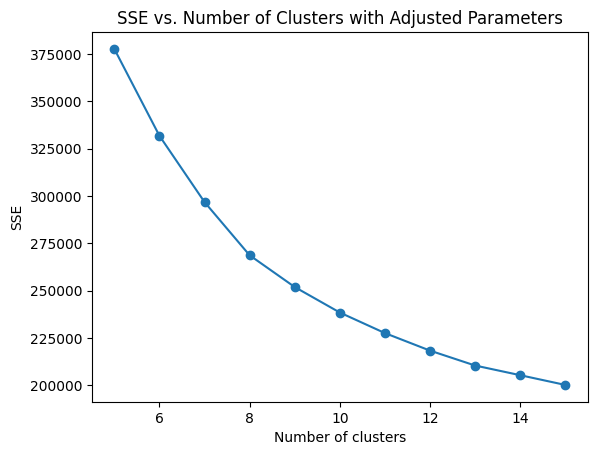

In [14]:
sse = []
for k in range(5, 16):
    kmeans = KMeans(
        n_clusters=k,
        init='k-means++',   
        n_init=10,          
        max_iter=300,      
        tol=1e-4,           
        random_state=0      
    )
    kmeans.fit(X)
    sse.append(kmeans.inertia_)


plt.plot(range(5, 16), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('SSE vs. Number of Clusters with Adjusted Parameters')
plt.show()


In [15]:
optimal_k = 8

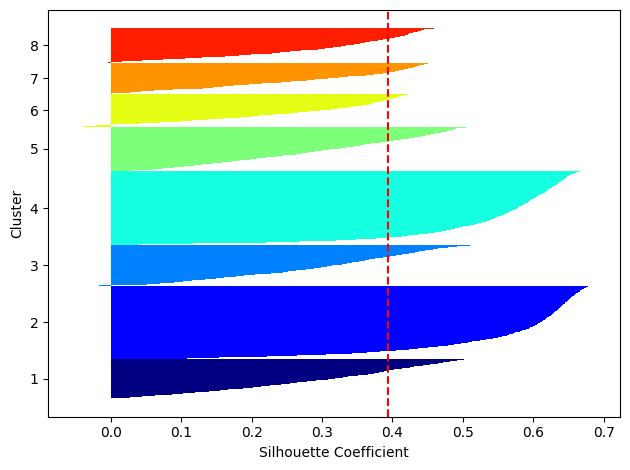

In [16]:
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, random_state=0)
y_km = kmeans.fit_predict(X)

silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
silhouette_avg = np.mean(silhouette_vals)

y_ax_lower, y_ax_upper = 0, 0
yticks = []
n_clusters = len(np.unique(y_km))

for i, c in enumerate(np.unique(y_km)):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)  
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, edgecolor='none', color=color, height=1.0)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

    
plt.axvline(silhouette_avg, color='red', linestyle='--')
plt.yticks(yticks, np.unique(y_km) + 1)
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()


In [17]:
from sklearn.cluster import AgglomerativeClustering
from matplotlib.backends.backend_pdf import PdfPages
import os
from PIL import Image

In [18]:
data = pd.read_csv("Data.csv")

In [19]:
image_names = data['image_name'].values
image_classes = data['class'].values


In [20]:
images_folder = "images"


In [21]:
missing_files = []

for img_name, img_class in zip(data['image_name'], data['class']):
    img_path = os.path.join(images_folder, img_class, img_name)
    if not os.path.exists(img_path):
        missing_files.append(img_path)

print(f"Number of missing files: {len(missing_files)}")
for file in missing_files[:10]: 
    print(file)

Number of missing files: 940
images/sign/video-aTxg8EcSRQyDvisMX-frame-001602-dbdbTPyNuPpwWo56m_166201.jpg
images/sign/video-Bfb39QmAgJQZfE7Pu-frame-024086-CRmPo7MQJXoz27JC8_141663.jpg
images/sign/video-GXXqNLCqyu72TLx5i-frame-000274-ikAWbQiLWQBhpbYYE_130288.jpg
images/sign/video-dgYrcYcm5G75w2GJc-frame-000422-HuJAKFBSZ4id6mWYQ_169091.jpg
images/sign/video-4zQqsnWRwK7SFPpBy-frame-001512-5qpFjGumiYZzpvoNk_157923.jpg
images/sign/video-TTDq3x6HSvFx3YRDH-frame-001745-BtqNudymACbxH4xNB_21903.jpg
images/sign/video-vvYEi6EdCrYXeHwpD-frame-002446-24thDFiFrP3iFuP3a_171694.jpg
images/sign/video-Bfb39QmAgJQZfE7Pu-frame-005043-wMLgsgNcBvRbFJf8D_141031.jpg
images/sign/video-kDDWXrnLSoSdHCZ7S-frame-006023-bWSyPEEDowYd34uAE_40703.jpg
images/sign/video-WiuWWrsHrJsDcfFzg-frame-008521-HPvtFGMY7q2zc9E2f_144972.jpg


In [22]:
images = []


for img_name, img_class in zip(image_names, image_classes):
   
    img_path = os.path.join(images_folder, img_class, img_name)
    
    try:
        
        img = Image.open(img_path).resize((32, 32))
        img_array = np.array(img)
        images.append(img_array)  
    except Exception as e:
        print(f"Error loading image {img_path}: {e}")


images = np.array(images)


print(f"Loaded {len(images)} images with shape: {images[0].shape}")

Error loading image images/sign/video-aTxg8EcSRQyDvisMX-frame-001602-dbdbTPyNuPpwWo56m_166201.jpg: [Errno 2] No such file or directory: 'images/sign/video-aTxg8EcSRQyDvisMX-frame-001602-dbdbTPyNuPpwWo56m_166201.jpg'
Error loading image images/sign/video-Bfb39QmAgJQZfE7Pu-frame-024086-CRmPo7MQJXoz27JC8_141663.jpg: [Errno 2] No such file or directory: 'images/sign/video-Bfb39QmAgJQZfE7Pu-frame-024086-CRmPo7MQJXoz27JC8_141663.jpg'
Error loading image images/sign/video-GXXqNLCqyu72TLx5i-frame-000274-ikAWbQiLWQBhpbYYE_130288.jpg: [Errno 2] No such file or directory: 'images/sign/video-GXXqNLCqyu72TLx5i-frame-000274-ikAWbQiLWQBhpbYYE_130288.jpg'
Error loading image images/sign/video-dgYrcYcm5G75w2GJc-frame-000422-HuJAKFBSZ4id6mWYQ_169091.jpg: [Errno 2] No such file or directory: 'images/sign/video-dgYrcYcm5G75w2GJc-frame-000422-HuJAKFBSZ4id6mWYQ_169091.jpg'
Error loading image images/sign/video-4zQqsnWRwK7SFPpBy-frame-001512-5qpFjGumiYZzpvoNk_157923.jpg: [Errno 2] No such file or directory: 

In [23]:
data['file_exists'] = data.apply(
    lambda row: os.path.exists(os.path.join(images_folder, row['class'], row['image_name'])), 
    axis=1
)
 

Core Samples:


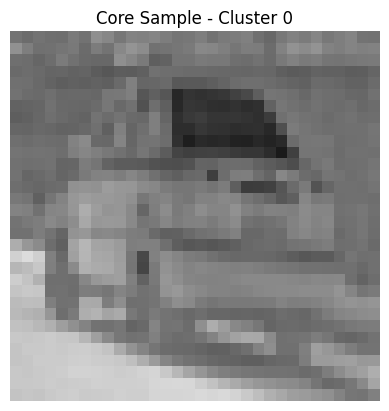

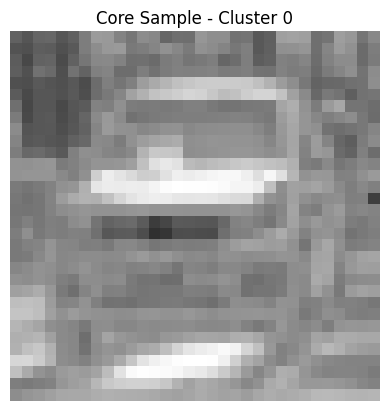

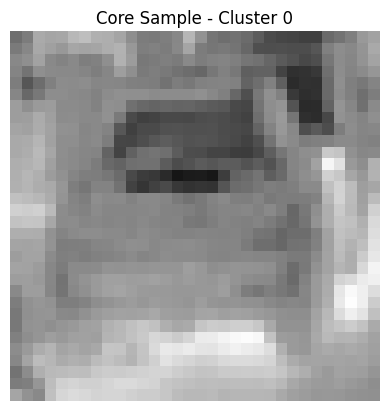

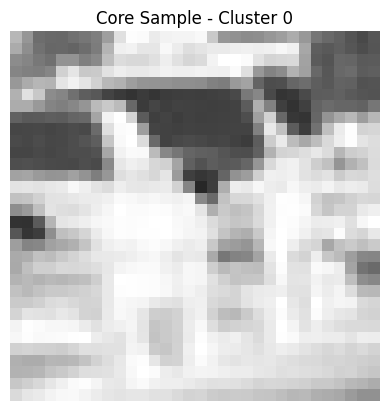

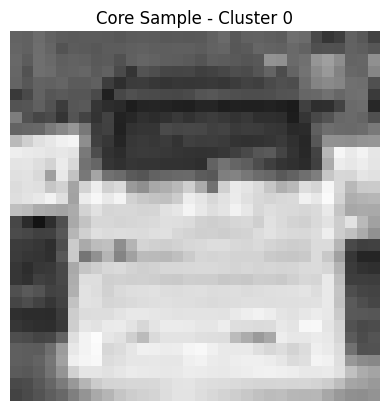

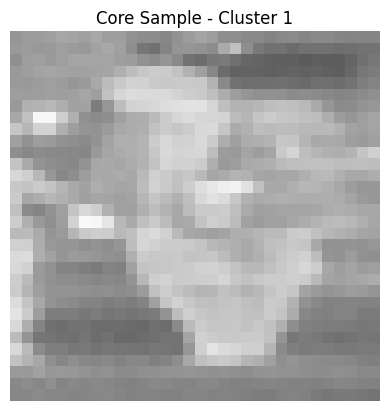

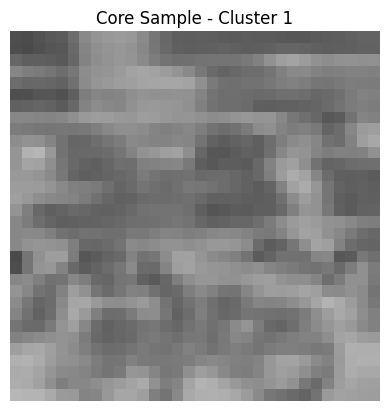

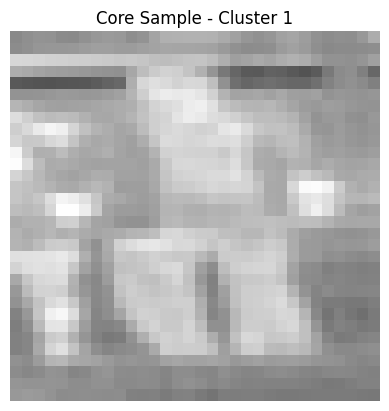

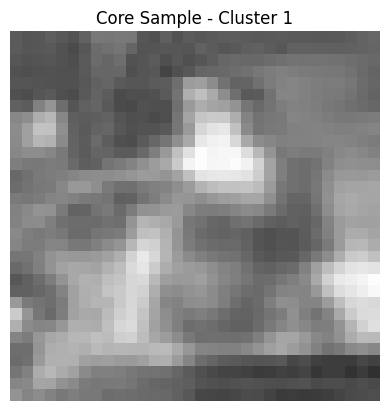

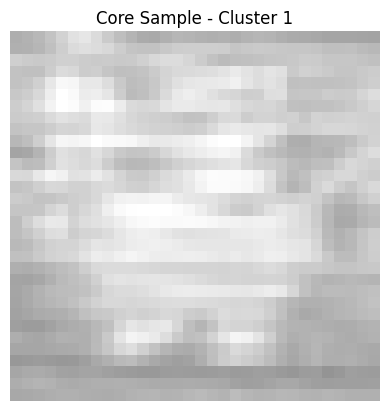

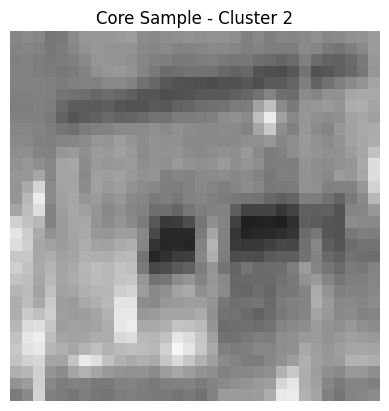

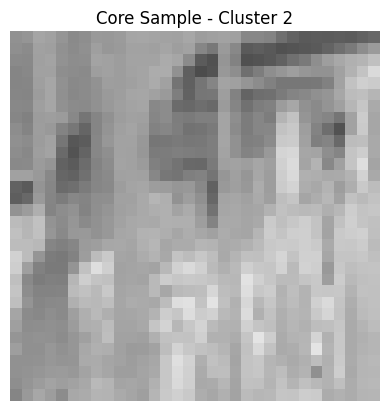

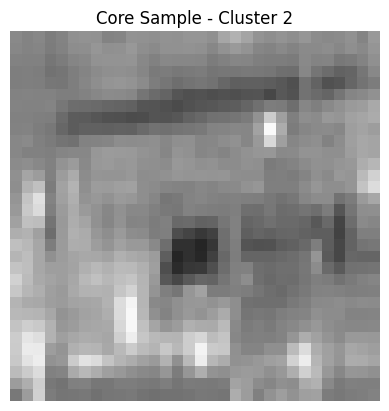

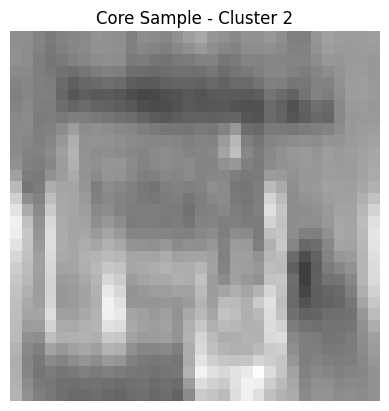

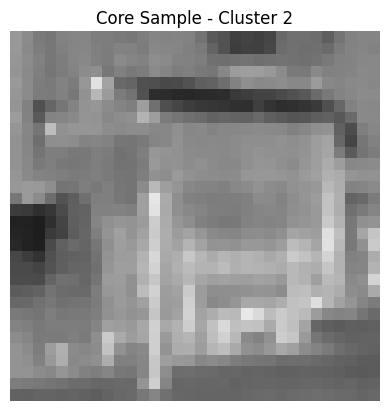

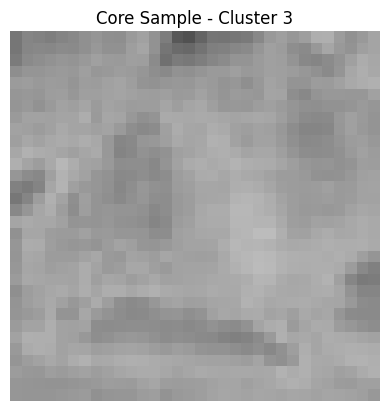

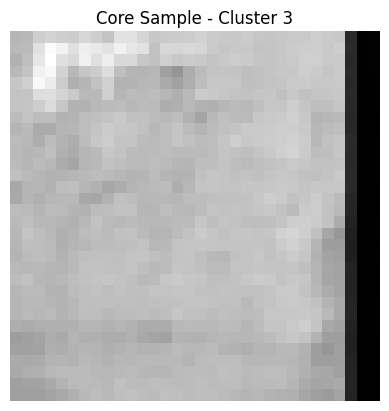

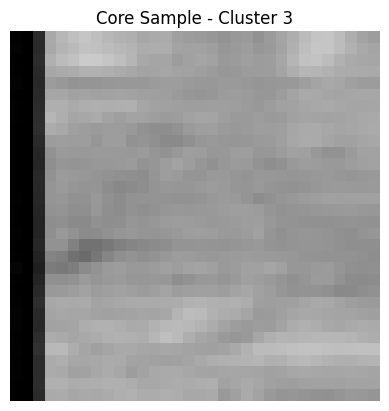

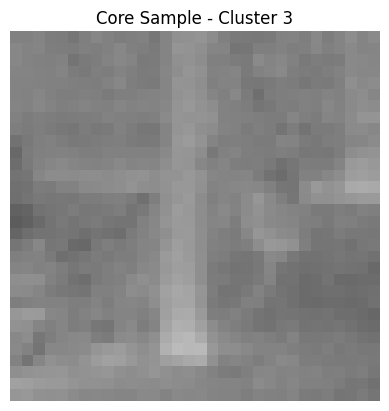

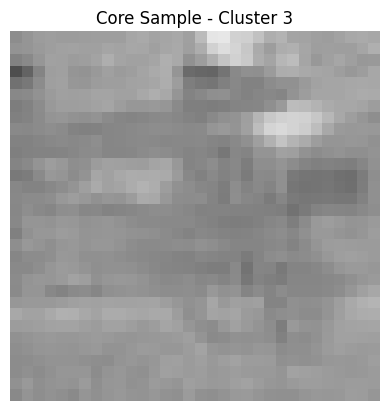

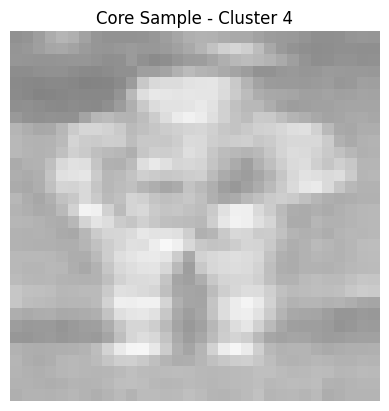

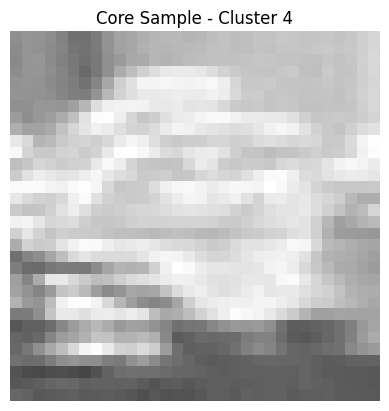

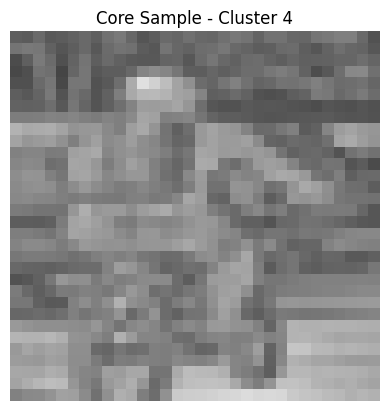

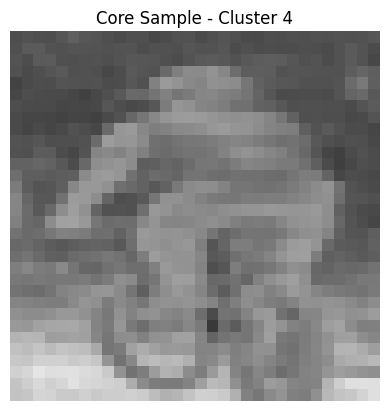

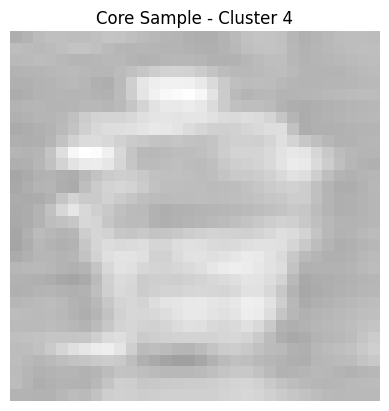

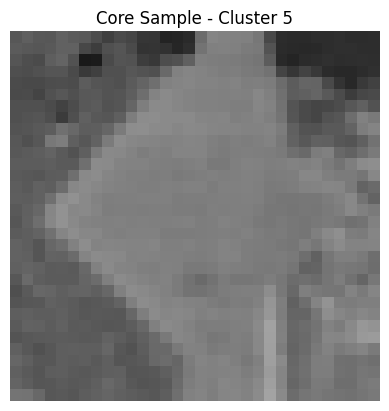

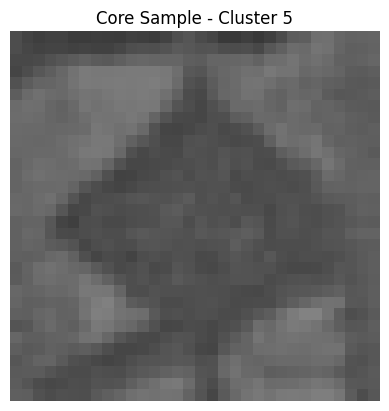

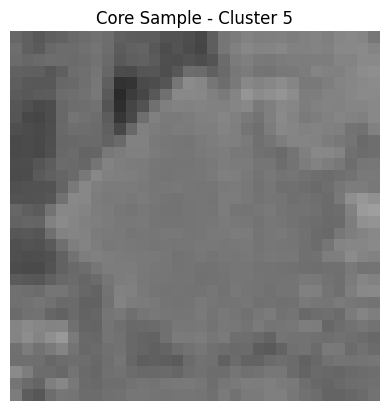

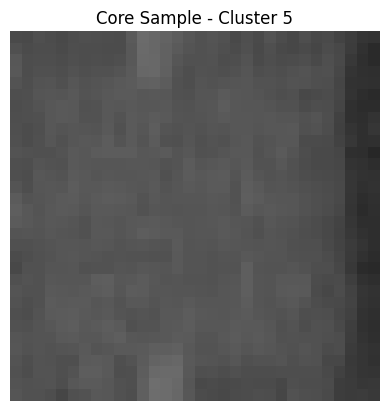

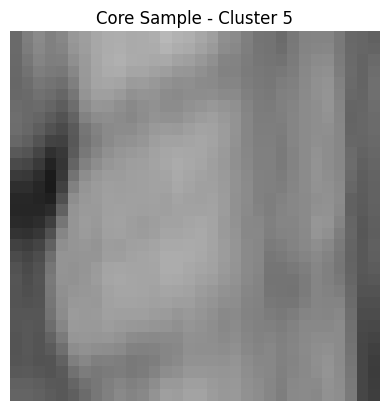

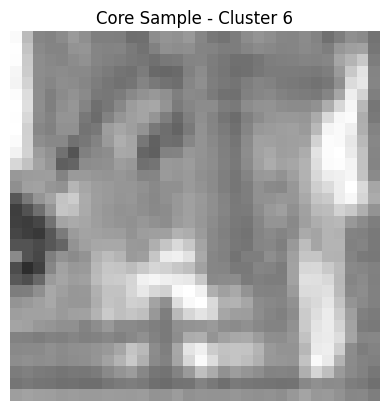

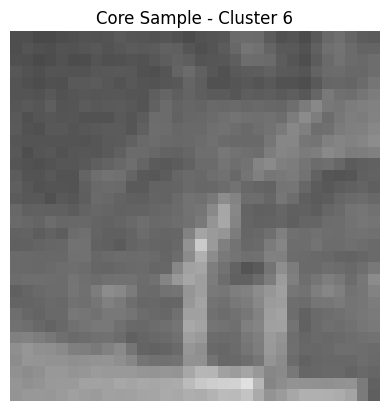

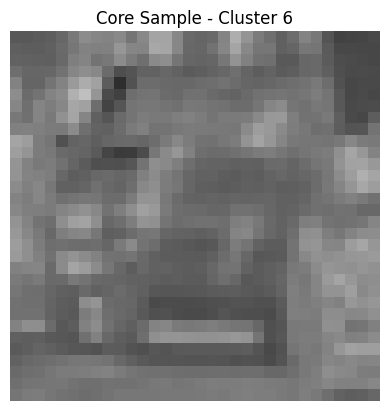

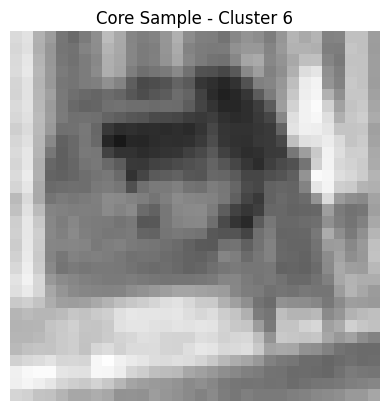

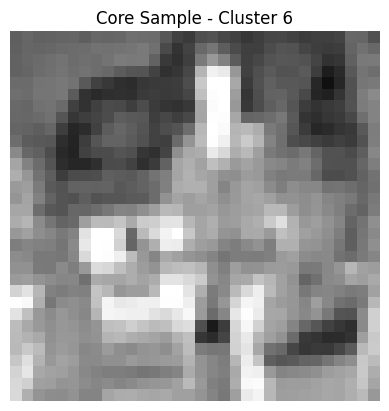

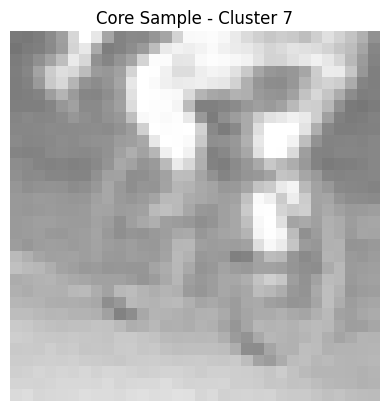

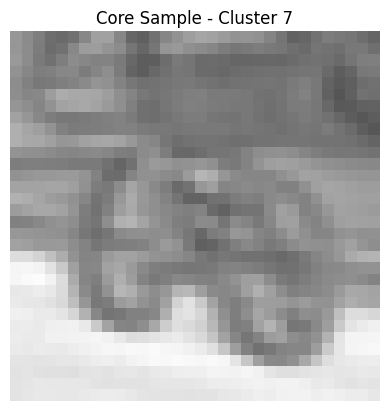

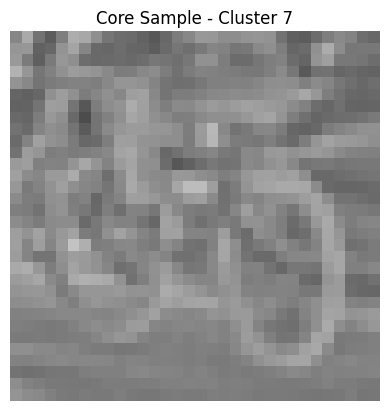

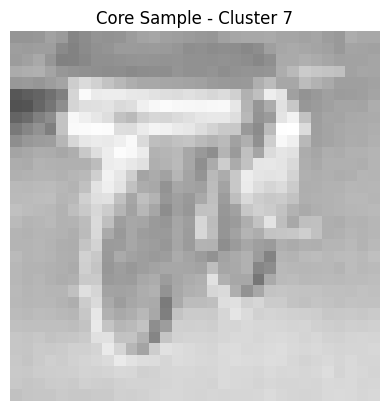

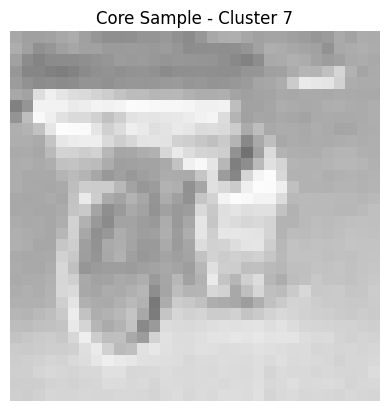

Boundary Samples:


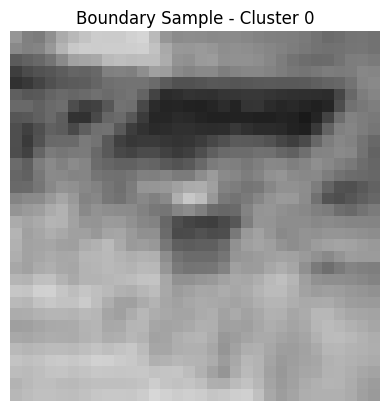

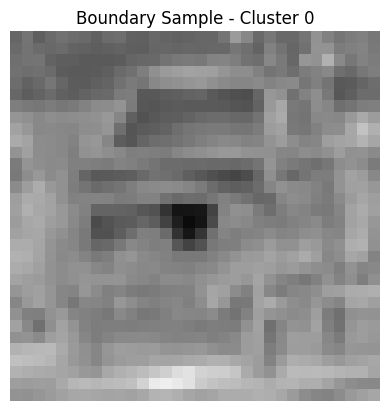

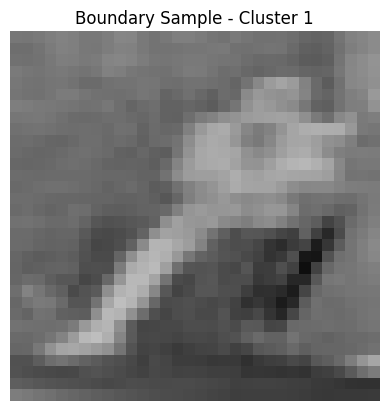

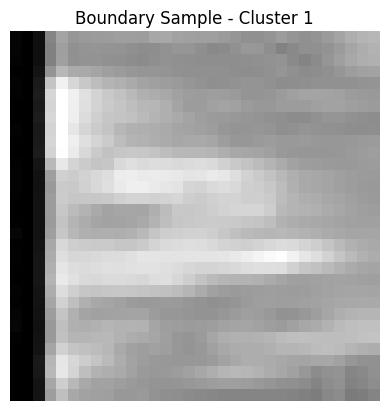

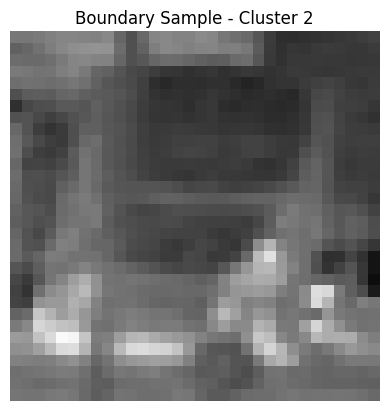

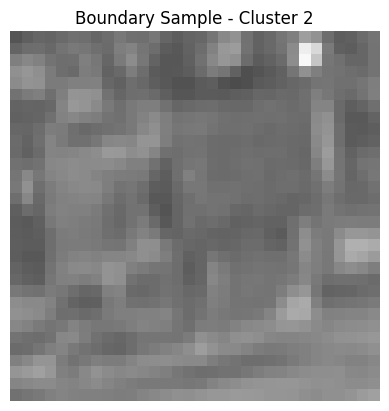

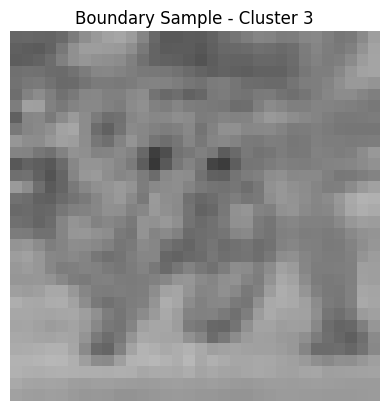

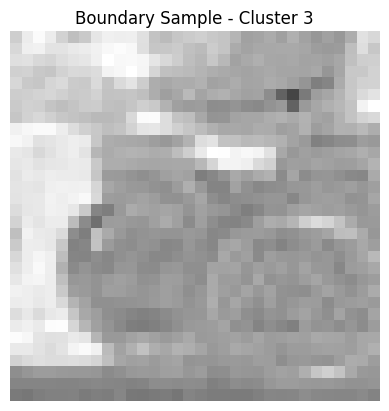

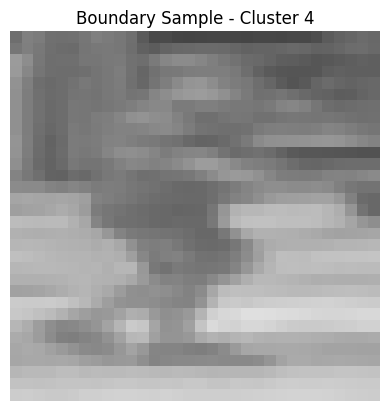

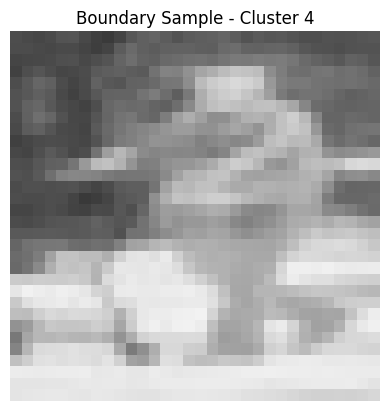

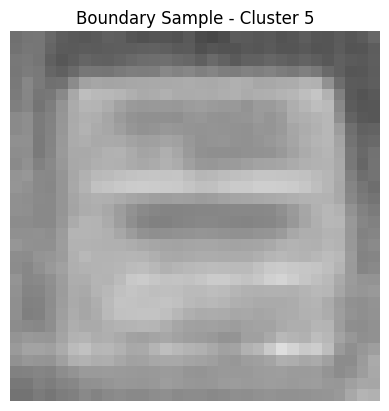

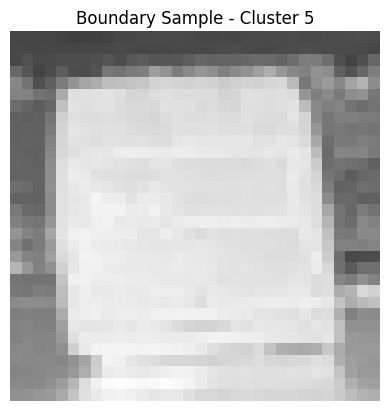

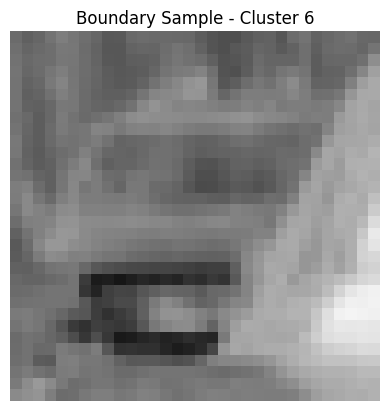

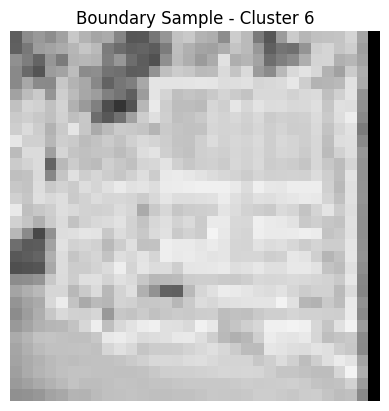

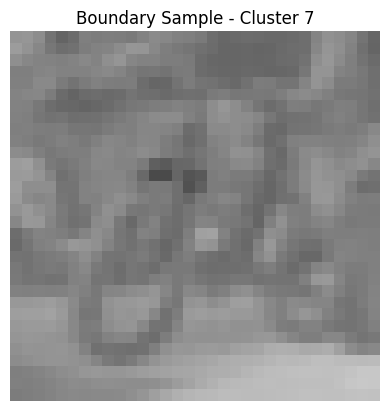

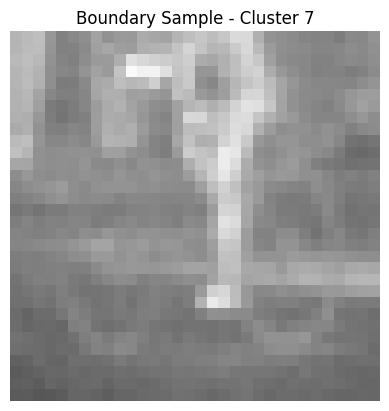

In [24]:
data_with_images = data[data['file_exists']]
X_with_images = data_with_images.iloc[:, 2:].values  
image_names_with_images = data_with_images['image_name'].values  
image_classes_with_images = data_with_images['class'].values  


optimal_k = 8  
kmeans = KMeans(n_clusters=optimal_k, random_state=0).fit(X_with_images)
cluster_labels = kmeans.labels_  
silhouette_vals = silhouette_samples(X_with_images, cluster_labels)


core_samples = []
boundary_samples = []

for i in range(optimal_k):
    
    cluster_sil_vals = silhouette_vals[cluster_labels == i]
    cluster_indices = np.where(cluster_labels == i)[0]

    
    core_samples.extend(cluster_indices[cluster_sil_vals.argsort()[-5:]])  
    boundary_samples.extend(cluster_indices[cluster_sil_vals.argsort()[:2]])  


print("Core Samples:")
for index in core_samples:
    plt.imshow(images[index].reshape(32, 32, 3))
    plt.title(f"Core Sample - Cluster {cluster_labels[index]}")
    plt.axis('off')
    plt.show()


print("Boundary Samples:")
for index in boundary_samples:
    plt.imshow(images[index].reshape(32, 32, 3))
    plt.title(f"Boundary Sample - Cluster {cluster_labels[index]}")
    plt.axis('off')
    plt.show()

In [25]:

pdf_path = "K_Means_No_normalization_Core_Boundary_Samples_High_Quality.pdf"
with PdfPages(pdf_path) as pdf:
    

    for i in range(optimal_k):  
        fig, axes = plt.subplots(1, 5, figsize=(20, 5), dpi=150)  
        fig.suptitle(f"Core Samples - Cluster {i}", fontsize=16)
        
        cluster_sil_vals = silhouette_vals[cluster_labels == i]
        cluster_indices = np.where(cluster_labels == i)[0]
        core_indices = cluster_indices[cluster_sil_vals.argsort()[-5:]] 
        
        for ax, index in zip(axes, core_indices):
            ax.imshow(images[index].reshape(32, 32, 3))  
            ax.axis('off') 
            ax.set_title(f"Sample {index}", fontsize=10) 
        
        pdf.savefig(fig, bbox_inches='tight')  
        plt.close(fig)


    for i in range(optimal_k):  
        fig, axes = plt.subplots(1, 2, figsize=(10, 5), dpi=150)  
        fig.suptitle(f"Boundary Samples - Cluster {i}", fontsize=16)
        
        cluster_sil_vals = silhouette_vals[cluster_labels == i]
        cluster_indices = np.where(cluster_labels == i)[0]
        boundary_indices = cluster_indices[cluster_sil_vals.argsort()[:2]]  
        
        for ax, index in zip(axes, boundary_indices):
            ax.imshow(images[index].reshape(32, 32, 3))  
            ax.axis('off')  
            ax.set_title(f"Sample {index}", fontsize=10)  
        
        pdf.savefig(fig, bbox_inches='tight')  
        plt.close(fig)

print(f"PDF saved successfully at {pdf_path}")

PDF saved successfully at K_Means_No_normalization_Core_Boundary_Samples_High_Quality.pdf


In [26]:
print(f"Shape of y (true labels): {y.shape}")
print(f"Shape of cluster_labels (predicted clusters): {cluster_labels.shape}")


Shape of y (true labels): (5000,)
Shape of cluster_labels (predicted clusters): (4060,)


In [27]:
X = data.iloc[:, 2:].values  
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
cluster_labels_all = kmeans.fit_predict(X)

In [28]:
ari = adjusted_rand_score(y, cluster_labels_all)
print(f"Adjusted Rand Index (ARI) for all samples: {ari:.5f}")

Adjusted Rand Index (ARI) for all samples: 0.75233


In [29]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [30]:
minmax_scaler = MinMaxScaler()
X_minmax = minmax_scaler.fit_transform(X)


standard_scaler = StandardScaler()
X_standard = standard_scaler.fit_transform(X)

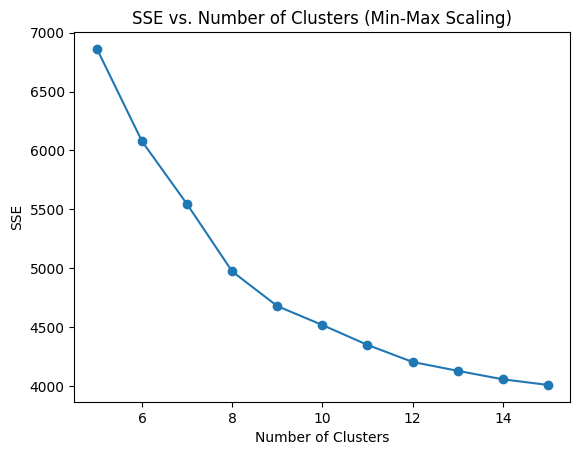

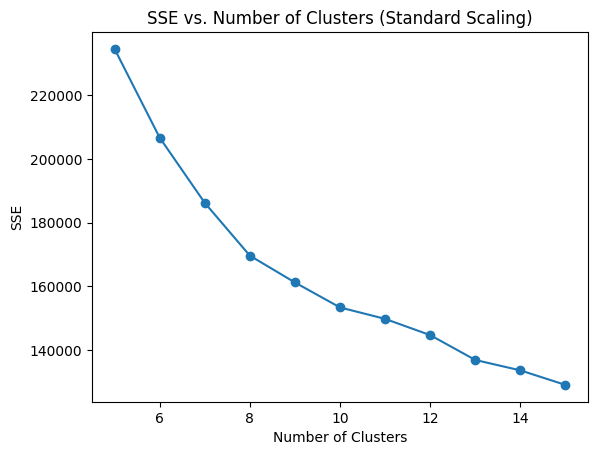

In [31]:
def plot_sse(X_scaled, title):
    sse = []
    for k in range(5, 16):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X_scaled)
        sse.append(kmeans.inertia_)
    
    plt.figure()
    plt.plot(range(5, 16), sse, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('SSE')
    plt.title(title)
    plt.show()

plot_sse(X_minmax, "SSE vs. Number of Clusters (Min-Max Scaling)")


plot_sse(X_standard, "SSE vs. Number of Clusters (Standard Scaling)")


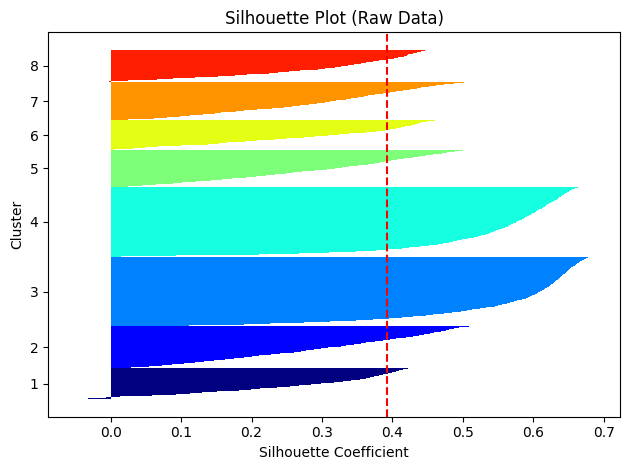

Average Silhouette Score (Silhouette Plot (Raw Data)): 0.39295


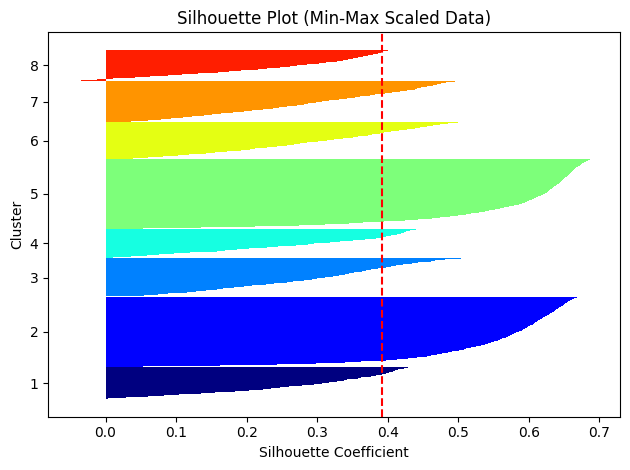

Average Silhouette Score (Silhouette Plot (Min-Max Scaled Data)): 0.39209


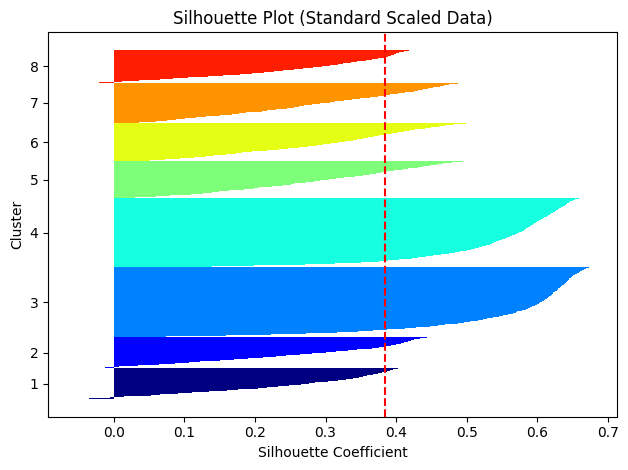

Average Silhouette Score (Silhouette Plot (Standard Scaled Data)): 0.38427


In [32]:
def silhouette_plot(X, title):
    kmeans = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, random_state=0)
    y_km = kmeans.fit_predict(X)

    silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
    silhouette_avg = np.mean(silhouette_vals)

    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    n_clusters = len(np.unique(y_km))

    for i, c in enumerate(np.unique(y_km)):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(
            range(y_ax_lower, y_ax_upper),
            c_silhouette_vals,
            edgecolor='none',
            color=color,
            height=1.0,
        )
        yticks.append((y_ax_lower + y_ax_upper) / 2)
        y_ax_lower += len(c_silhouette_vals)

    plt.axvline(silhouette_avg, color='red', linestyle='--')
    plt.yticks(yticks, np.unique(y_km) + 1)
    plt.xlabel("Silhouette Coefficient")
    plt.ylabel("Cluster")
    plt.title(title)
    plt.tight_layout()
    plt.show()

    print(f"Average Silhouette Score ({title}): {silhouette_avg:.5f}")



silhouette_plot(X, "Silhouette Plot (Raw Data)")


silhouette_plot(X_minmax, "Silhouette Plot (Min-Max Scaled Data)")


silhouette_plot(X_standard, "Silhouette Plot (Standard Scaled Data)")

In [33]:
def compute_ari(X, y, title):
    kmeans = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    ari_score = adjusted_rand_score(y, cluster_labels)
    print(f"Adjusted Rand Index (ARI) ({title}): {ari_score:.5f}")
    return ari_score


ari_raw = compute_ari(X, y, "Raw Data")


ari_minmax = compute_ari(X_minmax, y, "Min-Max Scaled Data")


ari_standard = compute_ari(X_standard, y, "Standard Scaled Data")

Adjusted Rand Index (ARI) (Raw Data): 0.76020
Adjusted Rand Index (ARI) (Min-Max Scaled Data): 0.76433
Adjusted Rand Index (ARI) (Standard Scaled Data): 0.75998


In [34]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

In [35]:
eps_values = [0.05, .1, 0.2, 0.4, 0.5, .7, .8, .9, 1.0, 1.1]
min_samples_values = [2, 3, 5, 10, 15, 20]


scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
}

results = []


for scaler_name, scaler in scalers.items():
    X_scaled = scaler.fit_transform(X)

    
    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean')
            cluster_labels = dbscan.fit_predict(X_scaled)

            
            ari = adjusted_rand_score(y, cluster_labels)

            
            silhouette = (
                silhouette_score(X_scaled, cluster_labels)
                if len(set(cluster_labels)) > 1
                else -1
            )

            
            results.append({
                "Scaler": scaler_name,
                "eps": eps,
                "min_samples": min_samples,
                "ARI": ari,
                "Silhouette Score": silhouette,
                "Clusters Found": len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0),
                "Noise Points": np.sum(cluster_labels == -1),
            })


results_df = pd.DataFrame(results)

print(results_df.sort_values(by=["ARI", "Silhouette Score"], ascending=False).head(10))

           Scaler  eps  min_samples       ARI  Silhouette Score  \
94   MinMaxScaler  0.7           15  0.454529          0.026738   
95   MinMaxScaler  0.7           20  0.433850          0.120074   
93   MinMaxScaler  0.7           10  0.385707         -0.008860   
101  MinMaxScaler  0.8           20  0.360767          0.194773   
100  MinMaxScaler  0.8           15  0.357603          0.093210   
92   MinMaxScaler  0.7            5  0.352074         -0.031331   
91   MinMaxScaler  0.7            3  0.344588         -0.252654   
90   MinMaxScaler  0.7            2  0.344218         -0.427817   
99   MinMaxScaler  0.8           10  0.341010          0.199356   
98   MinMaxScaler  0.8            5  0.326744         -0.105680   

     Clusters Found  Noise Points  
94                5          2398  
95                4          2486  
93                4          2265  
101               2          1683  
100               3          1578  
92                5          2103  
91        

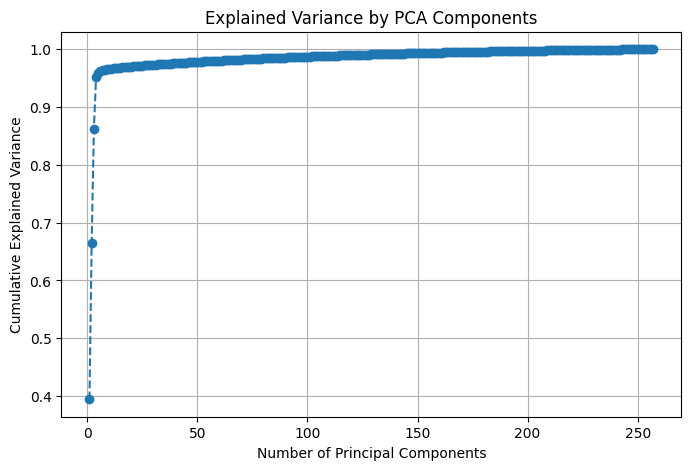

PC1: 0.3947 (0.3947 cumulative)
PC2: 0.2696 (0.6643 cumulative)
PC3: 0.1976 (0.8619 cumulative)
PC4: 0.0898 (0.9516 cumulative)
PC5: 0.0064 (0.9580 cumulative)
PC6: 0.0042 (0.9623 cumulative)
PC7: 0.0014 (0.9637 cumulative)
PC8: 0.0009 (0.9646 cumulative)
PC9: 0.0007 (0.9654 cumulative)
PC10: 0.0007 (0.9660 cumulative)


In [36]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 


pca = PCA()
X_pca = pca.fit_transform(X_scaled)


explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)


plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.grid()
plt.show()


for i, ratio in enumerate(explained_variance_ratio[:10], start=1):
    print(f"PC{i}: {ratio:.4f} ({cumulative_variance[i-1]:.4f} cumulative)")

In [37]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained variance by each PC: {explained_variance_ratio}")
print(f"Cumulative explained variance: {sum(explained_variance_ratio):.4f}")

Explained variance by each PC: [0.39915586 0.2753816  0.18712832 0.09180572]
Cumulative explained variance: 0.9535


In [38]:
scaler = MinMaxScaler()
X_minmax_scaled = scaler.fit_transform(X)


pca_components = [3, 4]
results = []

for n_components in pca_components:

    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_minmax_scaled)
    
  
    kmeans = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(X_pca)
    
    
    ari = adjusted_rand_score(y, cluster_labels)
    

    silhouette = (
        silhouette_score(X_pca, cluster_labels, metric='euclidean')
        if len(set(cluster_labels)) > 1
        else -1
    )
    
   
    results.append({
        "PCA Components": n_components,
        "ARI Score": ari,
        "Silhouette Score": silhouette,
    })


results_df = pd.DataFrame(results)


print(results_df)

   PCA Components  ARI Score  Silhouette Score
0               3   0.714159          0.414627
1               4   0.764595          0.475295


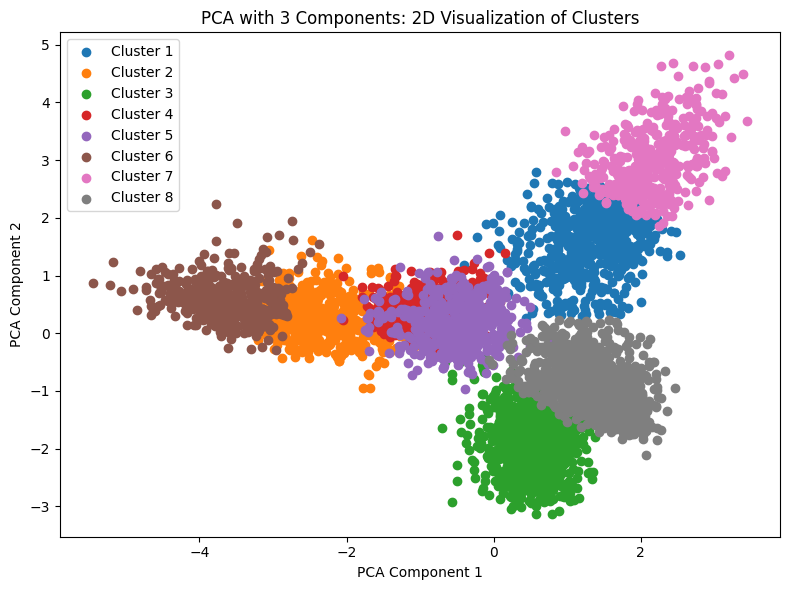

In [39]:
pca_3 = PCA(n_components=3)
X_pca_3 = pca_3.fit_transform(X_minmax_scaled)
cluster_labels_3 = KMeans(n_clusters=optimal_k, random_state=0).fit_predict(X_pca_3)

plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    cluster_points = X_pca_3[cluster_labels_3 == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster + 1}')
    
plt.title("PCA with 3 Components: 2D Visualization of Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.tight_layout()
plt.show()

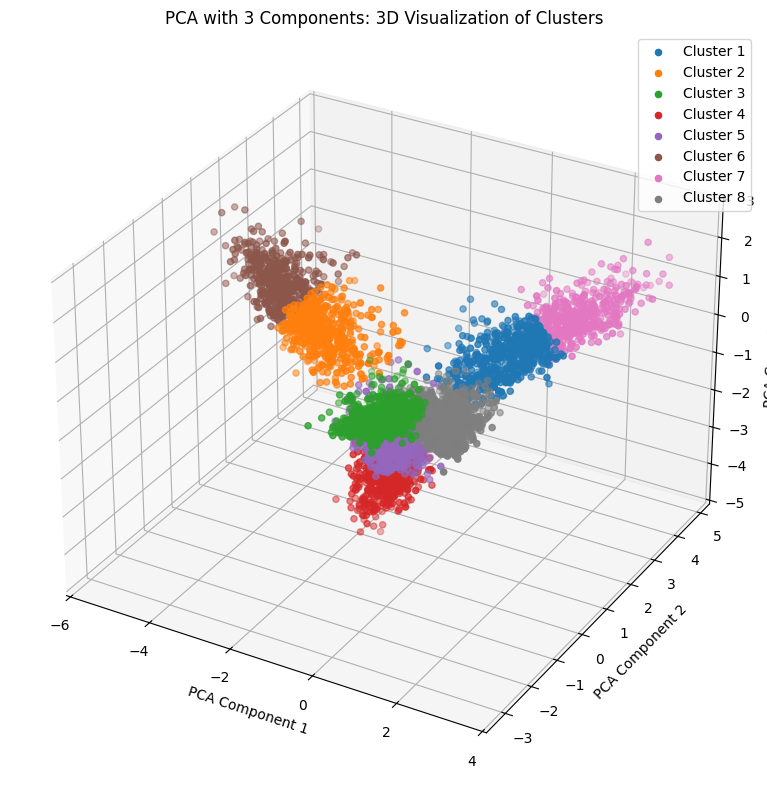

In [40]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


for cluster in range(optimal_k):
    cluster_points = X_pca_3[cluster_labels_3 == cluster]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=f'Cluster {cluster + 1}')

ax.set_title("PCA with 3 Components: 3D Visualization of Clusters")
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
ax.legend()
plt.tight_layout()
plt.show()


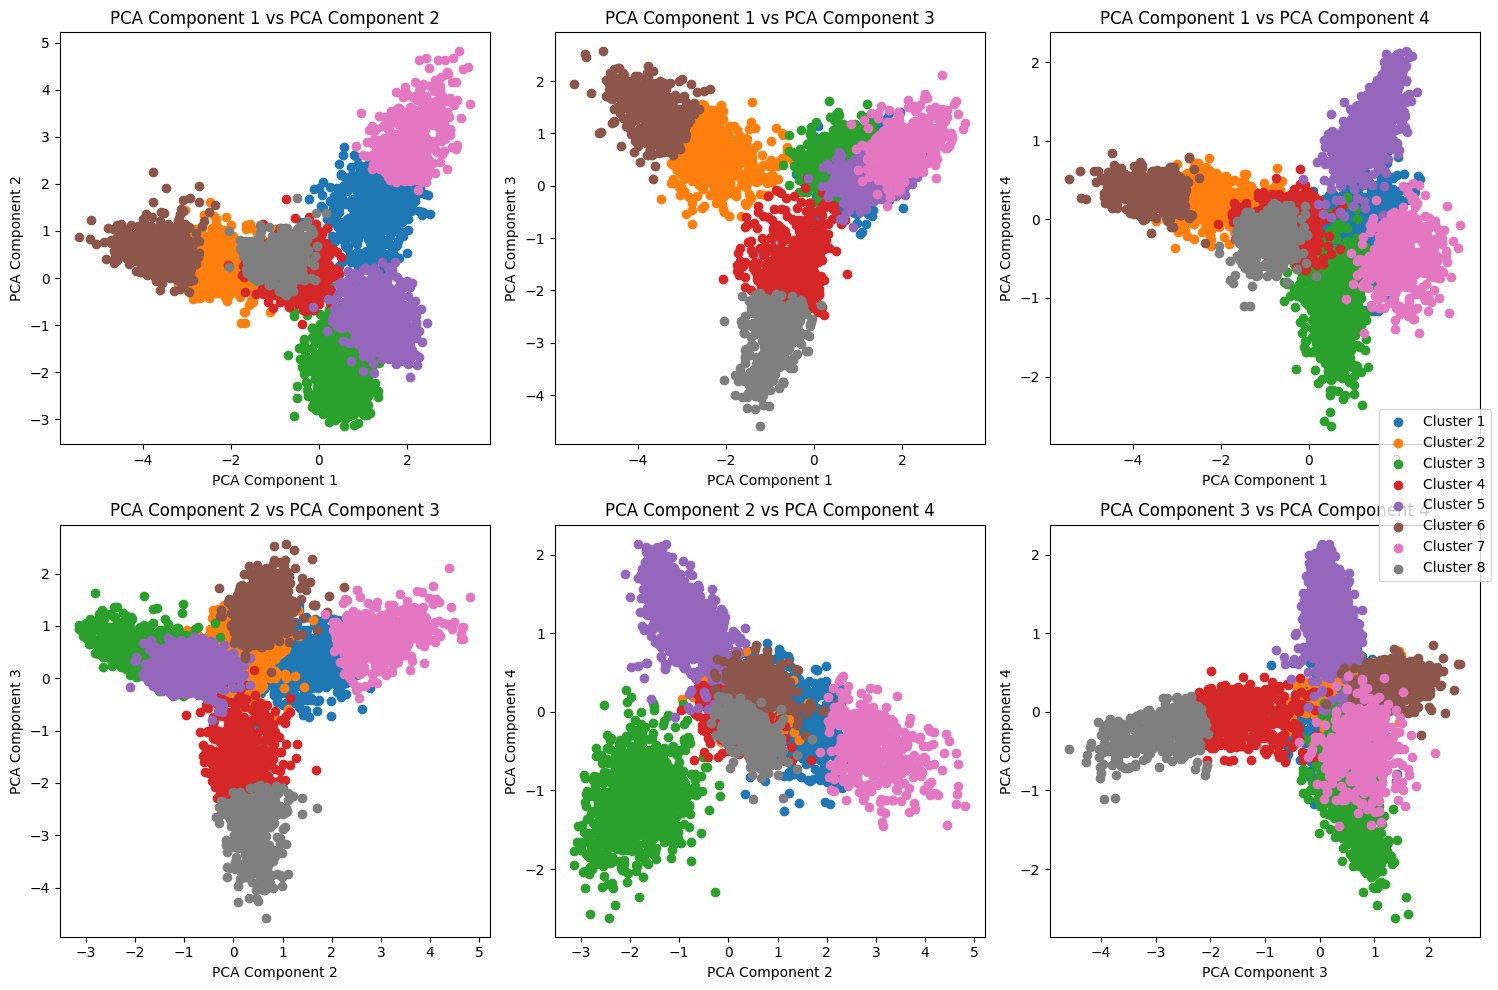

In [41]:
pca_4 = PCA(n_components=4)
X_pca_4 = pca_4.fit_transform(X_minmax_scaled)
cluster_labels_4 = KMeans(n_clusters=optimal_k, random_state=0).fit_predict(X_pca_4)


fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes = axes.ravel()
pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

for i, (c1, c2) in enumerate(pairs):
    for cluster in range(optimal_k):
        cluster_points = X_pca_4[cluster_labels_4 == cluster]
        axes[i].scatter(cluster_points[:, c1], cluster_points[:, c2], label=f'Cluster {cluster + 1}')
    axes[i].set_title(f"PCA Component {c1 + 1} vs PCA Component {c2 + 1}")
    axes[i].set_xlabel(f"PCA Component {c1 + 1}")
    axes[i].set_ylabel(f"PCA Component {c2 + 1}")

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right')
plt.tight_layout()
plt.show()

In [42]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import f_classif, mutual_info_classif

Feature Selection
Im try different methods

In [43]:

scalers = {
    "No Scaling": None,
    "MinMaxScaler": MinMaxScaler(),
    "StandardScaler": StandardScaler()
}


results = []


optimal_k = 8  


for scaler_name, scaler in scalers.items():
    if scaler is not None:
    
        X_scaled = scaler.fit_transform(X)
        
        
        var_thresh = VarianceThreshold(threshold=0.0)
        X_filtered = var_thresh.fit_transform(X_scaled)
    else:
        
        X_filtered = X.copy()

   
    kmeans = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(X_filtered)

   
    ari = adjusted_rand_score(y, cluster_labels)

    
    silhouette = (
        silhouette_score(X_filtered, cluster_labels)
        if len(set(cluster_labels)) > 1
        else -1
    )

   
    results.append({
        "Scaler": scaler_name,
        "ARI Score": ari,
        "Silhouette Score": silhouette,
        "Features Retained": X_filtered.shape[1],
        "Total Features Removed": X.shape[1] - X_filtered.shape[1],
    })
    

results_df = pd.DataFrame(results)


print(results_df)    

           Scaler  ARI Score  Silhouette Score  Features Retained  \
0      No Scaling   0.760198          0.392949                257   
1    MinMaxScaler   0.764325          0.392086                257   
2  StandardScaler   0.759982          0.384272                257   

   Total Features Removed  
0                       0  
1                       0  
2                       0  


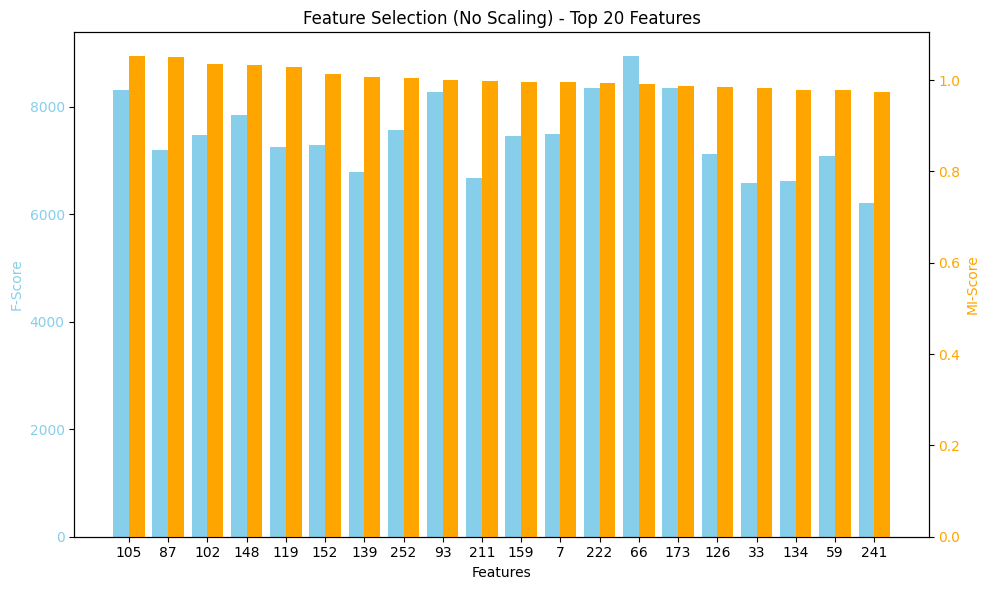

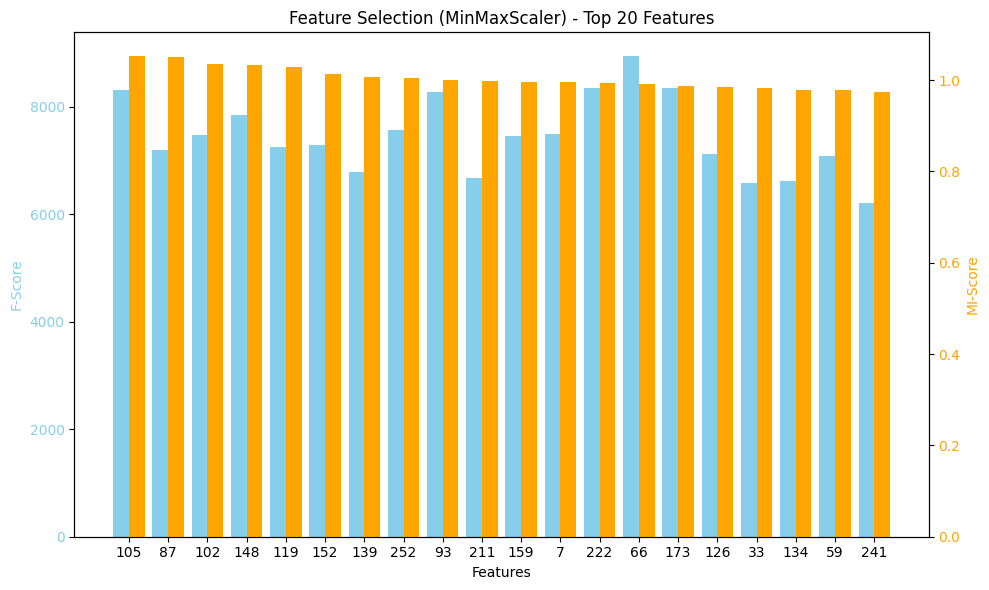

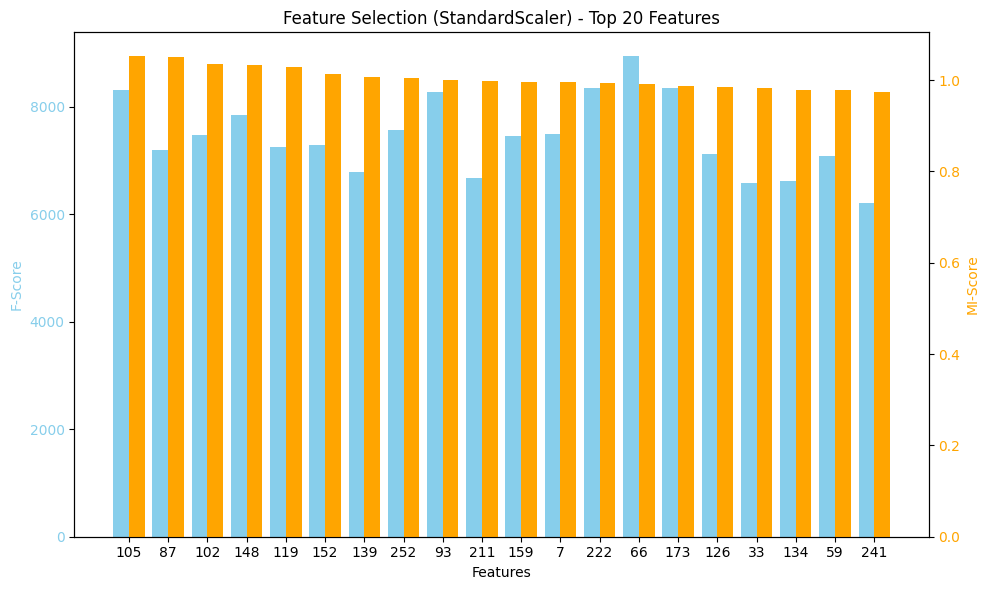

            Scaler  Clusters  ARI Score  Silhouette Score  Features Retained  \
0       No Scaling         5   0.794837          0.504799                 20   
1       No Scaling         6   0.747355          0.467033                 20   
2       No Scaling         7   0.757566          0.436061                 20   
3       No Scaling         8   0.707859          0.406684                 20   
4     MinMaxScaler         5   0.808170          0.511302                 20   
5     MinMaxScaler         6   0.762977          0.472211                 20   
6     MinMaxScaler         7   0.786775          0.444609                 20   
7     MinMaxScaler         8   0.715771          0.391811                 20   
8   StandardScaler         5   0.808092          0.511354                 20   
9   StandardScaler         6   0.763774          0.472903                 20   
10  StandardScaler         7   0.782496          0.444332                 20   
11  StandardScaler         8   0.711451 

In [44]:

scalers = {
    "No Scaling": None,
    "MinMaxScaler": MinMaxScaler(),
    "StandardScaler": StandardScaler()
}
cluster_options = [5, 6, 7, 8] 
top_features_count = 20  

results = []


for scaler_name, scaler in scalers.items():
    if scaler is not None:
        X_scaled = scaler.fit_transform(X)
    else:
        X_scaled = X.copy()
    
    f_scores, _ = f_classif(X_scaled, y)
    mi_scores = mutual_info_classif(X_scaled, y, random_state=0)


    feature_scores = pd.DataFrame({
        'Feature': [f'Feature_{i}' for i in range(X.shape[1])],
        'F_Score': f_scores,
        'MI_Score': mi_scores
    })
    feature_scores = feature_scores.sort_values(by='MI_Score', ascending=False)


    selected_features = feature_scores.head(top_features_count).copy()
    selected_indices = [int(f.split('_')[1]) for f in selected_features['Feature']]
    X_reduced = X_scaled[:, selected_indices]


    selected_features['Short_Feature'] = selected_features['Feature'].apply(lambda x: x.split('_')[-1])

    
    fig, ax1 = plt.subplots(figsize=(10, 6))

    ax2 = ax1.twinx() 

    x = np.arange(len(selected_features))  
    width = 0.4 


    ax1.bar(x - width/2, selected_features['F_Score'], width, label='F-Score', color='skyblue')
    ax1.set_ylabel('F-Score', color='skyblue')
    ax1.tick_params(axis='y', labelcolor='skyblue')

    
    ax2.bar(x + width/2, selected_features['MI_Score'], width, label='MI-Score', color='orange')
    ax2.set_ylabel('MI-Score', color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')

  
    plt.xticks(x, selected_features['Short_Feature'], rotation=90)
    ax1.set_xlabel('Features')
    plt.title(f"Feature Selection ({scaler_name}) - Top {top_features_count} Features")

    fig.tight_layout()
    plt.show()

   
    for k in cluster_options:
        kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=0)
        cluster_labels = kmeans.fit_predict(X_reduced)

        
        ari = adjusted_rand_score(y, cluster_labels)
        silhouette = silhouette_score(X_reduced, cluster_labels) if len(set(cluster_labels)) > 1 else -1

      
        results.append({
            "Scaler": scaler_name,
            "Clusters": k,
            "ARI Score": ari,
            "Silhouette Score": silhouette,
            "Features Retained": top_features_count,
            "Selected Features": list(selected_features['Feature']),
            "F_Scores": list(selected_features['F_Score']),
            "MI_Scores": list(selected_features['MI_Score']),
        })


results_df = pd.DataFrame(results)


print(results_df)

In [45]:
scalers = {
    "No Scaling": None,
    "MinMaxScaler": MinMaxScaler(),
    "StandardScaler": StandardScaler()
}

cluster_options = [5, 6, 7, 8] 
feature_counts = [10, 20, 40, 50, 100]  

results = []


for scaler_name, scaler in scalers.items():
    if scaler is not None:
        X_scaled = scaler.fit_transform(X)
    else:
        X_scaled = X.copy()
    

    f_scores, _ = f_classif(X_scaled, y)
    mi_scores = mutual_info_classif(X_scaled, y, random_state=0)
    
    
    feature_scores = pd.DataFrame({
        'Feature': [f'Feature_{i}' for i in range(X.shape[1])],
        'F_Score': f_scores,
        'MI_Score': mi_scores
    })
    feature_scores = feature_scores.sort_values(by='MI_Score', ascending=False)
    
   
    for top_features_count in feature_counts:
        selected_features = feature_scores.head(top_features_count)
        selected_indices = [int(f.split('_')[1]) for f in selected_features['Feature']]
        X_reduced = X_scaled[:, selected_indices]
        
       
        for k in cluster_options:
            kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=0)
            cluster_labels = kmeans.fit_predict(X_reduced)
            
            
            ari = adjusted_rand_score(y, cluster_labels)
            silhouette = silhouette_score(X_reduced, cluster_labels) if len(set(cluster_labels)) > 1 else -1
            
     
            results.append({
                "Scaler": scaler_name,
                "Clusters": k,
                "ARI Score": ari,
                "Silhouette Score": silhouette,
                "Features Retained": top_features_count,
                "Selected Features": list(selected_features['Feature']),
                "F_Scores": list(selected_features['F_Score']),
                "MI_Scores": list(selected_features['MI_Score']),
            })


results_df = pd.DataFrame(results)

print(results_df)


            Scaler  Clusters  ARI Score  Silhouette Score  Features Retained  \
0       No Scaling         5   0.784276          0.518593                 10   
1       No Scaling         6   0.736877          0.481287                 10   
2       No Scaling         7   0.734416          0.449801                 10   
3       No Scaling         8   0.676409          0.397921                 10   
4       No Scaling         5   0.794837          0.504799                 20   
5       No Scaling         6   0.747355          0.467033                 20   
6       No Scaling         7   0.757566          0.436061                 20   
7       No Scaling         8   0.707859          0.406684                 20   
8       No Scaling         5   0.871990          0.511716                 40   
9       No Scaling         6   0.841964          0.491805                 40   
10      No Scaling         7   0.801395          0.449816                 40   
11      No Scaling         8   0.734363 

In [46]:
scalers = {
    "No Scaling": None,
    "MinMaxScaler": MinMaxScaler(),
    "StandardScaler": StandardScaler()
}

cluster_options = [5, 6, 7, 8]  
feature_counts = [10, 20, 40, 50, 100] 

results = []


for scaler_name, scaler in scalers.items():
    if scaler is not None:
        X_scaled = scaler.fit_transform(X)
    else:
        X_scaled = X.copy()
    

    f_scores, _ = f_classif(X_scaled, y)
    mi_scores = mutual_info_classif(X_scaled, y, random_state=0)
    

    feature_scores = pd.DataFrame({
        'Feature': [f'Feature_{i}' for i in range(X.shape[1])],
        'F_Score': f_scores,
        'MI_Score': mi_scores
    })
    feature_scores = feature_scores.sort_values(by='F_Score', ascending=False)  # Now rank by F_Score
    
   
    for top_features_count in feature_counts:
        selected_features = feature_scores.head(top_features_count)
        selected_indices = [int(f.split('_')[1]) for f in selected_features['Feature']]
        X_reduced = X_scaled[:, selected_indices]
        
     
        for k in cluster_options:
            kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=0)
            cluster_labels = kmeans.fit_predict(X_reduced)
            
            # Calculate scores
            ari = adjusted_rand_score(y, cluster_labels)
            silhouette = silhouette_score(X_reduced, cluster_labels) if len(set(cluster_labels)) > 1 else -1
            
       
            results.append({
                "Scaler": scaler_name,
                "Clusters": k,
                "ARI Score": ari,
                "Silhouette Score": silhouette,
                "Features Retained": top_features_count,
                "Selected Features": list(selected_features['Feature']),
                "F_Scores": list(selected_features['F_Score']),
                "MI_Scores": list(selected_features['MI_Score']),
            })


results_df = pd.DataFrame(results)


print(results_df)

            Scaler  Clusters  ARI Score  Silhouette Score  Features Retained  \
0       No Scaling         5   0.631062          0.436409                 10   
1       No Scaling         6   0.565367          0.382777                 10   
2       No Scaling         7   0.548650          0.385196                 10   
3       No Scaling         8   0.511756          0.358834                 10   
4       No Scaling         5   0.700700          0.430784                 20   
5       No Scaling         6   0.767434          0.431563                 20   
6       No Scaling         7   0.737955          0.396520                 20   
7       No Scaling         8   0.657060          0.377078                 20   
8       No Scaling         5   0.870639          0.492454                 40   
9       No Scaling         6   0.815509          0.474813                 40   
10      No Scaling         7   0.778070          0.436658                 40   
11      No Scaling         8   0.707779 

I will base my scores base on M-score not F-score because overall M-Score tends to have more weight towards my ari and siloutte scores as a feature selection than F-score. Im select minmax and standard scaler and try features retained at 50 and 100 with cluster groups of 5 and 6. I will now try PCA 1 - 4 with this to see what the differences are when i measure the ARI and Silouette Scores now. 

            Scaler  Features Retained  PCA Components  Clusters  ARI Score  \
0     MinMaxScaler                 50               2         5   0.825350   
1     MinMaxScaler                 50               2         6   0.803239   
2     MinMaxScaler                 50               3         5   0.870909   
3     MinMaxScaler                 50               3         6   0.823252   
4     MinMaxScaler                 50               4         5   0.900032   
5     MinMaxScaler                 50               4         6   0.860926   
6     MinMaxScaler                100               2         5   0.829004   
7     MinMaxScaler                100               2         6   0.801207   
8     MinMaxScaler                100               3         5   0.876670   
9     MinMaxScaler                100               3         6   0.825822   
10    MinMaxScaler                100               4         5   0.924726   
11    MinMaxScaler                100               4         6 

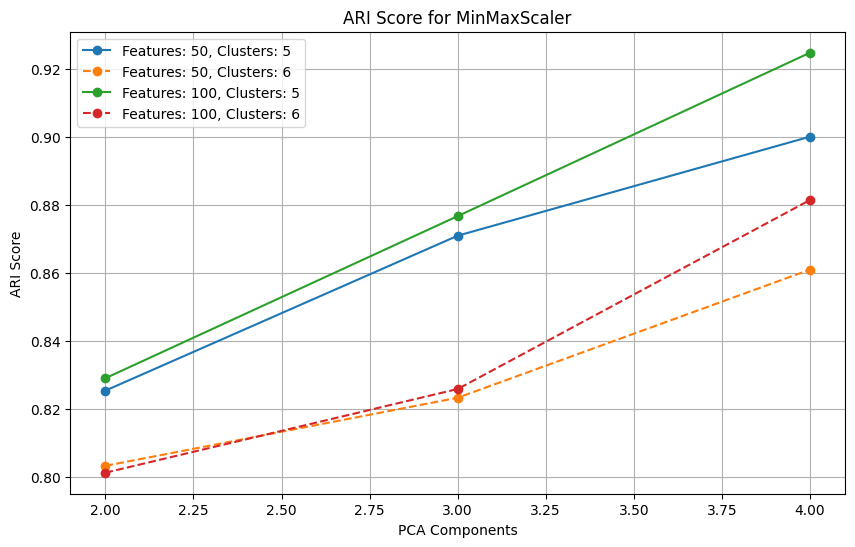

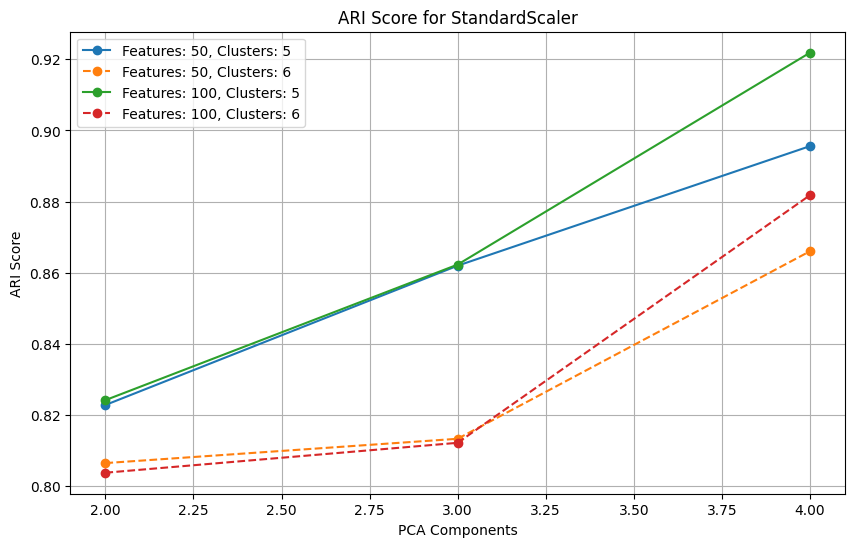

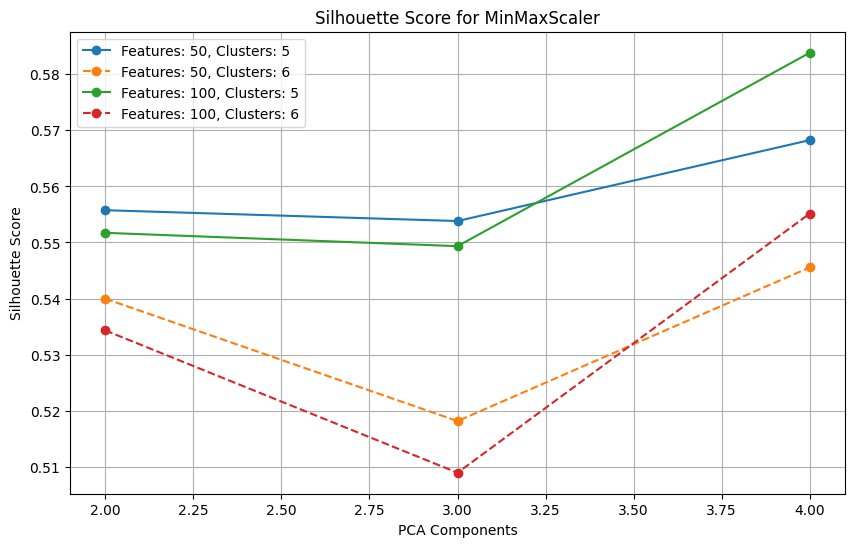

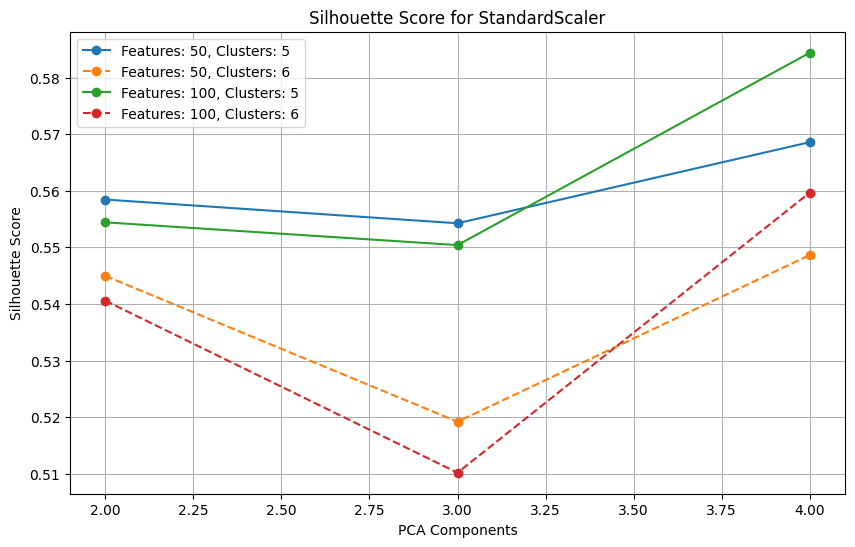

In [47]:
scalers = {
    "MinMaxScaler": MinMaxScaler(),
    "StandardScaler": StandardScaler(),
}


feature_counts = [50, 100]
pca_components = [2, 3, 4]  
cluster_options = [5, 6] 
results = []


for scaler_name, scaler in scalers.items():
    X_scaled = scaler.fit_transform(X)

    
    mi_scores = mutual_info_classif(X_scaled, y, random_state=0)
    feature_scores = pd.DataFrame({
        'Feature': [f'Feature_{i}' for i in range(X.shape[1])],
        'MI_Score': mi_scores
    }).sort_values(by='MI_Score', ascending=False)

   
    for top_features_count in feature_counts:
        selected_features = feature_scores.head(top_features_count)
        selected_indices = [int(f.split('_')[1]) for f in selected_features['Feature']]
        X_reduced = X_scaled[:, selected_indices]

     
        for n_components in pca_components:
            pca = PCA(n_components=n_components)
            X_pca = pca.fit_transform(X_reduced)

        
            for k in cluster_options:
                kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=0)
                cluster_labels = kmeans.fit_predict(X_pca)

                
                ari = adjusted_rand_score(y, cluster_labels)
                silhouette = silhouette_score(X_pca, cluster_labels) if len(set(cluster_labels)) > 1 else -1

            
                results.append({
                    "Scaler": scaler_name,
                    "Features Retained": top_features_count,
                    "PCA Components": n_components,
                    "Clusters": k,
                    "ARI Score": ari,
                    "Silhouette Score": silhouette
                })


results_df = pd.DataFrame(results)

print(results_df)
     
for metric in ["ARI Score", "Silhouette Score"]:
    for scaler_name in scalers.keys():
        subset = results_df[results_df["Scaler"] == scaler_name]
        plt.figure(figsize=(10, 6))
        
        for top_features_count in feature_counts:
            for k in cluster_options:
                sub_subset = subset[(subset["Features Retained"] == top_features_count) & (subset["Clusters"] == k)]
                linestyle = '-' if k == 5 else '--'  
                
                plt.plot(
                    sub_subset["PCA Components"],
                    sub_subset[metric],
                    marker='o',
                    linestyle=linestyle,
                    label=f"Features: {top_features_count}, Clusters: {k}"
                )
        
        plt.title(f"{metric} for {scaler_name}")
        plt.xlabel("PCA Components")
        plt.ylabel(metric)
        plt.legend()
        plt.grid()
        plt.show()

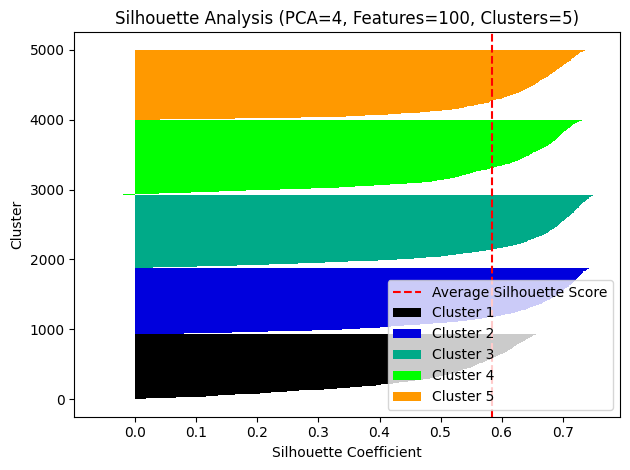

Average Silhouette Score: 0.5839


In [48]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

f_scores, _ = f_classif(X_scaled, y)
mi_scores = mutual_info_classif(X_scaled, y, random_state=0)

feature_scores = pd.DataFrame({
    'Feature': [f'Feature_{i}' for i in range(X.shape[1])],
    'F_Score': f_scores,
    'MI_Score': mi_scores
}).sort_values(by='MI_Score', ascending=False)

top_features = feature_scores.head(100)['Feature']
selected_indices = [int(f.split('_')[1]) for f in top_features]
X_reduced = X_scaled[:, selected_indices]


pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_reduced)


kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(X_pca)


silhouette_vals = silhouette_samples(X_pca, cluster_labels)
silhouette_avg = silhouette_score(X_pca, cluster_labels)


y_lower, y_upper = 0, 0
for i in range(5):  
    cluster_sil_vals = silhouette_vals[cluster_labels == i]
    cluster_sil_vals.sort()
    y_upper += len(cluster_sil_vals)
    color = plt.cm.nipy_spectral(float(i) / 5)
    plt.barh(range(y_lower, y_upper), cluster_sil_vals, edgecolor='none', color=color, height=1.0, label=f"Cluster {i+1}")
    y_lower += len(cluster_sil_vals)


plt.axvline(silhouette_avg, color="red", linestyle="--", label="Average Silhouette Score")
plt.title("Silhouette Analysis (PCA=4, Features=100, Clusters=5)")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")
plt.legend()
plt.tight_layout()
plt.show()

print(f"Average Silhouette Score: {silhouette_avg:.4f}")

In [49]:

data_with_images = data[data['file_exists']]
X_with_images = X[data_with_images.index]
image_names_with_images = data_with_images['image_name'].values
image_classes_with_images = data_with_images['class'].values


scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_with_images)


selected_features_indices = feature_scores.head(100)['Feature'].apply(lambda x: int(x.split('_')[1])).values
X_reduced = X_scaled[:, selected_features_indices]


pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_reduced)


optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(X_pca)

silhouette_vals = silhouette_samples(X_pca, cluster_labels)


core_samples = []
boundary_samples = []

for i in range(optimal_k):
    cluster_sil_vals = silhouette_vals[cluster_labels == i]
    cluster_indices = np.where(cluster_labels == i)[0]

    core_indices = cluster_indices[cluster_sil_vals.argsort()[-5:]]
    boundary_indices = cluster_indices[cluster_sil_vals.argsort()[:2]]
    core_indices = core_indices[core_indices < len(image_names_with_images)]
    boundary_indices = boundary_indices[boundary_indices < len(image_names_with_images)]

    core_samples.append((i, core_indices))
    boundary_samples.append((i, boundary_indices))


pdf_path = "PCA4_100Features_Cluster5_Core_Boundary_Samples.pdf"
with PdfPages(pdf_path) as pdf:
    for cluster, core_indices in core_samples:
        fig, axes = plt.subplots(1, len(core_indices), figsize=(20, 5), dpi=150)
        fig.suptitle(f"Core Samples - Cluster {cluster}", fontsize=16)

        for ax, index in zip(axes, core_indices):
            img_path = os.path.join(images_folder, image_classes_with_images[index], image_names_with_images[index])
            img = Image.open(img_path).resize((32, 32))
            ax.imshow(img)
            ax.axis('off')
            ax.set_title(f"Sample {index}", fontsize=10)

        pdf.savefig(fig, bbox_inches='tight')
        plt.close(fig)

    for cluster, boundary_indices in boundary_samples:
        fig, axes = plt.subplots(1, len(boundary_indices), figsize=(10, 5), dpi=150)
        fig.suptitle(f"Boundary Samples - Cluster {cluster}", fontsize=16)

        for ax, index in zip(axes, boundary_indices):
            img_path = os.path.join(images_folder, image_classes_with_images[index], image_names_with_images[index])
            img = Image.open(img_path).resize((32, 32))
            ax.imshow(img)
            ax.axis('off')
            ax.set_title(f"Sample {index}", fontsize=10)

        pdf.savefig(fig, bbox_inches='tight')
        plt.close(fig)

print(f"PDF saved successfully at {pdf_path}")

PDF saved successfully at PCA4_100Features_Cluster5_Core_Boundary_Samples.pdf


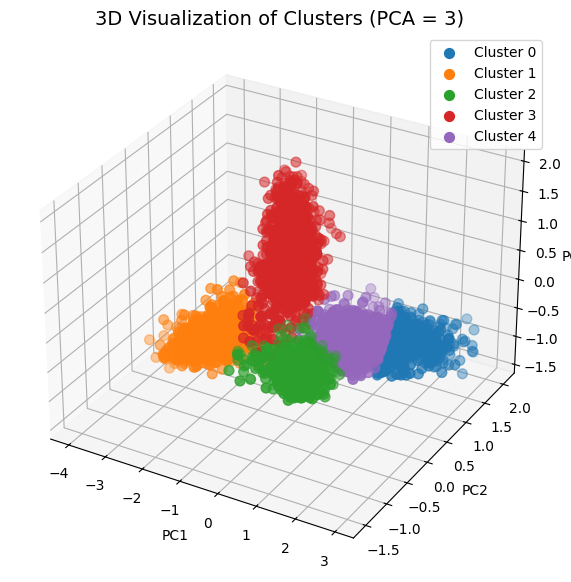

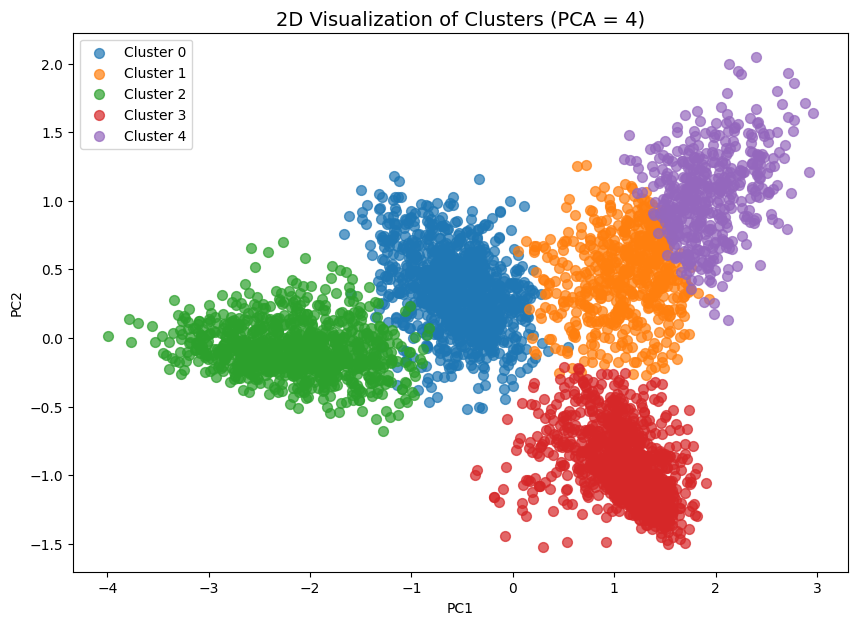

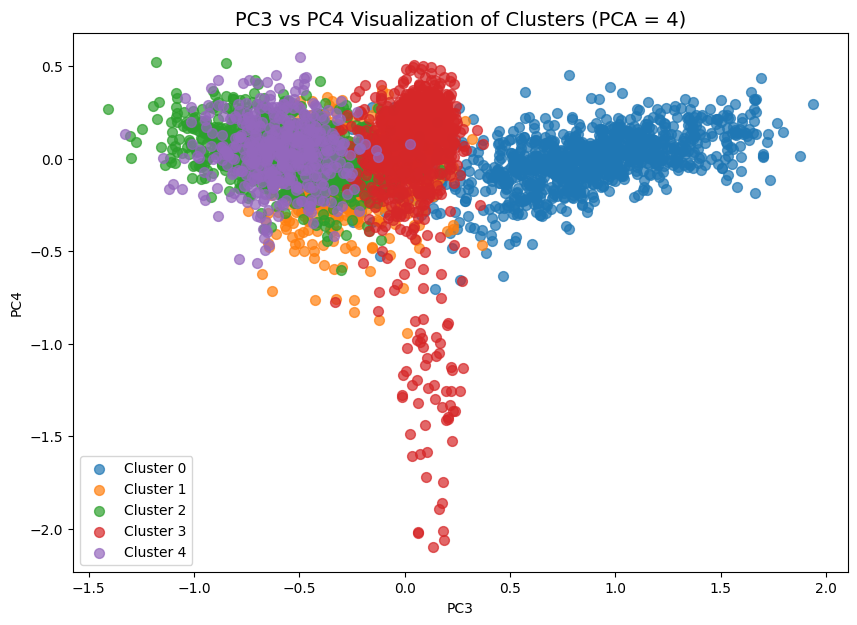

In [50]:
top_features_count = 100
selected_features_indices = feature_scores.head(top_features_count)['Feature'].apply(lambda x: int(x.split('_')[1])).values
X_reduced = X_scaled[:, selected_features_indices]


pca_3 = PCA(n_components=3)
X_pca_3 = pca_3.fit_transform(X_reduced)

pca_4 = PCA(n_components=4)
X_pca_4 = pca_4.fit_transform(X_reduced)


optimal_k = 5
kmeans_3 = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, random_state=0)
cluster_labels_3 = kmeans_3.fit_predict(X_pca_3)

kmeans_4 = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, random_state=0)
cluster_labels_4 = kmeans_4.fit_predict(X_pca_4)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for cluster in range(optimal_k):
    cluster_points = X_pca_3[cluster_labels_3 == cluster]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=f'Cluster {cluster}', s=50)

ax.set_title('3D Visualization of Clusters (PCA = 3)', fontsize=14)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.show()

plt.figure(figsize=(10, 7))
for cluster in range(optimal_k):
    cluster_points = X_pca_4[cluster_labels_4 == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}', s=50, alpha=0.7)

plt.title('2D Visualization of Clusters (PCA = 4)', fontsize=14)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


plt.figure(figsize=(10, 7))
for cluster in range(optimal_k):
    cluster_points = X_pca_4[cluster_labels_4 == cluster]
    plt.scatter(cluster_points[:, 2], cluster_points[:, 3], label=f'Cluster {cluster}', s=50, alpha=0.7)

plt.title('PC3 vs PC4 Visualization of Clusters (PCA = 4)', fontsize=14)
plt.xlabel('PC3')
plt.ylabel('PC4')
plt.legend()
plt.show()

Support Vector Machines (SVM): Kernal
Random Forest:
Logistic Regression:
k-Nearest Neighbors (k-NN):


In [51]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np
import time
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [52]:
data = pd.read_csv("Data.csv")
print("Initial Data Info:")
print(data.info())  

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 258 entries, image_name to feature_255
dtypes: float64(256), object(2)
memory usage: 9.8+ MB
None


In [53]:
X = data.iloc[:, 2:].values  
y = data["class"].values  
print(f"Features Shape: {X.shape}, Labels Shape: {y.shape}")

Features Shape: (5000, 256), Labels Shape: (5000,)


In [54]:
X = pd.DataFrame(X).apply(pd.to_numeric, errors="coerce").values

In [55]:
imputer = SimpleImputer(strategy="mean")
X = imputer.fit_transform(X)
print(f"Features Shape After Cleaning: {X.shape}")

Features Shape After Cleaning: (5000, 256)


In [57]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Training Features Shape: {X_train.shape}, Training Labels Shape: {y_train.shape}")
print(f"Testing Features Shape: {X_test.shape}, Testing Labels Shape: {y_test.shape}")


Training Features Shape: (4000, 256), Training Labels Shape: (4000,)
Testing Features Shape: (1000, 256), Testing Labels Shape: (1000,)


In [58]:

hard_data = pd.read_csv("extra_hard_samples.csv")  
print("Hard Data Info:")
print(hard_data.info()) 


X_hard_raw = hard_data.iloc[:, 2:].values  
y_hard_raw = hard_data["class"].values  


hard_data_clean = pd.DataFrame(X_hard_raw)
hard_data_clean["class"] = y_hard_raw

X_hard = []
y_hard = []
for cls in np.unique(y_hard_raw):
    class_subset = hard_data_clean[hard_data_clean["class"] == cls]
    sampled_class = class_subset.sample(n=70, random_state=42)  
    X_hard.append(sampled_class.iloc[:, :-1].values)  
    y_hard.append(sampled_class["class"].values)


X_hard = np.vstack(X_hard)
y_hard = np.hstack(y_hard)
print(f"Sampled Hard Features Shape: {X_hard.shape}, Sampled Hard Labels Shape: {y_hard.shape}")


X_hard = pd.DataFrame(X_hard).apply(pd.to_numeric, errors="coerce").values
X_hard = imputer.fit_transform(X_hard)  


X_train_combined = np.vstack((X_train, X_hard))
y_train_combined = np.hstack((y_train, y_hard))

print(f"Combined Training Features Shape: {X_train_combined.shape}")
print(f"Combined Training Labels Shape: {y_train_combined.shape}")


X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
    X_train_combined, y_train_combined, test_size=0.2, random_state=42, stratify=y_train_combined
)

print(f"Final Training Features Shape: {X_train_final.shape}, Final Labels Shape: {y_train_final.shape}")
print(f"Final Testing Features Shape: {X_test_final.shape}, Final Labels Shape: {y_test_final.shape}")


print("Validation Check:")
print(f"Unique Training Labels: {np.unique(y_train_final)}")
print(f"Unique Testing Labels: {np.unique(y_test_final)}")

# Optional: Save cleaned data to CSV for debugging or further use
pd.DataFrame(X_train_final).to_csv("Cleaned_X_train_final.csv", index=False)
pd.DataFrame(y_train_final, columns=["Labels"]).to_csv("Cleaned_y_train_final.csv", index=False)
pd.DataFrame(X_test_final).to_csv("Cleaned_X_test_final.csv", index=False)
pd.DataFrame(y_test_final, columns=["Labels"]).to_csv("Cleaned_y_test_final.csv", index=False)

print("Cleaned data saved as CSV files.")

Hard Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1669 entries, 0 to 1668
Columns: 258 entries, image_name to feature_255
dtypes: float64(256), object(2)
memory usage: 3.3+ MB
None
Sampled Hard Features Shape: (350, 256), Sampled Hard Labels Shape: (350,)
Combined Training Features Shape: (4350, 256)
Combined Training Labels Shape: (4350,)
Final Training Features Shape: (3480, 256), Final Labels Shape: (3480,)
Final Testing Features Shape: (870, 256), Final Labels Shape: (870,)
Validation Check:
Unique Training Labels: ['bike' 'bus' 'car' 'person' 'sign']
Unique Testing Labels: ['bike' 'bus' 'car' 'person' 'sign']
Cleaned data saved as CSV files.


In [105]:
from sklearn.ensemble import BaggingClassifier

In [107]:

kf = KFold(n_splits=4, shuffle=True, random_state=42)
C_values = [0.01, 0.1, 1, 10]
gamma_values = [0.01, 0.1, 1, 10]
n_estimators = [5, 10, 25]
max_samples = [0.2, 0.5, 0.7]
scalers = {
    "MinMaxScaler": MinMaxScaler(),
    "StandardScaler": StandardScaler()
}
top_features_count = 100
pca_components = 4

mi_scores = mutual_info_classif(X_train_final, y_train_final, random_state=42)
feature_indices = np.argsort(mi_scores)[-top_features_count:]  # Top 100 features
X_train_reduced = X_train_final[:, feature_indices]


results = []


for scaler_name, scaler in scalers.items():
    print(f"\nTesting Bagging with {scaler_name} (PCA={pca_components}, Features={top_features_count})")

   
    for n in n_estimators:
        for samples in max_samples:
            for C in C_values:
                for gamma in gamma_values:
                    print(f"Testing Bagging with {n} estimators, max_samples={samples}, C={C}, gamma={gamma}")

                    
                    bagging = BaggingClassifier(
                        estimator=SVC(kernel='rbf', C=C, gamma=gamma, probability=True, random_state=42),
                        n_estimators=n,
                        max_samples=samples,
                        random_state=42,
                        n_jobs=-1
                    )
                    train_accuracies = []
                    val_accuracies = []
                    f1_scores = []
                    roc_aucs = []
                    times_taken = []

                    
                    for train_index, val_index in kf.split(X_train_reduced):
                        
                        X_train_fold, X_val_fold = X_train_reduced[train_index], X_train_reduced[val_index]
                        y_train_fold, y_val_fold = y_train_final[train_index], y_train_final[val_index]

                        
                        X_train_fold_scaled = scaler.fit_transform(X_train_fold)
                        X_val_fold_scaled = scaler.transform(X_val_fold)

                        
                        pca = PCA(n_components=pca_components)
                        X_train_fold_pca = pca.fit_transform(X_train_fold_scaled)
                        X_val_fold_pca = pca.transform(X_val_fold_scaled)

                        
                        start_time = time.time()
                        bagging.fit(X_train_fold_pca, y_train_fold)
                        time_taken = time.time() - start_time
                        times_taken.append(time_taken)

                        y_train_pred = bagging.predict(X_train_fold_pca)
                        y_val_pred = bagging.predict(X_val_fold_pca)

                        
                        train_accuracies.append(accuracy_score(y_train_fold, y_train_pred))
                        val_accuracies.append(accuracy_score(y_val_fold, y_val_pred))

                        
                        f1_scores.append(f1_score(y_val_fold, y_val_pred, average='weighted'))

                        
                        if len(np.unique(y_train_final)) > 2:
                            y_val_prob = bagging.predict_proba(X_val_fold_pca)
                            roc_aucs.append(roc_auc_score(label_binarize(y_val_fold, classes=np.unique(y_train_final)), y_val_prob, multi_class='ovr'))
                        else:
                            roc_aucs.append(roc_auc_score(y_val_fold, bagging.predict_proba(X_val_fold_pca)[:, 1]))

                    avg_train_accuracy = np.mean(train_accuracies)
                    avg_val_accuracy = np.mean(val_accuracies)
                    avg_f1_score = np.mean(f1_scores)
                    avg_roc_auc = np.mean(roc_aucs)
                    avg_time_taken = np.mean(times_taken)

                    print(f"Bagging with {n} estimators, max_samples={samples}, C={C}, gamma={gamma} -> "
                          f"Train Accuracy: {avg_train_accuracy:.4f}, "
                          f"Validation Accuracy: {avg_val_accuracy:.4f}, "
                          f"F1-Score: {avg_f1_score:.4f}, "
                          f"AUC-ROC: {avg_roc_auc:.4f}, "
                          f"Time Taken: {avg_time_taken:.4f} seconds\n")

                    
                    results.append({
                        "Scaler": scaler_name,
                        "N_Estimators": n,
                        "Max_Samples": samples,
                        "C": C,
                        "Gamma": gamma,
                        "Train Accuracy": avg_train_accuracy,
                        "Validation Accuracy": avg_val_accuracy,
                        "F1-Score": avg_f1_score,
                        "AUC-ROC": avg_roc_auc,
                        "Time Taken": avg_time_taken
                    })


results_df = pd.DataFrame(results)



Testing Bagging with MinMaxScaler (PCA=4, Features=100)
Testing Bagging with 5 estimators, max_samples=0.2, C=0.01, gamma=0.01
Bagging with 5 estimators, max_samples=0.2, C=0.01, gamma=0.01 -> Train Accuracy: 0.9013, Validation Accuracy: 0.9040, F1-Score: 0.9048, AUC-ROC: 0.9831, Time Taken: 0.3430 seconds

Testing Bagging with 5 estimators, max_samples=0.2, C=0.01, gamma=0.1
Bagging with 5 estimators, max_samples=0.2, C=0.01, gamma=0.1 -> Train Accuracy: 0.9155, Validation Accuracy: 0.9138, F1-Score: 0.9140, AUC-ROC: 0.9884, Time Taken: 0.0624 seconds

Testing Bagging with 5 estimators, max_samples=0.2, C=0.01, gamma=1
Bagging with 5 estimators, max_samples=0.2, C=0.01, gamma=1 -> Train Accuracy: 0.9208, Validation Accuracy: 0.9198, F1-Score: 0.9200, AUC-ROC: 0.9909, Time Taken: 0.0800 seconds

Testing Bagging with 5 estimators, max_samples=0.2, C=0.01, gamma=10
Bagging with 5 estimators, max_samples=0.2, C=0.01, gamma=10 -> Train Accuracy: 0.8773, Validation Accuracy: 0.8626, F1-Sco

Bagging with 5 estimators, max_samples=0.7, C=0.01, gamma=0.1 -> Train Accuracy: 0.9205, Validation Accuracy: 0.9204, F1-Score: 0.9206, AUC-ROC: 0.9945, Time Taken: 0.3896 seconds

Testing Bagging with 5 estimators, max_samples=0.7, C=0.01, gamma=1
Bagging with 5 estimators, max_samples=0.7, C=0.01, gamma=1 -> Train Accuracy: 0.9228, Validation Accuracy: 0.9230, F1-Score: 0.9231, AUC-ROC: 0.9935, Time Taken: 0.3680 seconds

Testing Bagging with 5 estimators, max_samples=0.7, C=0.01, gamma=10
Bagging with 5 estimators, max_samples=0.7, C=0.01, gamma=10 -> Train Accuracy: 0.8560, Validation Accuracy: 0.8460, F1-Score: 0.8543, AUC-ROC: 0.9887, Time Taken: 0.4557 seconds

Testing Bagging with 5 estimators, max_samples=0.7, C=0.1, gamma=0.01
Bagging with 5 estimators, max_samples=0.7, C=0.1, gamma=0.01 -> Train Accuracy: 0.9213, Validation Accuracy: 0.9216, F1-Score: 0.9216, AUC-ROC: 0.9946, Time Taken: 0.3639 seconds

Testing Bagging with 5 estimators, max_samples=0.7, C=0.1, gamma=0.1
Bag

Bagging with 10 estimators, max_samples=0.5, C=0.01, gamma=10 -> Train Accuracy: 0.8953, Validation Accuracy: 0.8856, F1-Score: 0.8870, AUC-ROC: 0.9862, Time Taken: 0.5307 seconds

Testing Bagging with 10 estimators, max_samples=0.5, C=0.1, gamma=0.01
Bagging with 10 estimators, max_samples=0.5, C=0.1, gamma=0.01 -> Train Accuracy: 0.9204, Validation Accuracy: 0.9201, F1-Score: 0.9204, AUC-ROC: 0.9945, Time Taken: 0.4476 seconds

Testing Bagging with 10 estimators, max_samples=0.5, C=0.1, gamma=0.1
Bagging with 10 estimators, max_samples=0.5, C=0.1, gamma=0.1 -> Train Accuracy: 0.9226, Validation Accuracy: 0.9233, F1-Score: 0.9233, AUC-ROC: 0.9948, Time Taken: 0.2671 seconds

Testing Bagging with 10 estimators, max_samples=0.5, C=0.1, gamma=1
Bagging with 10 estimators, max_samples=0.5, C=0.1, gamma=1 -> Train Accuracy: 0.9249, Validation Accuracy: 0.9224, F1-Score: 0.9225, AUC-ROC: 0.9924, Time Taken: 0.2023 seconds

Testing Bagging with 10 estimators, max_samples=0.5, C=0.1, gamma=10

Bagging with 25 estimators, max_samples=0.2, C=0.1, gamma=0.01 -> Train Accuracy: 0.9163, Validation Accuracy: 0.9178, F1-Score: 0.9181, AUC-ROC: 0.9907, Time Taken: 0.3202 seconds

Testing Bagging with 25 estimators, max_samples=0.2, C=0.1, gamma=0.1
Bagging with 25 estimators, max_samples=0.2, C=0.1, gamma=0.1 -> Train Accuracy: 0.9220, Validation Accuracy: 0.9224, F1-Score: 0.9225, AUC-ROC: 0.9947, Time Taken: 0.2347 seconds

Testing Bagging with 25 estimators, max_samples=0.2, C=0.1, gamma=1
Bagging with 25 estimators, max_samples=0.2, C=0.1, gamma=1 -> Train Accuracy: 0.9243, Validation Accuracy: 0.9227, F1-Score: 0.9228, AUC-ROC: 0.9933, Time Taken: 0.2147 seconds

Testing Bagging with 25 estimators, max_samples=0.2, C=0.1, gamma=10
Bagging with 25 estimators, max_samples=0.2, C=0.1, gamma=10 -> Train Accuracy: 0.9107, Validation Accuracy: 0.9037, F1-Score: 0.9056, AUC-ROC: 0.9905, Time Taken: 0.3224 seconds

Testing Bagging with 25 estimators, max_samples=0.2, C=1, gamma=0.01
Ba

/Users/michael/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Bagging with 25 estimators, max_samples=0.5, C=1, gamma=0.1 -> Train Accuracy: 0.9251, Validation Accuracy: 0.9241, F1-Score: 0.9241, AUC-ROC: 0.9952, Time Taken: 226.3066 seconds

Testing Bagging with 25 estimators, max_samples=0.5, C=1, gamma=1
Bagging with 25 estimators, max_samples=0.5, C=1, gamma=1 -> Train Accuracy: 0.9297, Validation Accuracy: 0.9264, F1-Score: 0.9264, AUC-ROC: 0.9907, Time Taken: 0.2798 seconds

Testing Bagging with 25 estimators, max_samples=0.5, C=1, gamma=10
Bagging with 25 estimators, max_samples=0.5, C=1, gamma=10 -> Train Accuracy: 0.9469, Validation Accuracy: 0.9273, F1-Score: 0.9272, AUC-ROC: 0.9903, Time Taken: 0.7592 seconds

Testing Bagging with 25 estimators, max_samples=0.5, C=10, gamma=0.01
Bagging with 25 estimators, max_samples=0.5, C=10, gamma=0.01 -> Train Accuracy: 0.9244, Validation Accuracy: 0.9236, F1-Score: 0.9236, AUC-ROC: 0.9953, Time Taken: 0.2742 seconds

Testing Bagging with 25 estimators, max_samples=0.5, C=10, gamma=0.1
Bagging wit

Bagging with 5 estimators, max_samples=0.2, C=1, gamma=1 -> Train Accuracy: 0.9390, Validation Accuracy: 0.8914, F1-Score: 0.8936, AUC-ROC: 0.9876, Time Taken: 0.1333 seconds

Testing Bagging with 5 estimators, max_samples=0.2, C=1, gamma=10
Bagging with 5 estimators, max_samples=0.2, C=1, gamma=10 -> Train Accuracy: 0.6451, Validation Accuracy: 0.4112, F1-Score: 0.3991, AUC-ROC: 0.9250, Time Taken: 0.1321 seconds

Testing Bagging with 5 estimators, max_samples=0.2, C=10, gamma=0.01
Bagging with 5 estimators, max_samples=0.2, C=10, gamma=0.01 -> Train Accuracy: 0.9292, Validation Accuracy: 0.9267, F1-Score: 0.9267, AUC-ROC: 0.9937, Time Taken: 0.0282 seconds

Testing Bagging with 5 estimators, max_samples=0.2, C=10, gamma=0.1
Bagging with 5 estimators, max_samples=0.2, C=10, gamma=0.1 -> Train Accuracy: 0.9359, Validation Accuracy: 0.9210, F1-Score: 0.9210, AUC-ROC: 0.9890, Time Taken: 0.0485 seconds

Testing Bagging with 5 estimators, max_samples=0.2, C=10, gamma=1
Bagging with 5 esti

Bagging with 5 estimators, max_samples=0.7, C=10, gamma=0.01 -> Train Accuracy: 0.9321, Validation Accuracy: 0.9270, F1-Score: 0.9269, AUC-ROC: 0.9927, Time Taken: 0.0751 seconds

Testing Bagging with 5 estimators, max_samples=0.7, C=10, gamma=0.1
Bagging with 5 estimators, max_samples=0.7, C=10, gamma=0.1 -> Train Accuracy: 0.9507, Validation Accuracy: 0.9193, F1-Score: 0.9191, AUC-ROC: 0.9868, Time Taken: 0.1520 seconds

Testing Bagging with 5 estimators, max_samples=0.7, C=10, gamma=1
Bagging with 5 estimators, max_samples=0.7, C=10, gamma=1 -> Train Accuracy: 0.9808, Validation Accuracy: 0.9029, F1-Score: 0.9034, AUC-ROC: 0.9859, Time Taken: 0.5416 seconds

Testing Bagging with 5 estimators, max_samples=0.7, C=10, gamma=10
Bagging with 5 estimators, max_samples=0.7, C=10, gamma=10 -> Train Accuracy: 0.9882, Validation Accuracy: 0.6221, F1-Score: 0.6521, AUC-ROC: 0.9690, Time Taken: 0.5735 seconds

Testing Bagging with 10 estimators, max_samples=0.2, C=0.01, gamma=0.01
Bagging with 

Bagging with 10 estimators, max_samples=0.5, C=10, gamma=0.1 -> Train Accuracy: 0.9497, Validation Accuracy: 0.9227, F1-Score: 0.9226, AUC-ROC: 0.9887, Time Taken: 0.2263 seconds

Testing Bagging with 10 estimators, max_samples=0.5, C=10, gamma=1
Bagging with 10 estimators, max_samples=0.5, C=10, gamma=1 -> Train Accuracy: 0.9784, Validation Accuracy: 0.9037, F1-Score: 0.9046, AUC-ROC: 0.9876, Time Taken: 0.6243 seconds

Testing Bagging with 10 estimators, max_samples=0.5, C=10, gamma=10


/Users/michael/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Bagging with 10 estimators, max_samples=0.5, C=10, gamma=10 -> Train Accuracy: 0.9951, Validation Accuracy: 0.6175, F1-Score: 0.6475, AUC-ROC: 0.9693, Time Taken: 242.0281 seconds

Testing Bagging with 10 estimators, max_samples=0.7, C=0.01, gamma=0.01


/Users/michael/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Bagging with 10 estimators, max_samples=0.7, C=0.01, gamma=0.01 -> Train Accuracy: 0.9229, Validation Accuracy: 0.9227, F1-Score: 0.9228, AUC-ROC: 0.9944, Time Taken: 0.5296 seconds

Testing Bagging with 10 estimators, max_samples=0.7, C=0.01, gamma=0.1
Bagging with 10 estimators, max_samples=0.7, C=0.01, gamma=0.1 -> Train Accuracy: 0.9204, Validation Accuracy: 0.9190, F1-Score: 0.9192, AUC-ROC: 0.9915, Time Taken: 0.7941 seconds

Testing Bagging with 10 estimators, max_samples=0.7, C=0.01, gamma=1


/Users/michael/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Bagging with 10 estimators, max_samples=0.7, C=0.01, gamma=1 -> Train Accuracy: 0.8707, Validation Accuracy: 0.8195, F1-Score: 0.8280, AUC-ROC: 0.9840, Time Taken: 0.7445 seconds

Testing Bagging with 10 estimators, max_samples=0.7, C=0.01, gamma=10
Bagging with 10 estimators, max_samples=0.7, C=0.01, gamma=10 -> Train Accuracy: 0.9791, Validation Accuracy: 0.5181, F1-Score: 0.5252, AUC-ROC: 0.9393, Time Taken: 0.7959 seconds

Testing Bagging with 10 estimators, max_samples=0.7, C=0.1, gamma=0.01
Bagging with 10 estimators, max_samples=0.7, C=0.1, gamma=0.01 -> Train Accuracy: 0.9246, Validation Accuracy: 0.9221, F1-Score: 0.9222, AUC-ROC: 0.9942, Time Taken: 0.2558 seconds

Testing Bagging with 10 estimators, max_samples=0.7, C=0.1, gamma=0.1
Bagging with 10 estimators, max_samples=0.7, C=0.1, gamma=0.1 -> Train Accuracy: 0.9283, Validation Accuracy: 0.9247, F1-Score: 0.9247, AUC-ROC: 0.9906, Time Taken: 100.5597 seconds

Testing Bagging with 10 estimators, max_samples=0.7, C=0.1, gam

/Users/michael/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Bagging with 10 estimators, max_samples=0.7, C=1, gamma=10 -> Train Accuracy: 0.9984, Validation Accuracy: 0.6164, F1-Score: 0.6467, AUC-ROC: 0.9694, Time Taken: 418.9577 seconds

Testing Bagging with 10 estimators, max_samples=0.7, C=10, gamma=0.01
Bagging with 10 estimators, max_samples=0.7, C=10, gamma=0.01 -> Train Accuracy: 0.9319, Validation Accuracy: 0.9284, F1-Score: 0.9284, AUC-ROC: 0.9930, Time Taken: 0.1671 seconds

Testing Bagging with 10 estimators, max_samples=0.7, C=10, gamma=0.1
Bagging with 10 estimators, max_samples=0.7, C=10, gamma=0.1 -> Train Accuracy: 0.9533, Validation Accuracy: 0.9195, F1-Score: 0.9195, AUC-ROC: 0.9879, Time Taken: 0.3016 seconds

Testing Bagging with 10 estimators, max_samples=0.7, C=10, gamma=1
Bagging with 10 estimators, max_samples=0.7, C=10, gamma=1 -> Train Accuracy: 0.9889, Validation Accuracy: 0.9040, F1-Score: 0.9046, AUC-ROC: 0.9868, Time Taken: 0.8193 seconds

Testing Bagging with 10 estimators, max_samples=0.7, C=10, gamma=10
Bagging

Bagging with 25 estimators, max_samples=0.5, C=10, gamma=0.01 -> Train Accuracy: 0.9307, Validation Accuracy: 0.9282, F1-Score: 0.9281, AUC-ROC: 0.9934, Time Taken: 0.2460 seconds

Testing Bagging with 25 estimators, max_samples=0.5, C=10, gamma=0.1
Bagging with 25 estimators, max_samples=0.5, C=10, gamma=0.1 -> Train Accuracy: 0.9492, Validation Accuracy: 0.9244, F1-Score: 0.9243, AUC-ROC: 0.9892, Time Taken: 0.3832 seconds

Testing Bagging with 25 estimators, max_samples=0.5, C=10, gamma=1
Bagging with 25 estimators, max_samples=0.5, C=10, gamma=1 -> Train Accuracy: 0.9836, Validation Accuracy: 0.9055, F1-Score: 0.9060, AUC-ROC: 0.9881, Time Taken: 1.0802 seconds

Testing Bagging with 25 estimators, max_samples=0.5, C=10, gamma=10
Bagging with 25 estimators, max_samples=0.5, C=10, gamma=10 -> Train Accuracy: 0.9992, Validation Accuracy: 0.6198, F1-Score: 0.6500, AUC-ROC: 0.9689, Time Taken: 1.1561 seconds

Testing Bagging with 25 estimators, max_samples=0.7, C=0.01, gamma=0.01
Baggin

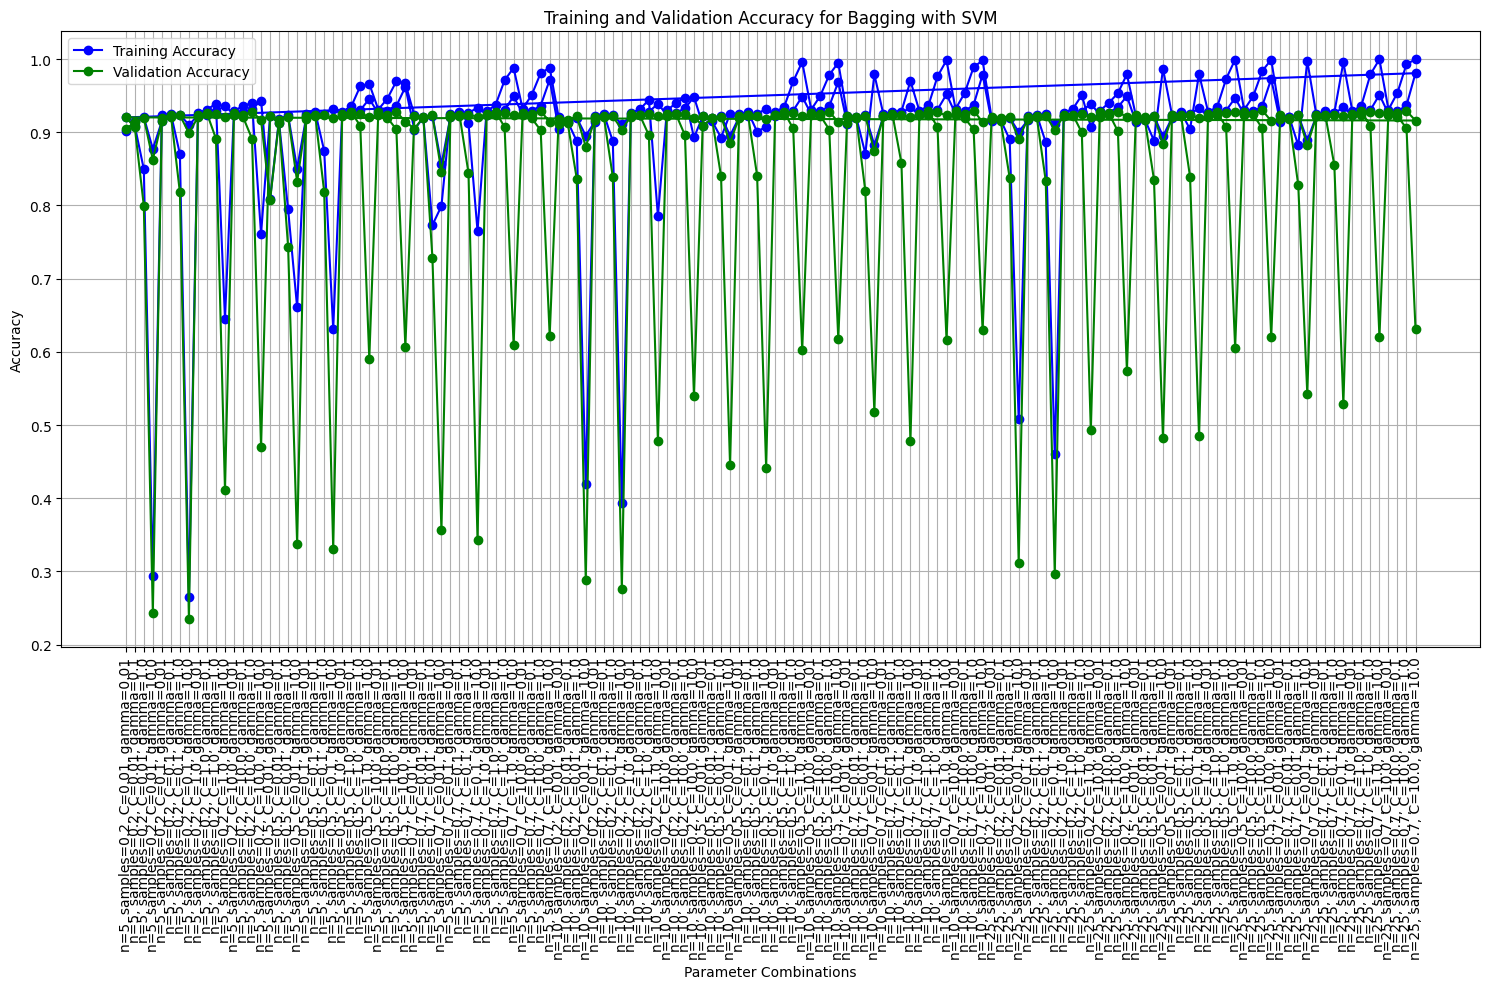

In [108]:
labels = [
    f"n={row['N_Estimators']}, samples={row['Max_Samples']}, C={row['C']}, gamma={row['Gamma']}" 
    for _, row in results_df.iterrows()
]

plt.figure(figsize=(15, 10))


plt.plot(labels, results_df['Train Accuracy'], label='Training Accuracy', marker='o', linestyle='-', color='b')

plt.plot(labels, results_df['Validation Accuracy'], label='Validation Accuracy', marker='o', linestyle='-', color='g')

plt.xticks(rotation=90)  
plt.xlabel('Parameter Combinations')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy for Bagging with SVM')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


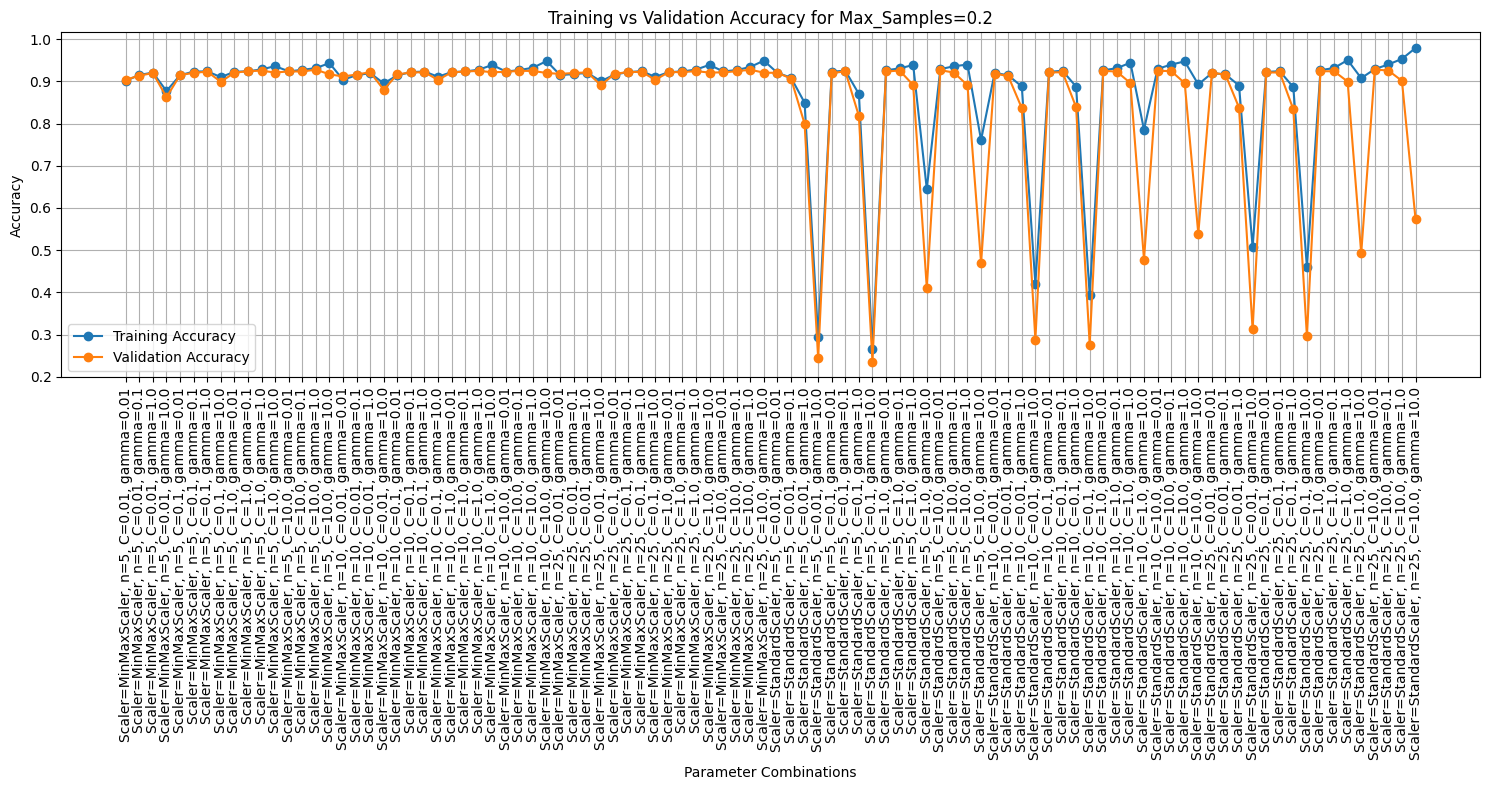

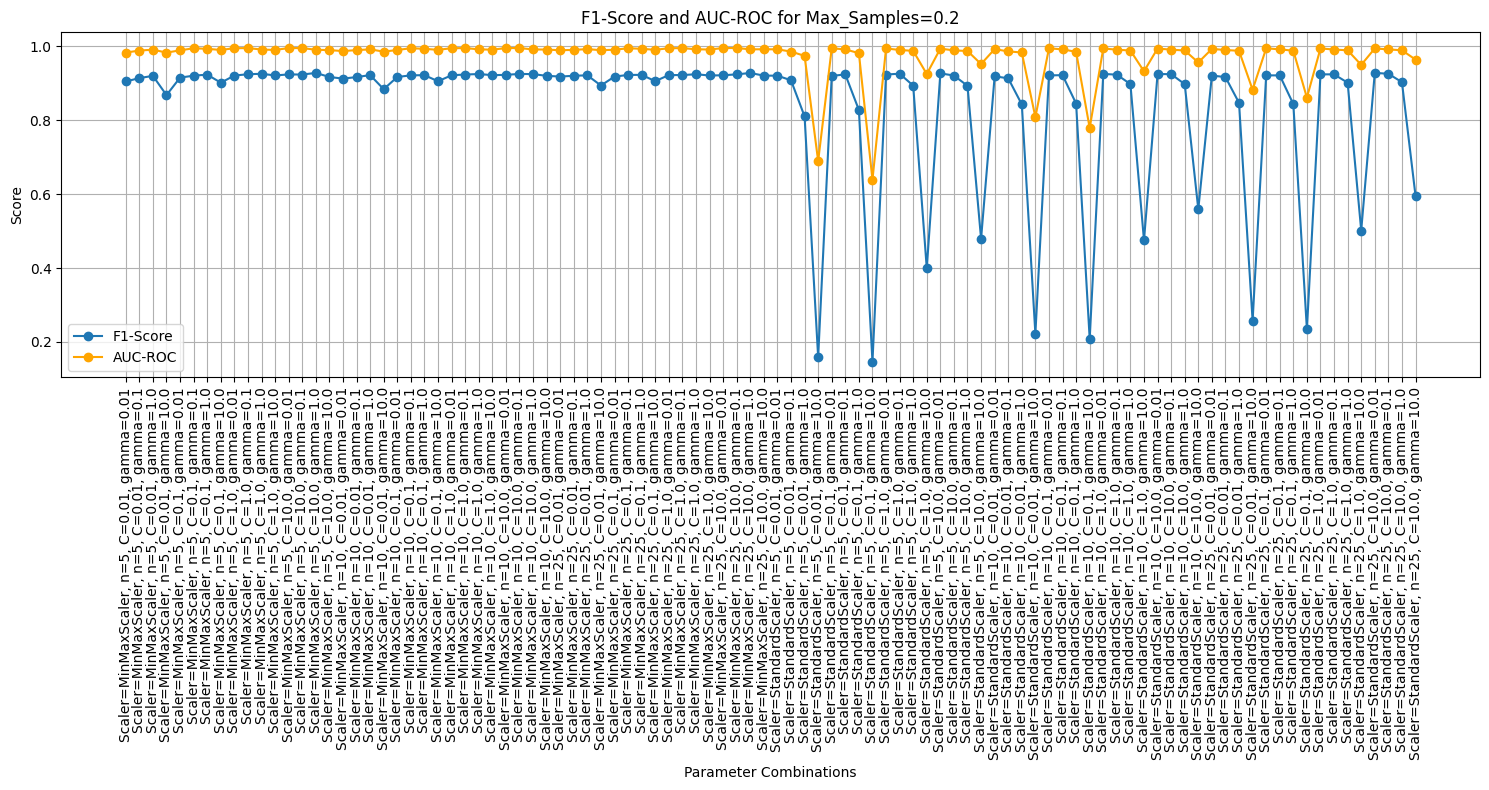

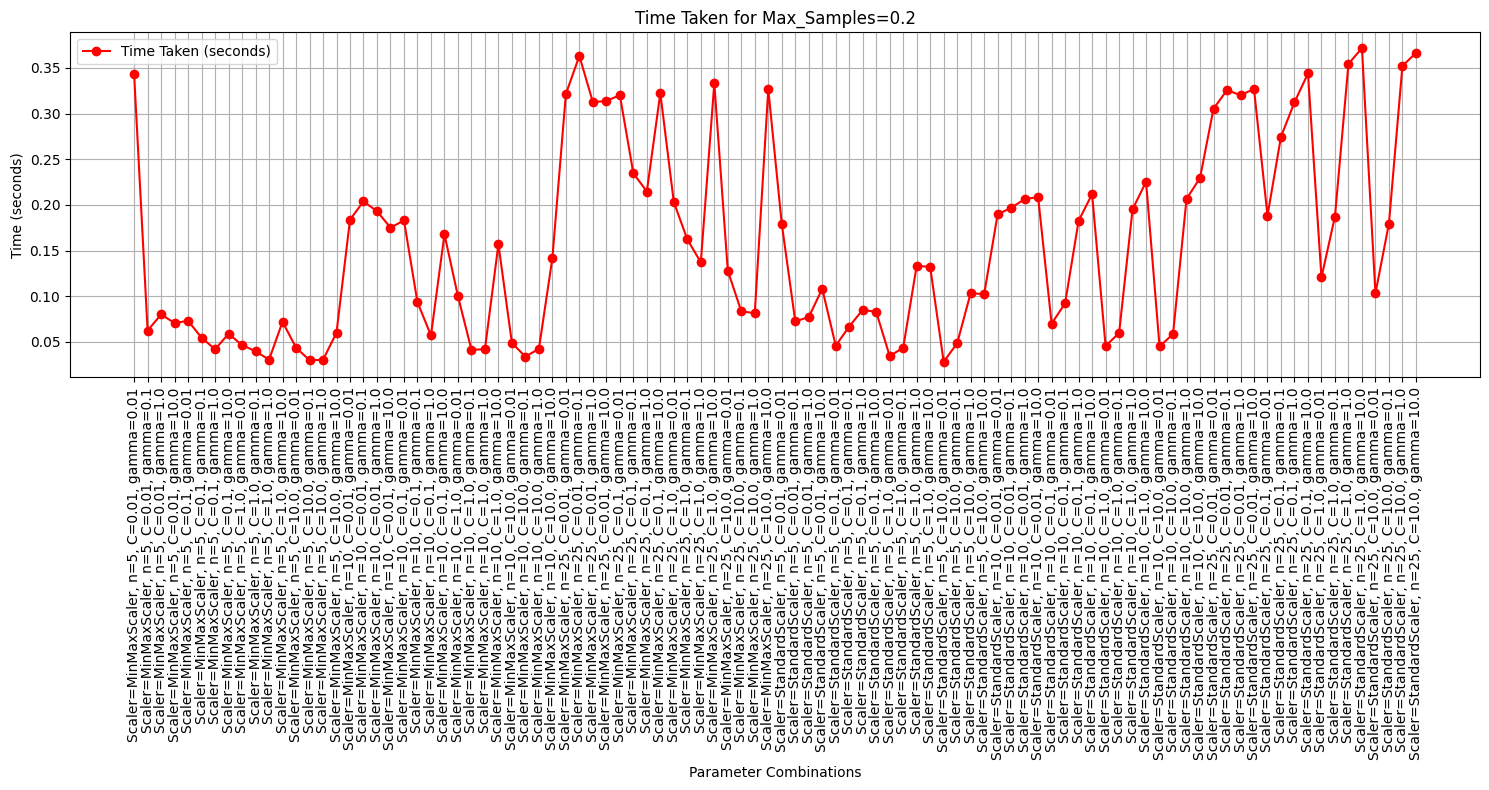

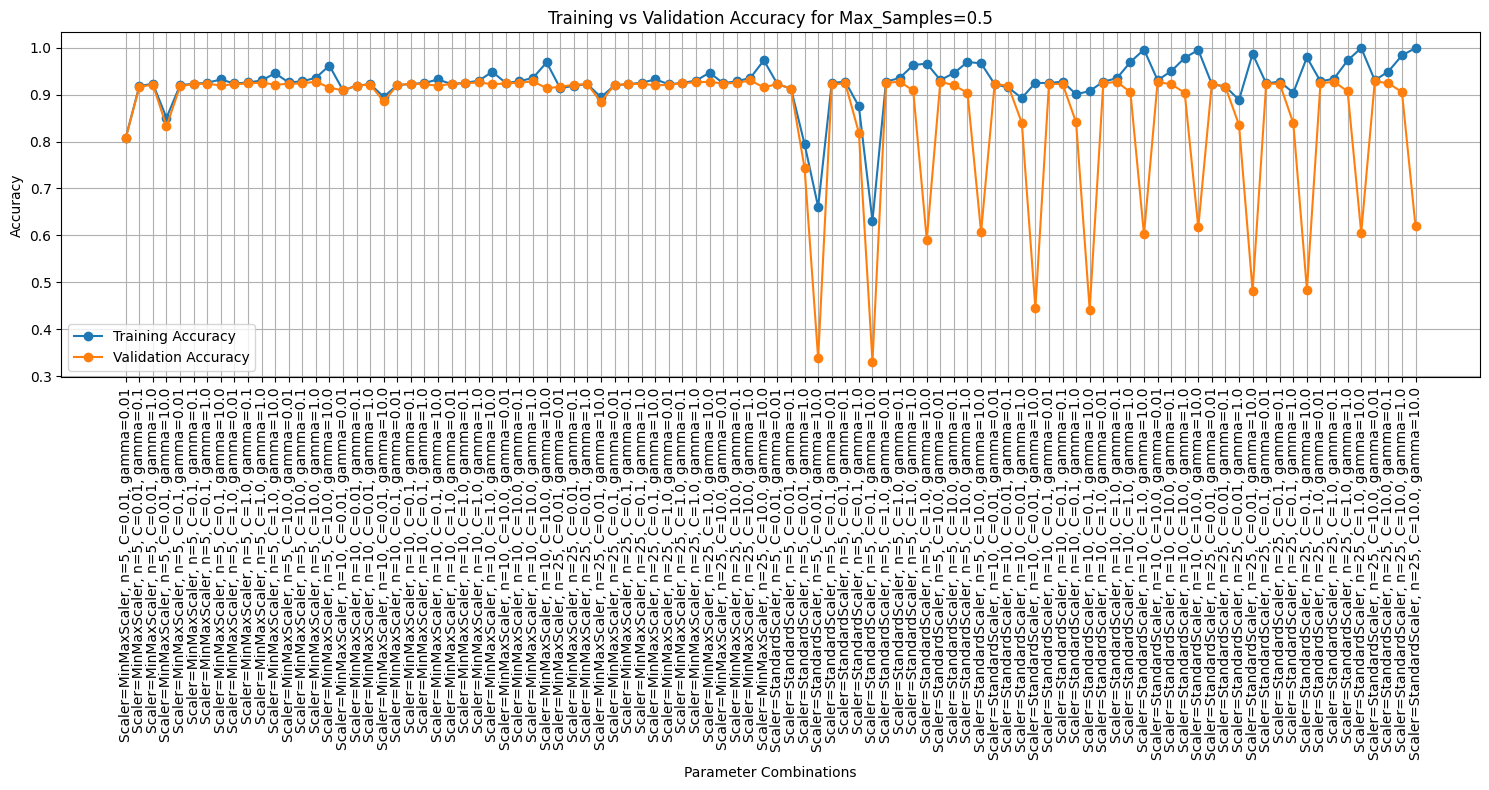

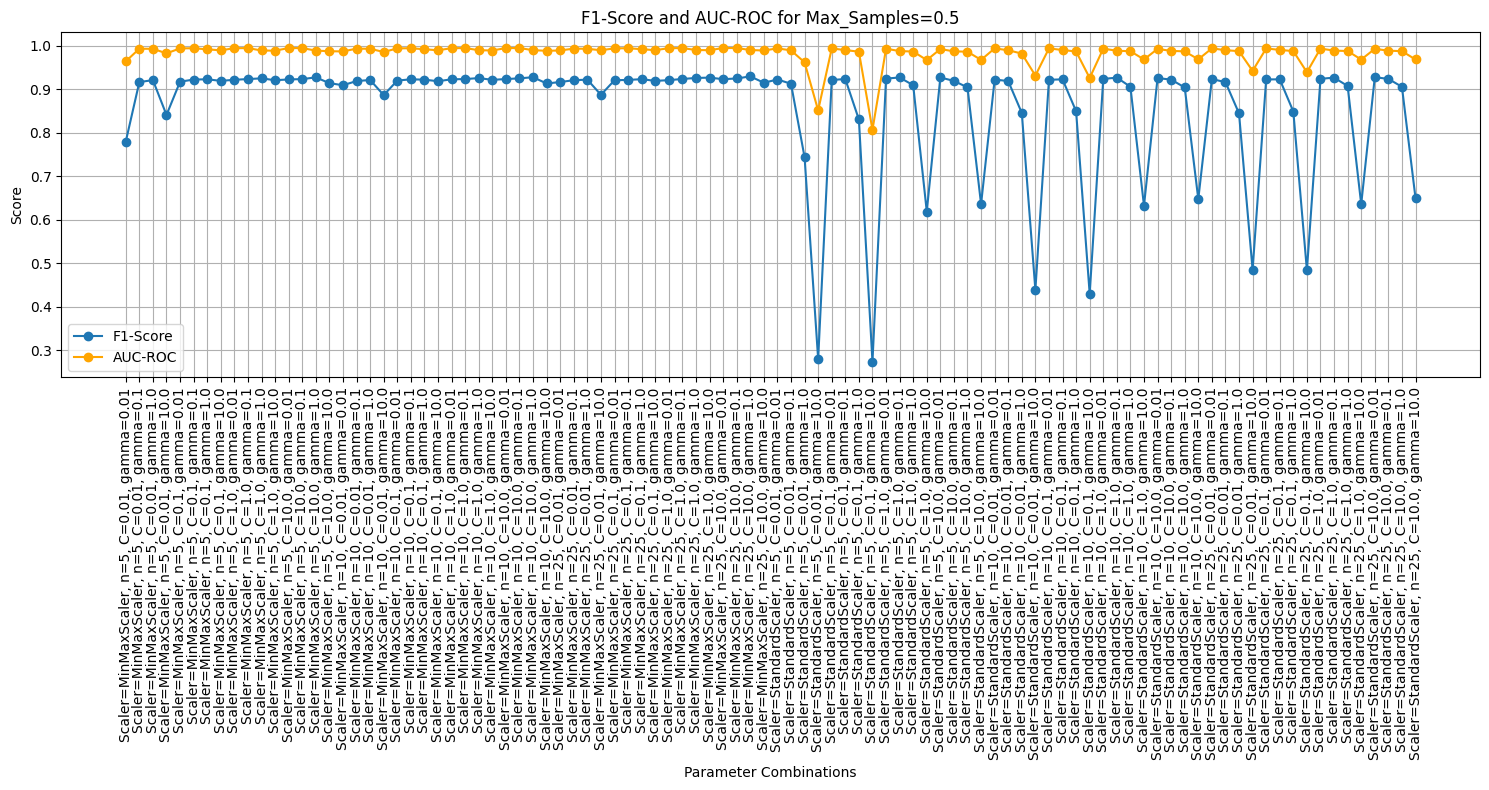

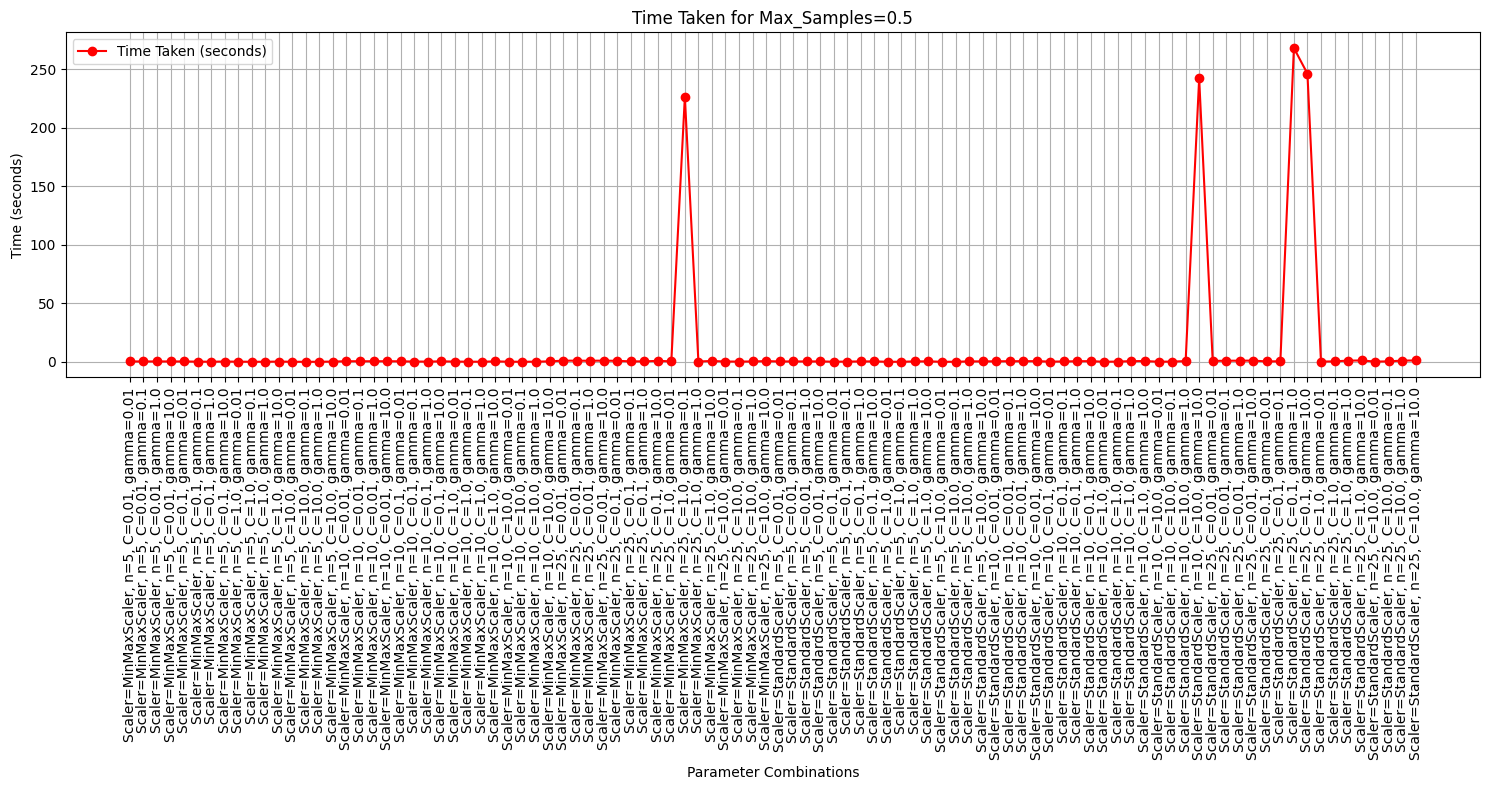

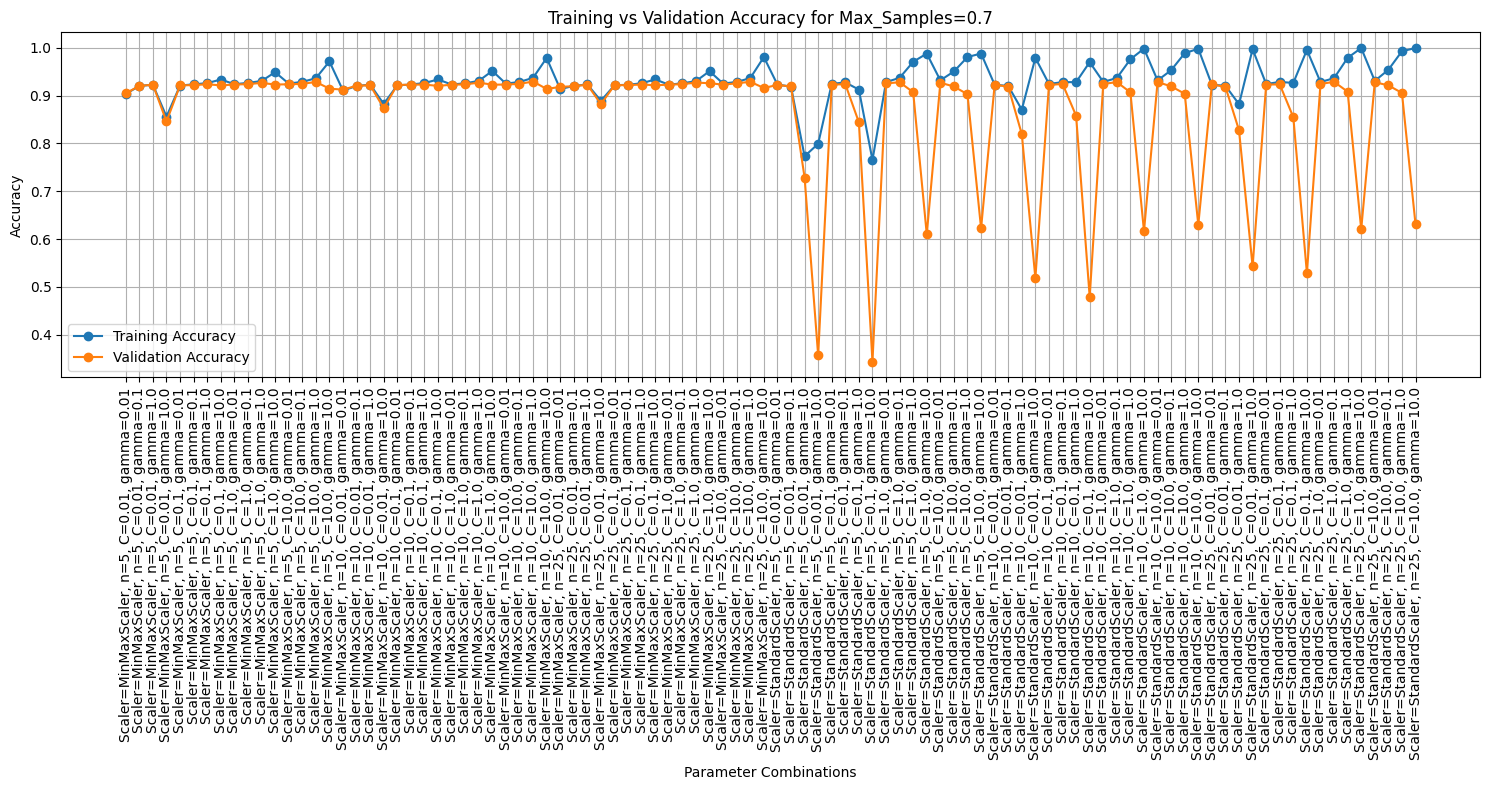

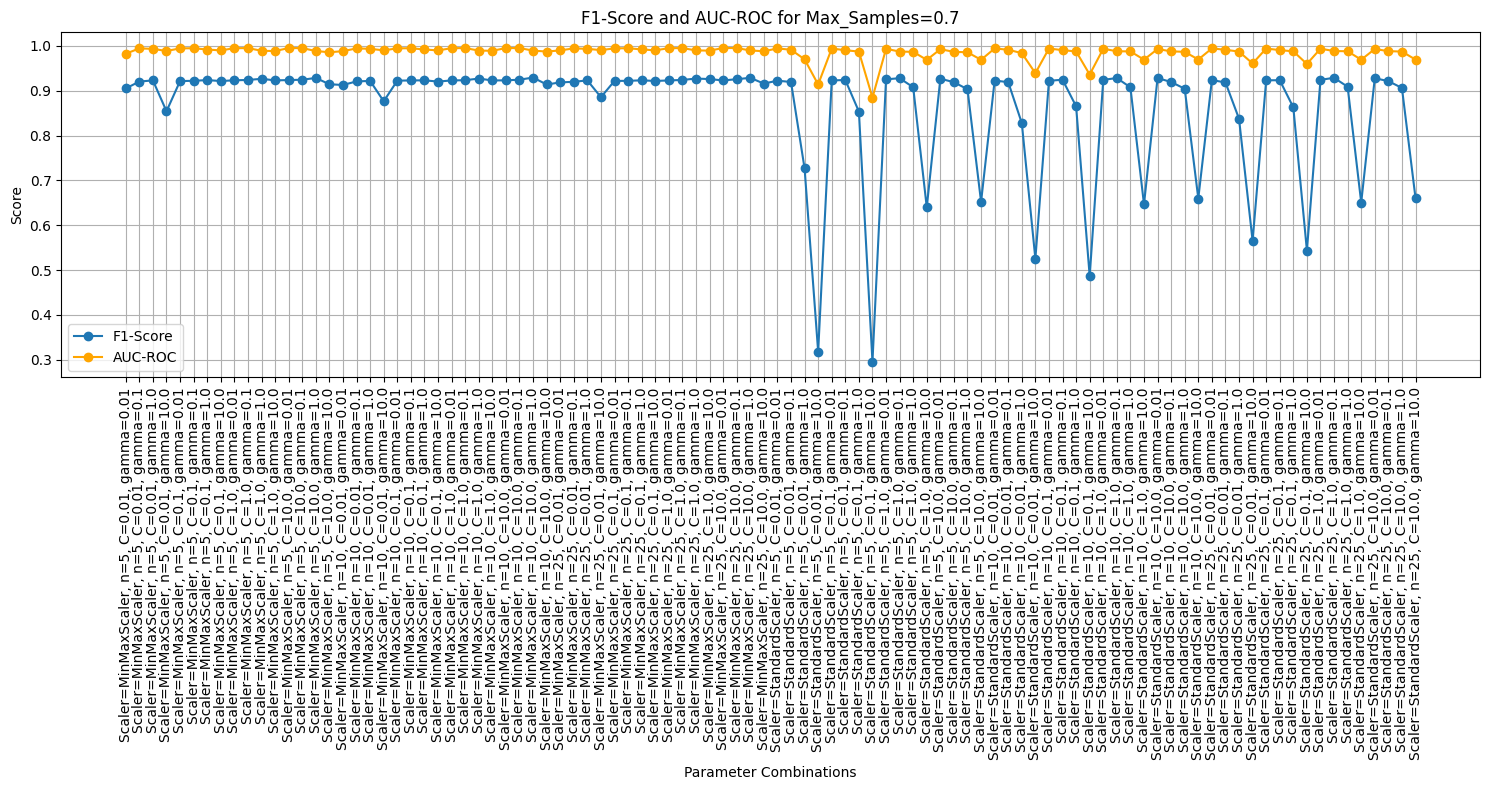

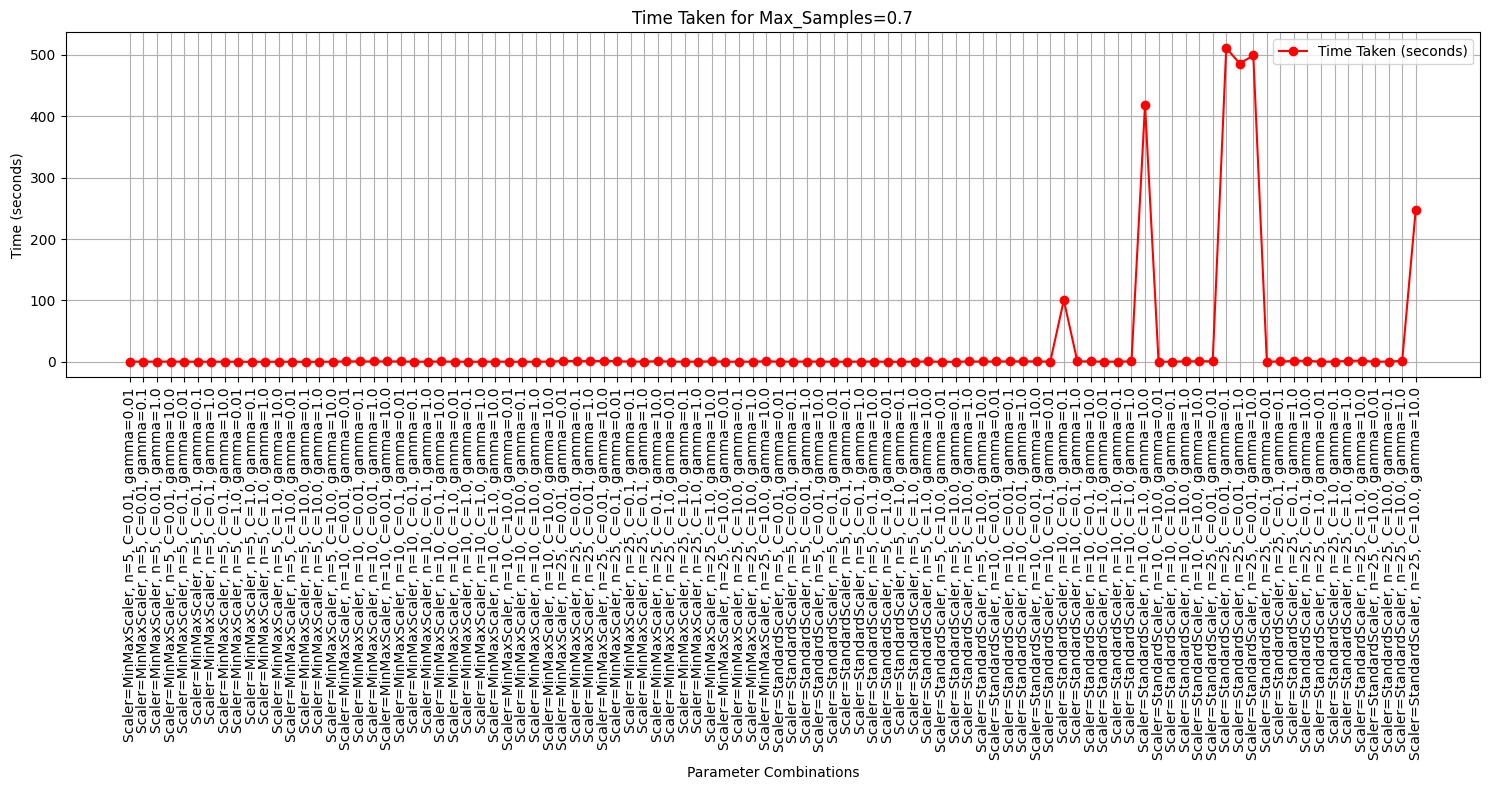

In [109]:

max_samples_values = [0.2, 0.5, 0.7]

for max_samples in max_samples_values:
    
    filtered_results = results_df[results_df['Max_Samples'] == max_samples]
    
    
    labels = [
        f"Scaler={row['Scaler']}, n={row['N_Estimators']}, C={row['C']}, gamma={row['Gamma']}" 
        for _, row in filtered_results.iterrows()
    ]
    
    
    plt.figure(figsize=(15, 8))
    plt.plot(labels, filtered_results['Train Accuracy'], label='Training Accuracy', marker='o')
    plt.plot(labels, filtered_results['Validation Accuracy'], label='Validation Accuracy', marker='o')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.xlabel('Parameter Combinations')
    plt.ylabel('Accuracy')
    plt.title(f'Training vs Validation Accuracy for Max_Samples={max_samples}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    
    plt.figure(figsize=(15, 8))
    plt.plot(labels, filtered_results['F1-Score'], label='F1-Score', marker='o')
    plt.plot(labels, filtered_results['AUC-ROC'], label='AUC-ROC', marker='o', color='orange')
    plt.xticks(rotation=90)
    plt.xlabel('Parameter Combinations')
    plt.ylabel('Score')
    plt.title(f'F1-Score and AUC-ROC for Max_Samples={max_samples}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    
    plt.figure(figsize=(15, 8))
    plt.plot(labels, filtered_results['Time Taken'], label='Time Taken (seconds)', marker='o', color='red')
    plt.xticks(rotation=90)
    plt.xlabel('Parameter Combinations')
    plt.ylabel('Time (seconds)')
    plt.title(f'Time Taken for Max_Samples={max_samples}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Linear Kernal SVM 
Scaler: MinMaxScaler
C: 1
Gamma: 0.1 - my parameter for test later on

KNN

In [114]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import  LabelEncoder

In [115]:
k_values = [1, 3, 5, 7, 10, 13, 16, 20, 25, 30, 50]
weights = ['uniform', 'distance']
metrics = ['euclidean', 'manhattan']
scalers = {
    "MinMaxScaler": MinMaxScaler(),
    "StandardScaler": StandardScaler()
}
kf = KFold(n_splits=4, shuffle=True, random_state=42)


top_features_count = 100
mi_scores = mutual_info_classif(X_train_final, y_train_final, random_state=0)
feature_indices = np.argsort(mi_scores)[-top_features_count:]
X_reduced = X_train_final[:, feature_indices]


pca_components = 4
pca = PCA(n_components=pca_components)
X_pca = pca.fit_transform(X_reduced)


results = []


for scaler_name, scaler in scalers.items():
    print(f"\nTesting with {scaler_name} (PCA={pca_components}, Features={top_features_count})")

    for k in k_values:
        for weight in weights:
            for metric in metrics:
                print(f"Testing KNN with K={k}, weight={weight}, metric={metric}")
                knn = KNeighborsClassifier(n_neighbors=k, weights=weight, metric=metric)
                
                train_accuracies = []
                val_accuracies = []
                f1_scores = []
                roc_aucs = []
                times_taken = []

                for train_index, val_index in kf.split(X_pca):
                    
                    X_train_fold, X_val_fold = X_pca[train_index], X_pca[val_index]
                    y_train_fold, y_val_fold = y_train_final[train_index], y_train_final[val_index]

                   
                    X_train_fold_scaled = scaler.fit_transform(X_train_fold)
                    X_val_fold_scaled = scaler.transform(X_val_fold)

                    
                    start_time = time.time()
                    knn.fit(X_train_fold_scaled, y_train_fold)
                    time_taken = time.time() - start_time
                    times_taken.append(time_taken)

                    
                    y_train_pred = knn.predict(X_train_fold_scaled)
                    y_val_pred = knn.predict(X_val_fold_scaled)

                    
                    train_accuracies.append(accuracy_score(y_train_fold, y_train_pred))
                    val_accuracies.append(accuracy_score(y_val_fold, y_val_pred))
                    f1_scores.append(f1_score(y_val_fold, y_val_pred, average='weighted'))

                    
                    if len(np.unique(y_train_final)) > 2:
                        y_val_prob = knn.predict_proba(X_val_fold_scaled)
                        roc_aucs.append(roc_auc_score(
                            label_binarize(y_val_fold, classes=np.unique(y_train_final)), y_val_prob, multi_class='ovr'
                        ))

                
                avg_train_accuracy = np.mean(train_accuracies)
                avg_val_accuracy = np.mean(val_accuracies)
                avg_f1_score = np.mean(f1_scores)
                avg_roc_auc = np.mean(roc_aucs)
                avg_time_taken = np.mean(times_taken)

                print(f"K={k}, weight={weight}, metric={metric} -> "
                      f"Train Accuracy: {avg_train_accuracy:.4f}, "
                      f"Validation Accuracy: {avg_val_accuracy:.4f}, "
                      f"F1-Score: {avg_f1_score:.4f}, "
                      f"AUC-ROC: {avg_roc_auc:.4f}, "
                      f"Time Taken: {avg_time_taken:.4f} seconds\n")

                
                results.append({
                    "Scaler": scaler_name,
                    "K": k,
                    "Weight": weight,
                    "Metric": metric,
                    "Train Accuracy": avg_train_accuracy,
                    "Validation Accuracy": avg_val_accuracy,
                    "F1-Score": avg_f1_score,
                    "AUC-ROC": avg_roc_auc,
                    "Time Taken": avg_time_taken
                })


results_df = pd.DataFrame(results)


print("\nKNN Classification Results:")
print(results_df)


Testing with MinMaxScaler (PCA=4, Features=100)
Testing KNN with K=1, weight=uniform, metric=euclidean
K=1, weight=uniform, metric=euclidean -> Train Accuracy: 1.0000, Validation Accuracy: 0.9055, F1-Score: 0.9054, AUC-ROC: 0.9410, Time Taken: 0.0016 seconds

Testing KNN with K=1, weight=uniform, metric=manhattan
K=1, weight=uniform, metric=manhattan -> Train Accuracy: 1.0000, Validation Accuracy: 0.9121, F1-Score: 0.9121, AUC-ROC: 0.9451, Time Taken: 0.0015 seconds

Testing KNN with K=1, weight=distance, metric=euclidean
K=1, weight=distance, metric=euclidean -> Train Accuracy: 1.0000, Validation Accuracy: 0.9055, F1-Score: 0.9054, AUC-ROC: 0.9410, Time Taken: 0.0017 seconds

Testing KNN with K=1, weight=distance, metric=manhattan
K=1, weight=distance, metric=manhattan -> Train Accuracy: 1.0000, Validation Accuracy: 0.9121, F1-Score: 0.9121, AUC-ROC: 0.9451, Time Taken: 0.0016 seconds

Testing KNN with K=3, weight=uniform, metric=euclidean
K=3, weight=uniform, metric=euclidean -> Tra

K=30, weight=distance, metric=manhattan -> Train Accuracy: 1.0000, Validation Accuracy: 0.9273, F1-Score: 0.9272, AUC-ROC: 0.9934, Time Taken: 0.0015 seconds

Testing KNN with K=50, weight=uniform, metric=euclidean
K=50, weight=uniform, metric=euclidean -> Train Accuracy: 0.9252, Validation Accuracy: 0.9239, F1-Score: 0.9238, AUC-ROC: 0.9947, Time Taken: 0.0015 seconds

Testing KNN with K=50, weight=uniform, metric=manhattan
K=50, weight=uniform, metric=manhattan -> Train Accuracy: 0.9264, Validation Accuracy: 0.9244, F1-Score: 0.9244, AUC-ROC: 0.9946, Time Taken: 0.0015 seconds

Testing KNN with K=50, weight=distance, metric=euclidean
K=50, weight=distance, metric=euclidean -> Train Accuracy: 1.0000, Validation Accuracy: 0.9236, F1-Score: 0.9234, AUC-ROC: 0.9948, Time Taken: 0.0015 seconds

Testing KNN with K=50, weight=distance, metric=manhattan
K=50, weight=distance, metric=manhattan -> Train Accuracy: 1.0000, Validation Accuracy: 0.9256, F1-Score: 0.9255, AUC-ROC: 0.9946, Time Take

K=25, weight=distance, metric=manhattan -> Train Accuracy: 1.0000, Validation Accuracy: 0.9273, F1-Score: 0.9272, AUC-ROC: 0.9933, Time Taken: 0.0015 seconds

Testing KNN with K=30, weight=uniform, metric=euclidean
K=30, weight=uniform, metric=euclidean -> Train Accuracy: 0.9295, Validation Accuracy: 0.9253, F1-Score: 0.9252, AUC-ROC: 0.9932, Time Taken: 0.0015 seconds

Testing KNN with K=30, weight=uniform, metric=manhattan
K=30, weight=uniform, metric=manhattan -> Train Accuracy: 0.9299, Validation Accuracy: 0.9270, F1-Score: 0.9269, AUC-ROC: 0.9934, Time Taken: 0.0015 seconds

Testing KNN with K=30, weight=distance, metric=euclidean
K=30, weight=distance, metric=euclidean -> Train Accuracy: 1.0000, Validation Accuracy: 0.9256, F1-Score: 0.9254, AUC-ROC: 0.9933, Time Taken: 0.0015 seconds

Testing KNN with K=30, weight=distance, metric=manhattan
K=30, weight=distance, metric=manhattan -> Train Accuracy: 1.0000, Validation Accuracy: 0.9267, F1-Score: 0.9266, AUC-ROC: 0.9935, Time Take

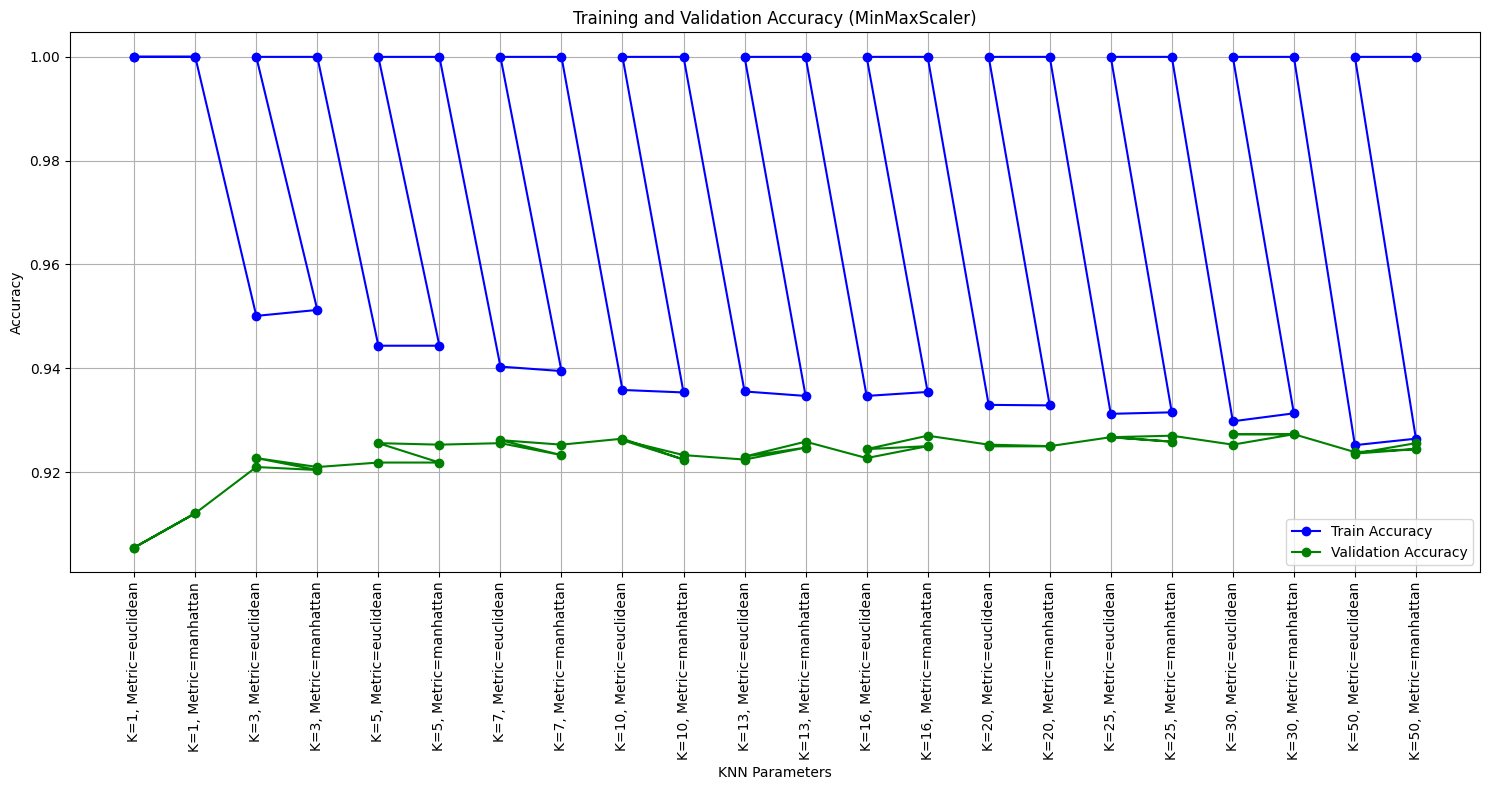

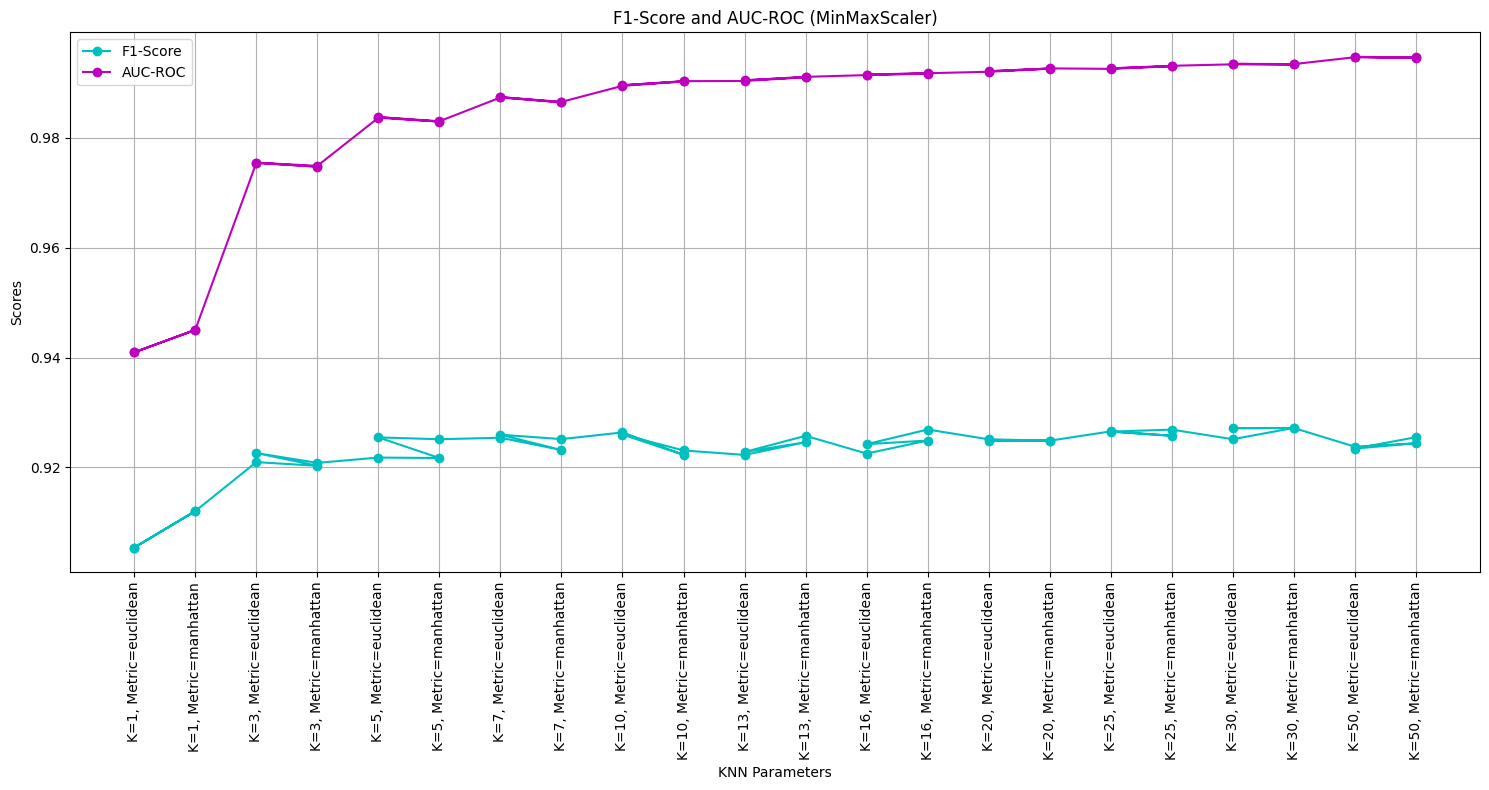

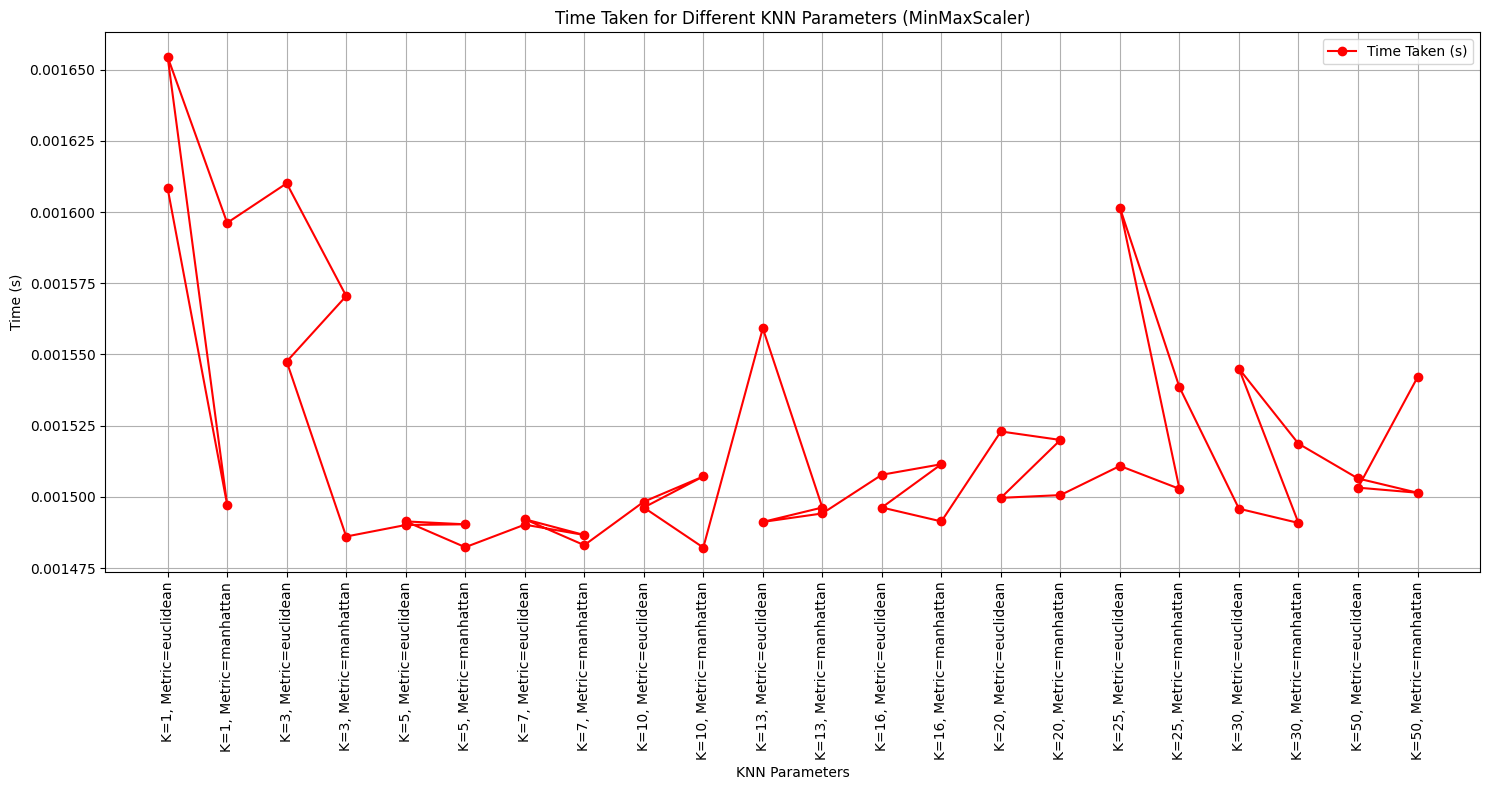

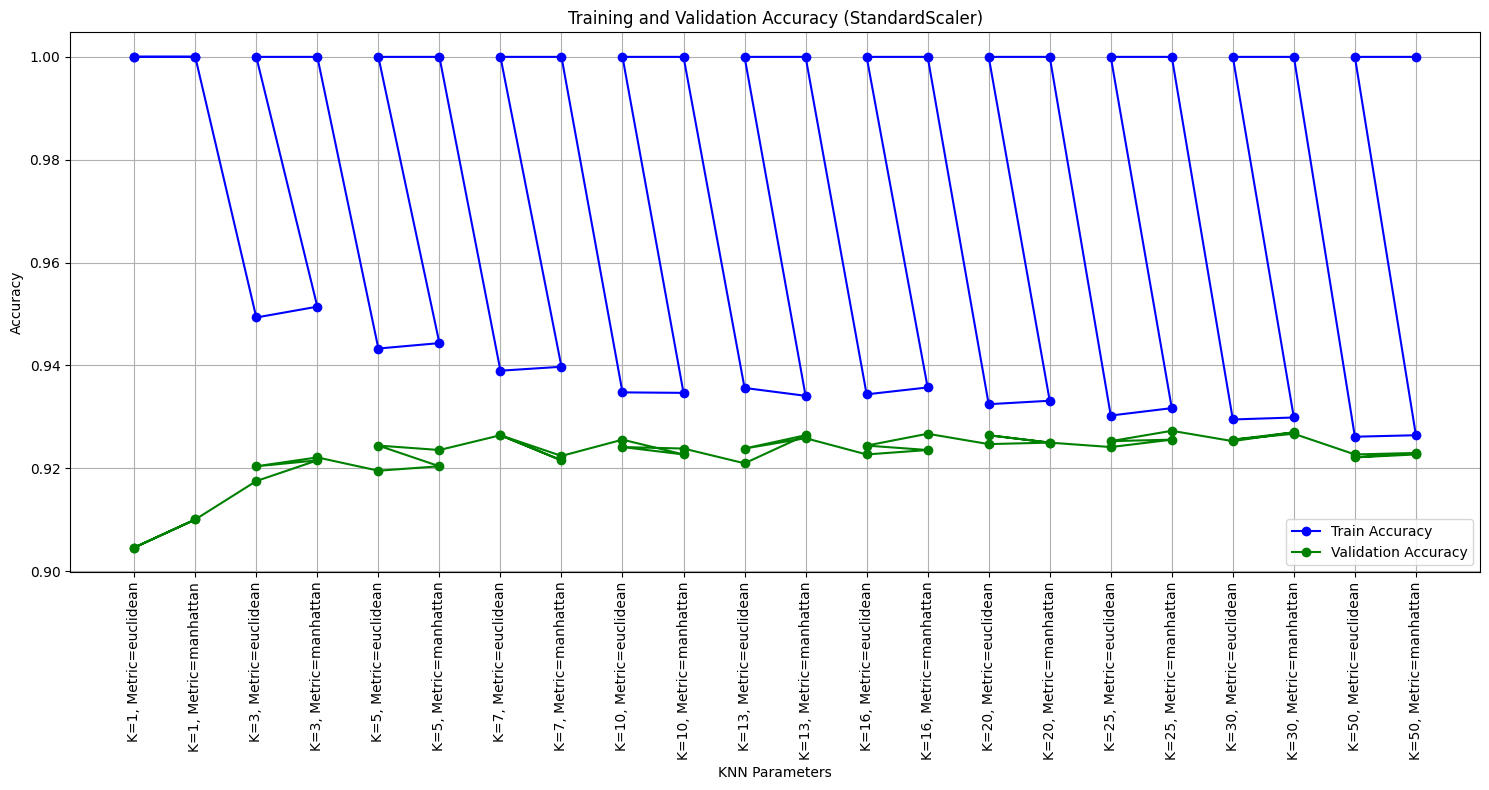

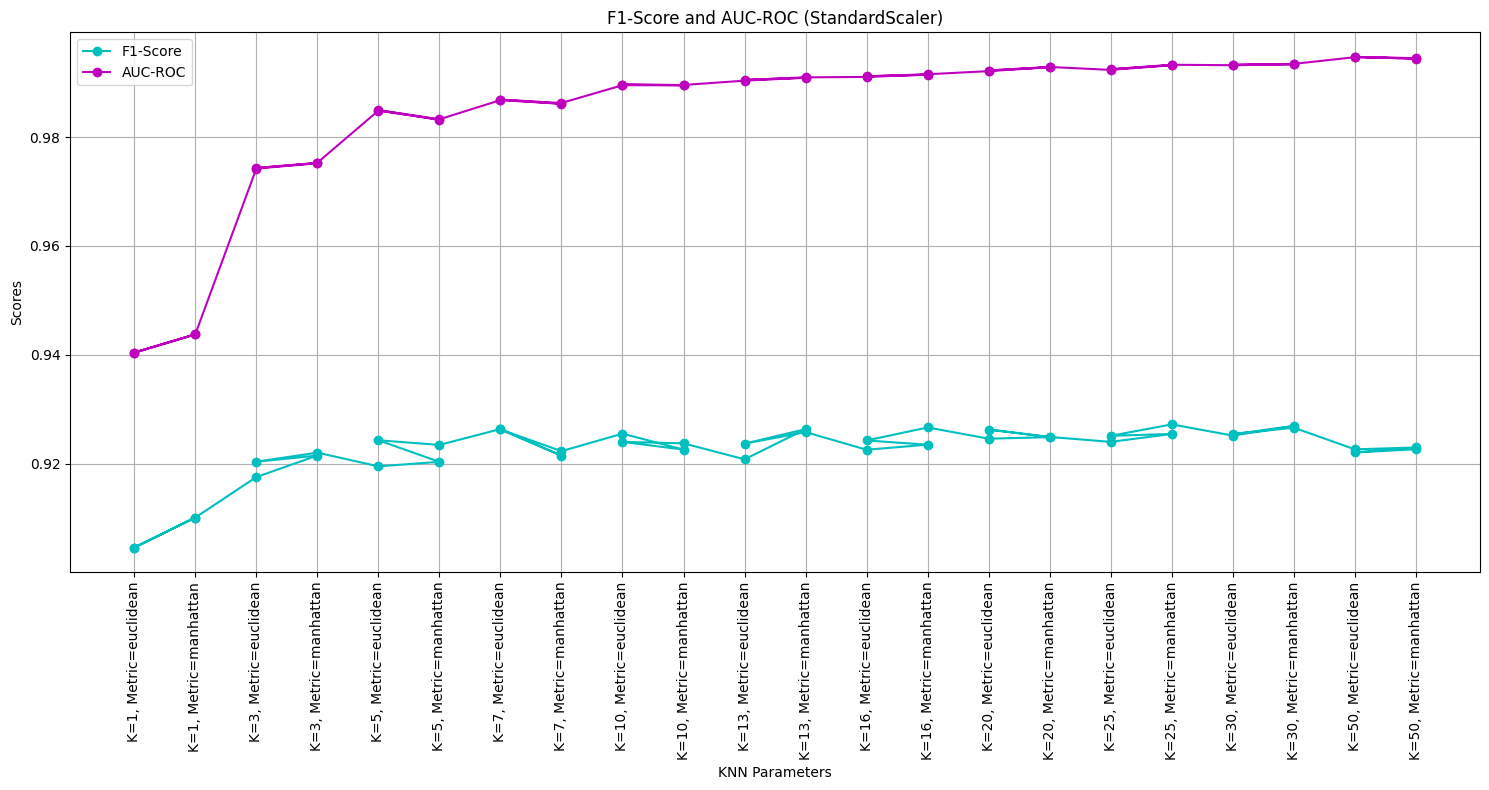

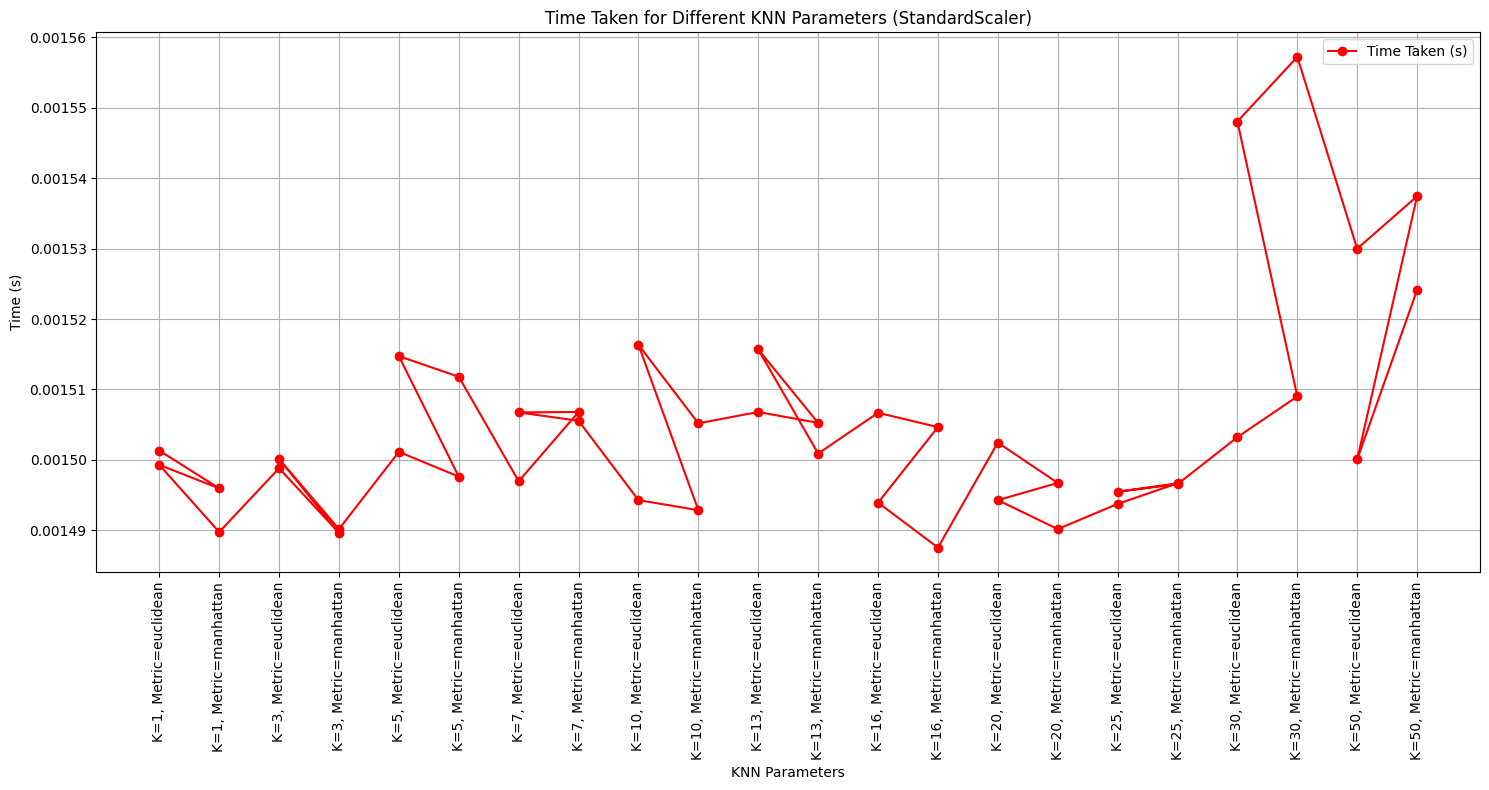

In [118]:
minmax_results = results_df[results_df['Scaler'] == 'MinMaxScaler']
standard_results = results_df[results_df['Scaler'] == 'StandardScaler']


def visualize_knn_results(results, scaler_name):
    
    labels = [f"K={row['K']}, Metric={row['Metric']}" for _, row in results.iterrows()]
    
    
    plt.figure(figsize=(15, 8))
    plt.plot(labels, results['Train Accuracy'], label='Train Accuracy', marker='o', linestyle='-', color='b')
    plt.plot(labels, results['Validation Accuracy'], label='Validation Accuracy', marker='o', linestyle='-', color='g')
    plt.xticks(rotation=90)
    plt.xlabel('KNN Parameters')
    plt.ylabel('Accuracy')
    plt.title(f'Training and Validation Accuracy ({scaler_name})')
    plt.legend()
    plt.tight_layout()
    plt.grid(True)
    plt.show()
    
    
    plt.figure(figsize=(15, 8))
    plt.plot(labels, results['F1-Score'], label='F1-Score', marker='o', linestyle='-', color='c')
    plt.plot(labels, results['AUC-ROC'], label='AUC-ROC', marker='o', linestyle='-', color='m')
    plt.xticks(rotation=90)
    plt.xlabel('KNN Parameters')
    plt.ylabel('Scores')
    plt.title(f'F1-Score and AUC-ROC ({scaler_name})')
    plt.legend()
    plt.tight_layout()
    plt.grid(True)
    plt.show()

    
    plt.figure(figsize=(15, 8))
    plt.plot(labels, results['Time Taken'], label='Time Taken (s)', marker='o', linestyle='-', color='r')
    plt.xticks(rotation=90)
    plt.xlabel('KNN Parameters')
    plt.ylabel('Time (s)')
    plt.title(f'Time Taken for Different KNN Parameters ({scaler_name})')
    plt.legend()
    plt.tight_layout()
    plt.grid(True)
    plt.show()


visualize_knn_results(minmax_results, "MinMaxScaler")


visualize_knn_results(standard_results, "StandardScaler")

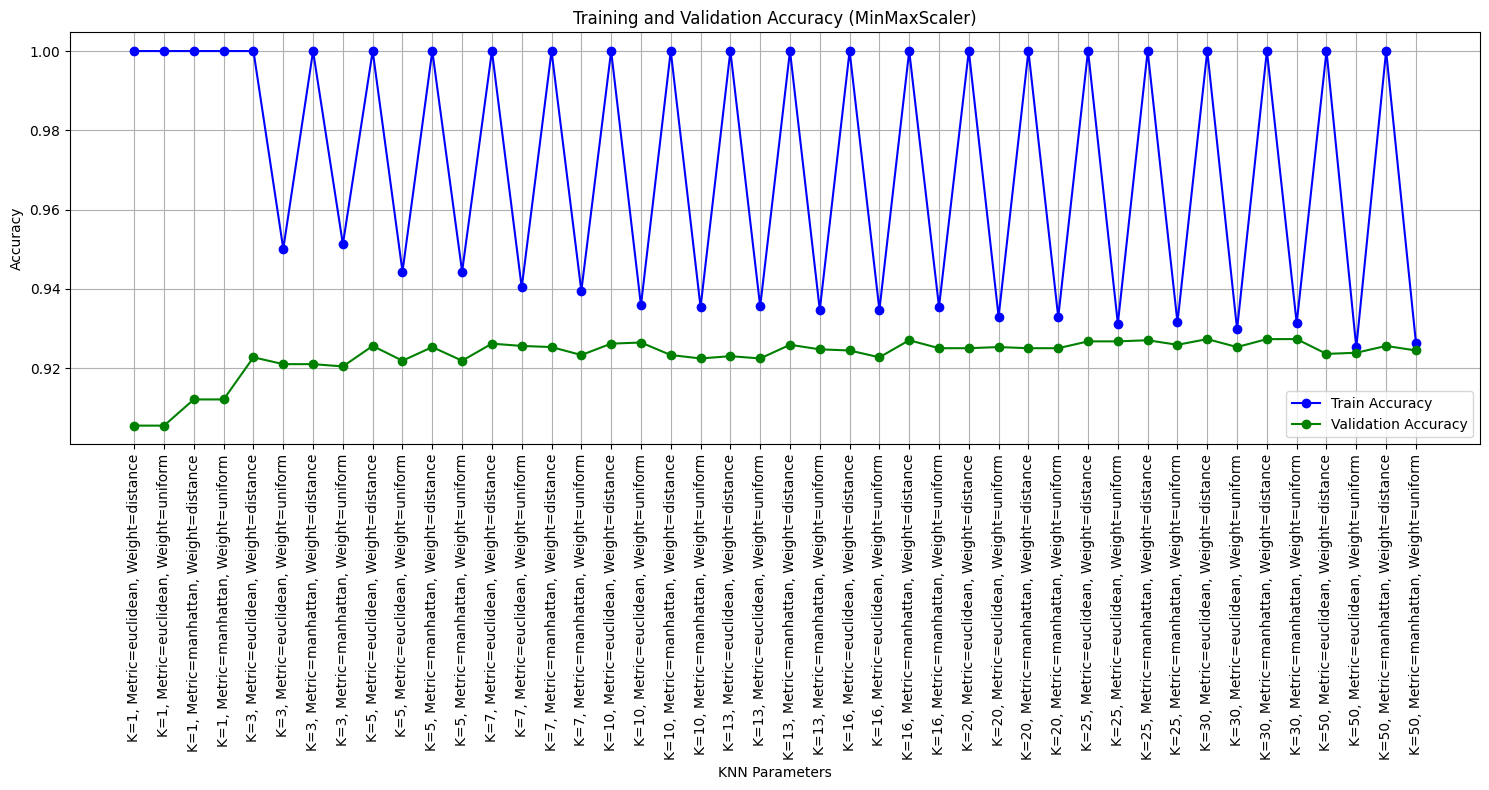

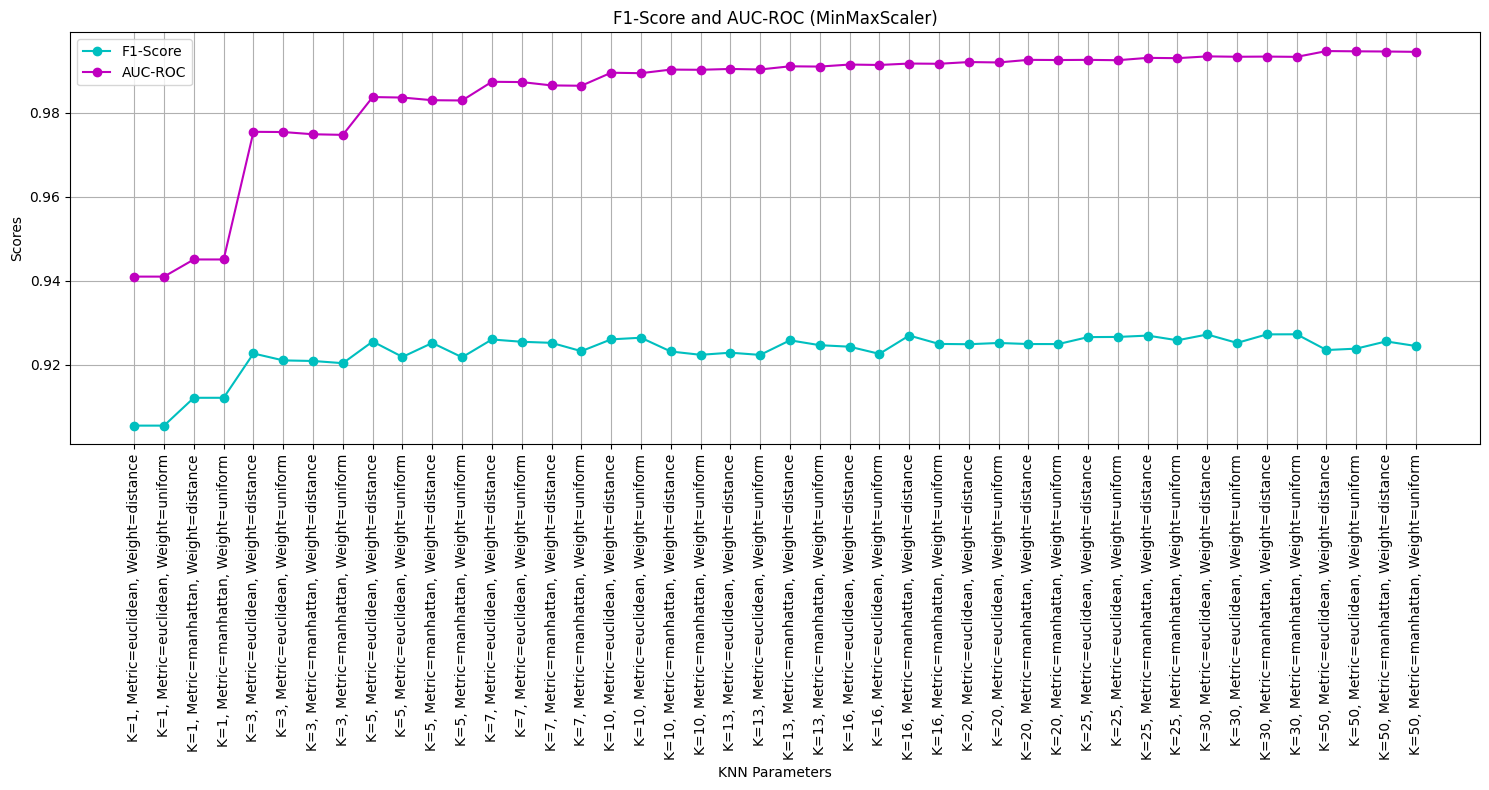

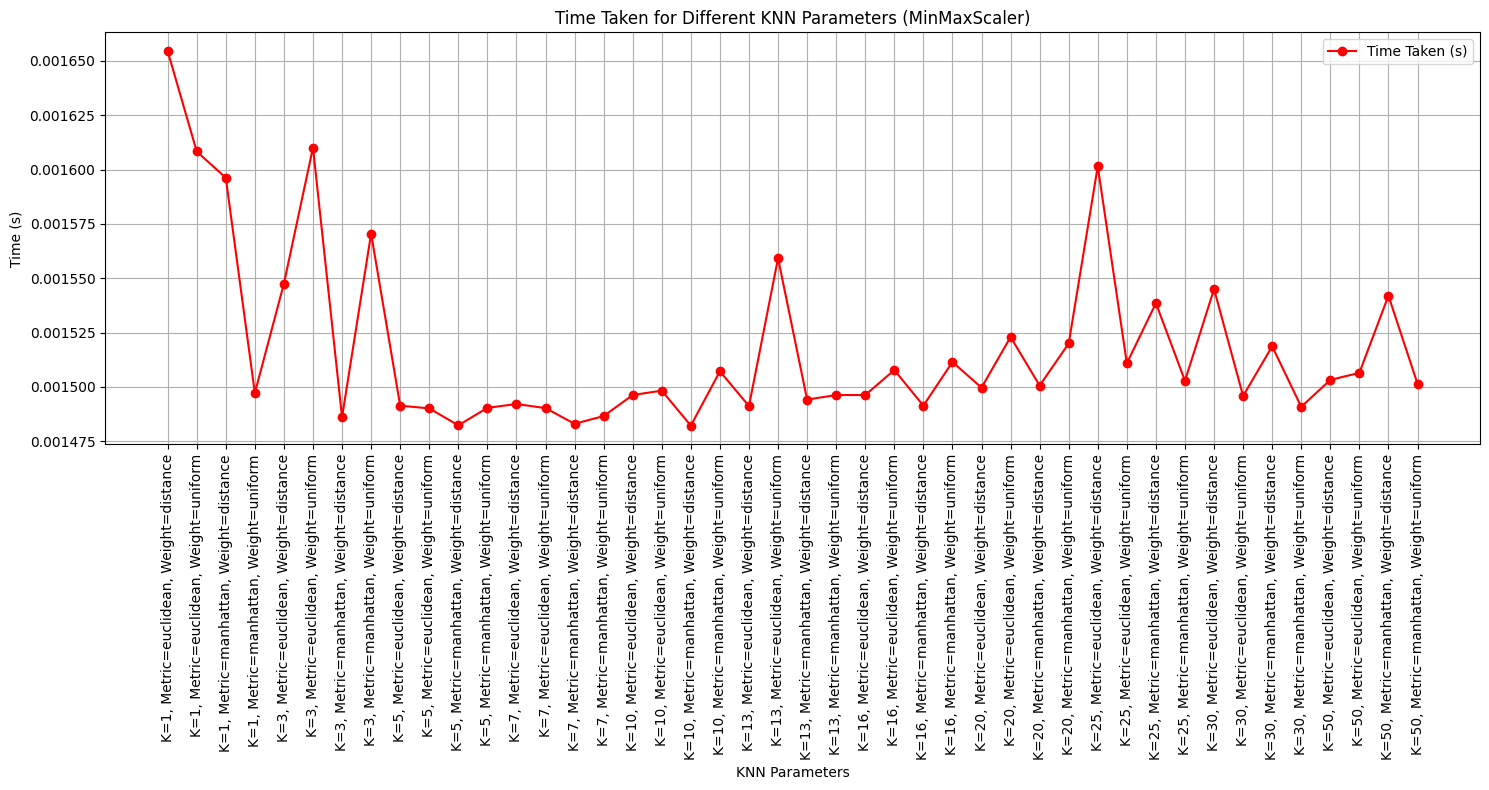

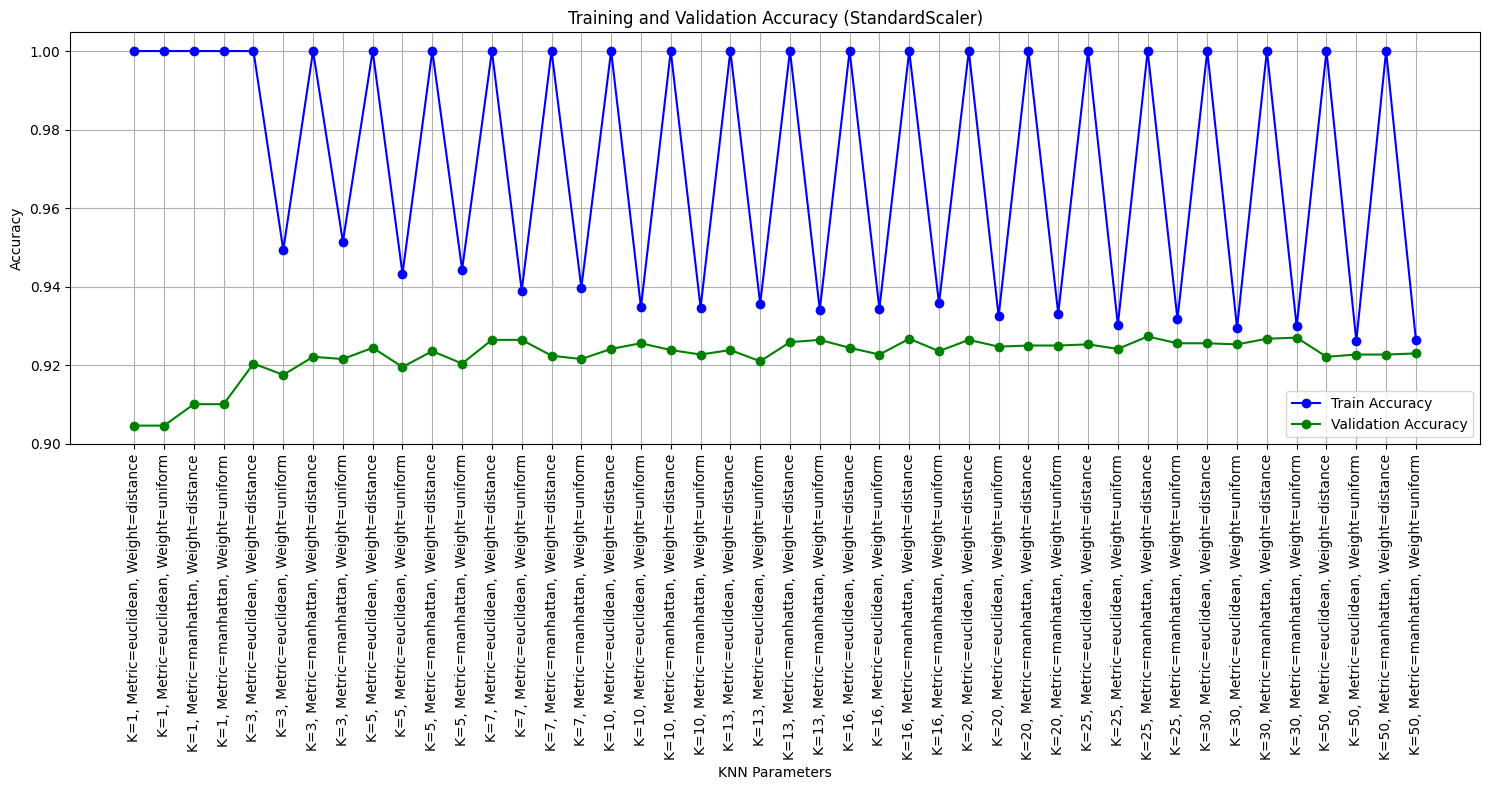

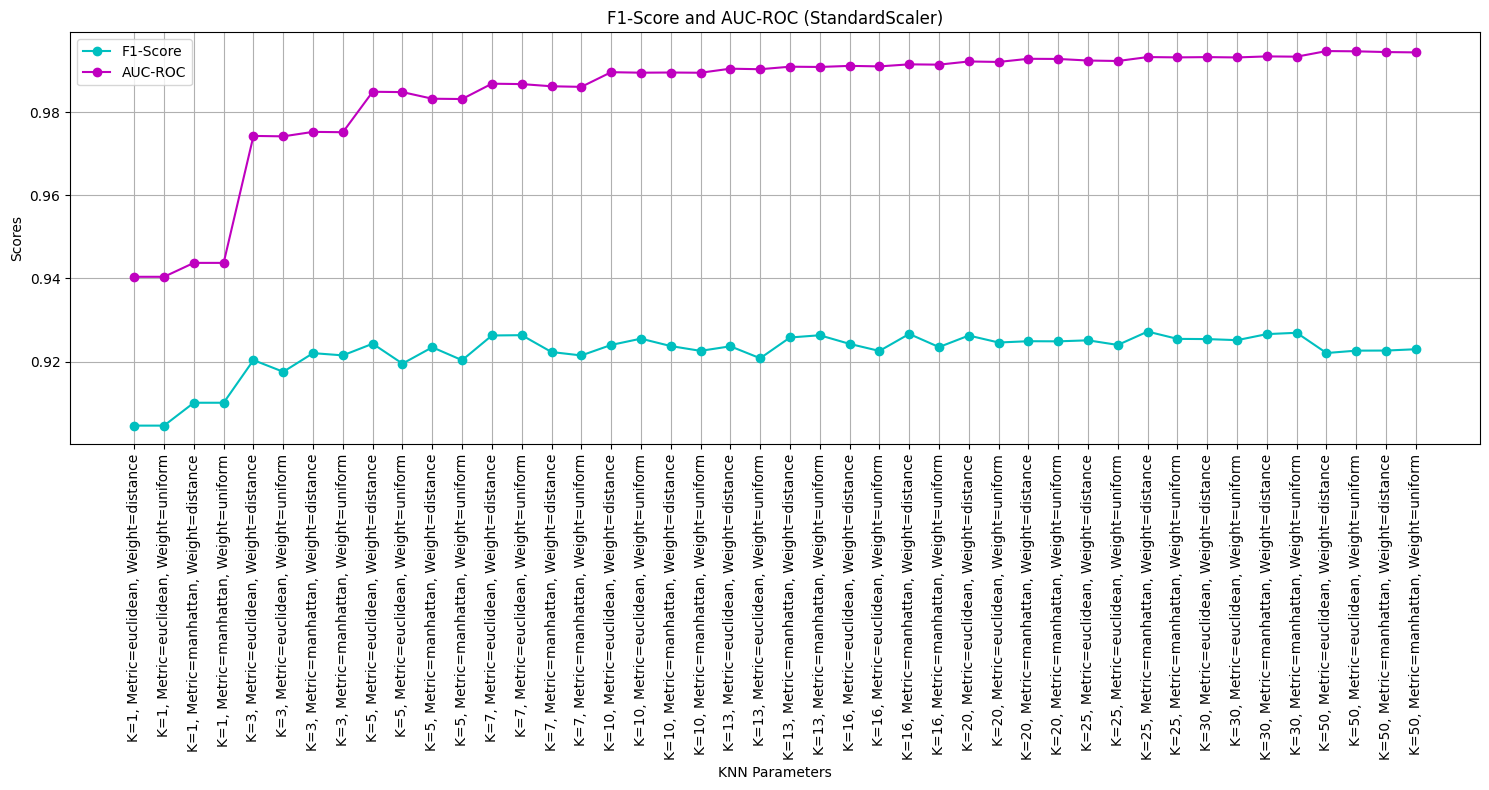

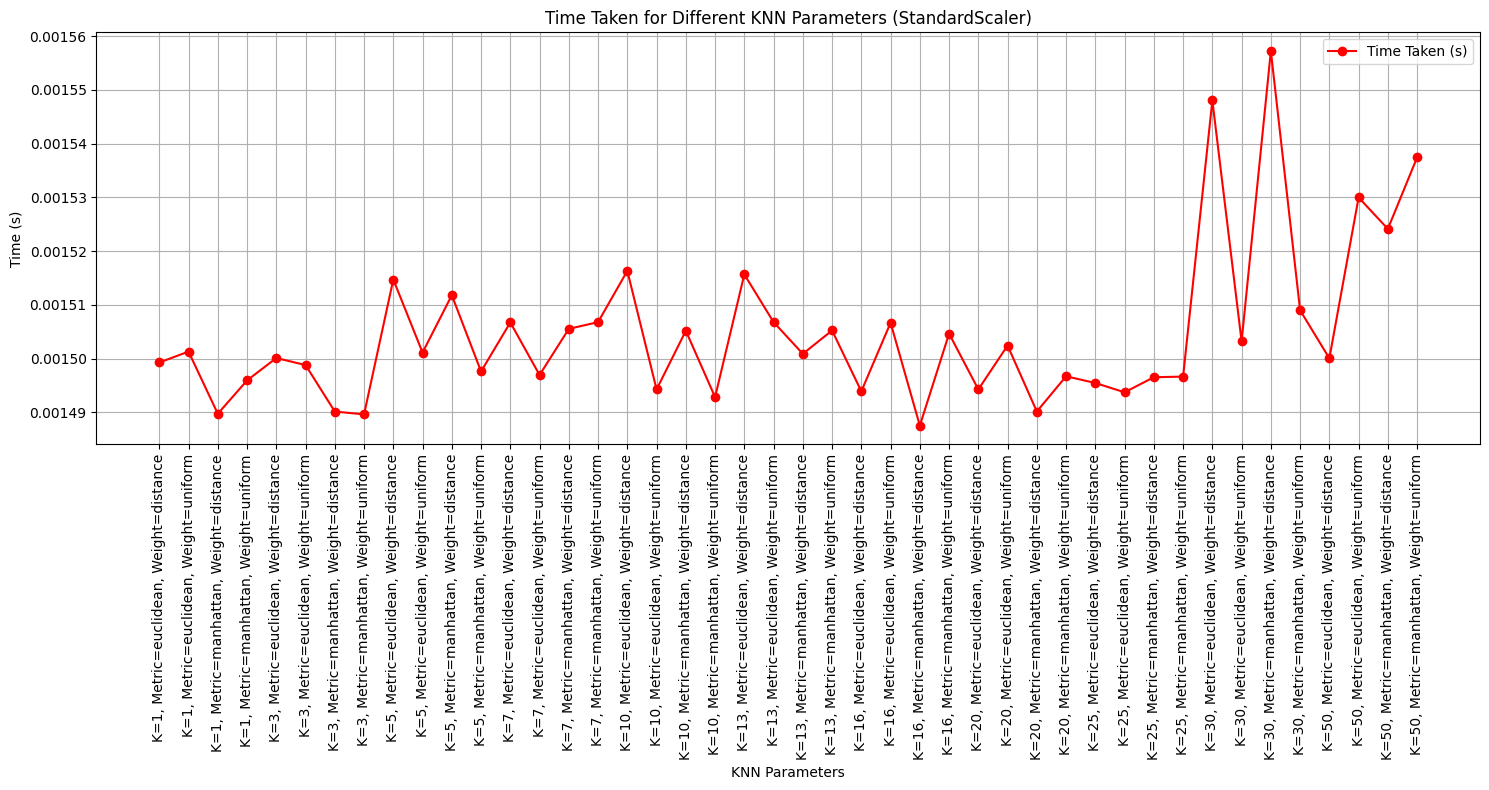

In [127]:

def visualize_knn_results_fixed(results, scaler_name):
  
    grouped_results = (
        results.groupby(['K', 'Metric', 'Weight'])
        .mean(numeric_only=True)  
        .reset_index()
    )

    
    labels = [
        f"K={row['K']}, Metric={row['Metric']}, Weight={row['Weight']}"
        for _, row in grouped_results.iterrows()
    ]

    
    plt.figure(figsize=(15, 8))
    plt.plot(labels, grouped_results['Train Accuracy'], label='Train Accuracy', marker='o', linestyle='-', color='b')
    plt.plot(labels, grouped_results['Validation Accuracy'], label='Validation Accuracy', marker='o', linestyle='-', color='g')
    plt.xticks(rotation=90)
    plt.xlabel('KNN Parameters')
    plt.ylabel('Accuracy')
    plt.title(f'Training and Validation Accuracy ({scaler_name})')
    plt.legend()
    plt.tight_layout()
    plt.grid(True)
    plt.show()
    
    
    plt.figure(figsize=(15, 8))
    plt.plot(labels, grouped_results['F1-Score'], label='F1-Score', marker='o', linestyle='-', color='c')
    plt.plot(labels, grouped_results['AUC-ROC'], label='AUC-ROC', marker='o', linestyle='-', color='m')
    plt.xticks(rotation=90)
    plt.xlabel('KNN Parameters')
    plt.ylabel('Scores')
    plt.title(f'F1-Score and AUC-ROC ({scaler_name})')
    plt.legend()
    plt.tight_layout()
    plt.grid(True)
    plt.show()

    
    plt.figure(figsize=(15, 8))
    plt.plot(labels, grouped_results['Time Taken'], label='Time Taken (s)', marker='o', linestyle='-', color='r')
    plt.xticks(rotation=90)
    plt.xlabel('KNN Parameters')
    plt.ylabel('Time (s)')
    plt.title(f'Time Taken for Different KNN Parameters ({scaler_name})')
    plt.legend()
    plt.tight_layout()
    plt.grid(True)
    plt.show()


minmax_results = results_df[results_df['Scaler'] == 'MinMaxScaler']
standard_results = results_df[results_df['Scaler'] == 'StandardScaler']


visualize_knn_results_fixed(minmax_results, "MinMaxScaler")


visualize_knn_results_fixed(standard_results, "StandardScaler")

Random Forest

In [128]:
from sklearn.ensemble import RandomForestClassifier

In [129]:

# Parameters
kf = KFold(n_splits=4, shuffle=True, random_state=42)
n_estimators = [2, 3, 5, 7, 10, 25, 50, 100]
max_depths = [None, 2, 3, 4, 5, 10, 20]  
scalers = {
    "MinMaxScaler": MinMaxScaler(),
    "StandardScaler": StandardScaler()
}


mi_scores = mutual_info_classif(X_train_final, y_train_final, random_state=42)
top_features_count = 100
feature_indices = np.argsort(mi_scores)[-top_features_count:]
X_train_reduced = X_train_final[:, feature_indices]
X_test_reduced = X_test_final[:, feature_indices]


pca_components = 4
pca = PCA(n_components=pca_components)
X_train_pca = pca.fit_transform(X_train_reduced)
X_test_pca = pca.transform(X_test_reduced)


results = []


for scaler_name, scaler in scalers.items():
    X_train_scaled = scaler.fit_transform(X_train_pca)
    X_test_scaled = scaler.transform(X_test_pca)
    
    print(f"\nTesting RandomForest with {scaler_name} (PCA={pca_components}, Features={top_features_count})")
    
    for n in n_estimators:
        for depth in max_depths:
            print(f"Testing RandomForest with n_estimators={n}, max_depth={depth}")
            
            rf = RandomForestClassifier(n_estimators=n, max_depth=depth, random_state=42, n_jobs=-1)
            
            train_accuracies = []
            val_accuracies = []
            f1_scores = []
            roc_aucs = []
            times_taken = []
            
            for train_index, val_index in kf.split(X_train_scaled):
                X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
                y_train_fold, y_val_fold = y_train_final[train_index], y_train_final[val_index]
                
                start_time = time.time()
                rf.fit(X_train_fold, y_train_fold)
                time_taken = time.time() - start_time
                times_taken.append(time_taken)
                
                y_train_pred = rf.predict(X_train_fold)
                y_val_pred = rf.predict(X_val_fold)
                
                
                train_accuracies.append(accuracy_score(y_train_fold, y_train_pred))
                val_accuracies.append(accuracy_score(y_val_fold, y_val_pred))
                f1_scores.append(f1_score(y_val_fold, y_val_pred, average='weighted'))

                
                if len(np.unique(y_train_final)) > 2:
                    y_val_prob = rf.predict_proba(X_val_fold)
                    roc_aucs.append(roc_auc_score(
                        label_binarize(y_val_fold, classes=np.unique(y_train_final)), y_val_prob, multi_class='ovr'
                    ))
                else:
                    roc_aucs.append(roc_auc_score(y_val_fold, rf.predict_proba(X_val_fold)[:, 1]))
            
            # Averages
            avg_train_accuracy = np.mean(train_accuracies)
            avg_val_accuracy = np.mean(val_accuracies)
            avg_f1_score = np.mean(f1_scores)
            avg_roc_auc = np.mean(roc_aucs)
            avg_time_taken = np.mean(times_taken)
            
            print(f"n_estimators={n}, max_depth={depth} -> "
                  f"Train Accuracy: {avg_train_accuracy:.4f}, "
                  f"Validation Accuracy: {avg_val_accuracy:.4f}, "
                  f"F1-Score: {avg_f1_score:.4f}, "
                  f"AUC-ROC: {avg_roc_auc:.4f}, "
                  f"Time Taken: {avg_time_taken:.4f} seconds\n")
            
            
            results.append({
                "Scaler": scaler_name,
                "N_Estimators": n,
                "Max_Depth": depth,
                "Train Accuracy": avg_train_accuracy,
                "Validation Accuracy": avg_val_accuracy,
                "F1-Score": avg_f1_score,
                "AUC-ROC": avg_roc_auc,
                "Time Taken": avg_time_taken
            })


results_df = pd.DataFrame(results)


print("\nAll RandomForest Classification Results:")
print(results_df)


Testing RandomForest with MinMaxScaler (PCA=4, Features=100)
Testing RandomForest with n_estimators=2, max_depth=None
n_estimators=2, max_depth=None -> Train Accuracy: 0.9634, Validation Accuracy: 0.8917, F1-Score: 0.8921, AUC-ROC: 0.9612, Time Taken: 0.0156 seconds

Testing RandomForest with n_estimators=2, max_depth=2
n_estimators=2, max_depth=2 -> Train Accuracy: 0.7727, Validation Accuracy: 0.7672, F1-Score: 0.7226, AUC-ROC: 0.9213, Time Taken: 0.0085 seconds

Testing RandomForest with n_estimators=2, max_depth=3
n_estimators=2, max_depth=3 -> Train Accuracy: 0.8827, Validation Accuracy: 0.8759, F1-Score: 0.8770, AUC-ROC: 0.9607, Time Taken: 0.0039 seconds

Testing RandomForest with n_estimators=2, max_depth=4
n_estimators=2, max_depth=4 -> Train Accuracy: 0.8876, Validation Accuracy: 0.8779, F1-Score: 0.8793, AUC-ROC: 0.9734, Time Taken: 0.0041 seconds

Testing RandomForest with n_estimators=2, max_depth=5
n_estimators=2, max_depth=5 -> Train Accuracy: 0.9288, Validation Accuracy

n_estimators=25, max_depth=10 -> Train Accuracy: 0.9931, Validation Accuracy: 0.9224, F1-Score: 0.9223, AUC-ROC: 0.9929, Time Taken: 0.0235 seconds

Testing RandomForest with n_estimators=25, max_depth=20
n_estimators=25, max_depth=20 -> Train Accuracy: 0.9996, Validation Accuracy: 0.9250, F1-Score: 0.9249, AUC-ROC: 0.9912, Time Taken: 0.0235 seconds

Testing RandomForest with n_estimators=50, max_depth=None
n_estimators=50, max_depth=None -> Train Accuracy: 0.9996, Validation Accuracy: 0.9256, F1-Score: 0.9255, AUC-ROC: 0.9918, Time Taken: 0.0435 seconds

Testing RandomForest with n_estimators=50, max_depth=2
n_estimators=50, max_depth=2 -> Train Accuracy: 0.9149, Validation Accuracy: 0.9083, F1-Score: 0.9084, AUC-ROC: 0.9841, Time Taken: 0.0326 seconds

Testing RandomForest with n_estimators=50, max_depth=3
n_estimators=50, max_depth=3 -> Train Accuracy: 0.9294, Validation Accuracy: 0.9216, F1-Score: 0.9215, AUC-ROC: 0.9912, Time Taken: 0.0344 seconds

Testing RandomForest with n_est

n_estimators=7, max_depth=5 -> Train Accuracy: 0.9349, Validation Accuracy: 0.9198, F1-Score: 0.9200, AUC-ROC: 0.9921, Time Taken: 0.0080 seconds

Testing RandomForest with n_estimators=7, max_depth=10
n_estimators=7, max_depth=10 -> Train Accuracy: 0.9830, Validation Accuracy: 0.9147, F1-Score: 0.9146, AUC-ROC: 0.9870, Time Taken: 0.0087 seconds

Testing RandomForest with n_estimators=7, max_depth=20
n_estimators=7, max_depth=20 -> Train Accuracy: 0.9932, Validation Accuracy: 0.9170, F1-Score: 0.9169, AUC-ROC: 0.9835, Time Taken: 0.0088 seconds

Testing RandomForest with n_estimators=10, max_depth=None
n_estimators=10, max_depth=None -> Train Accuracy: 0.9966, Validation Accuracy: 0.9184, F1-Score: 0.9184, AUC-ROC: 0.9868, Time Taken: 0.0113 seconds

Testing RandomForest with n_estimators=10, max_depth=2
n_estimators=10, max_depth=2 -> Train Accuracy: 0.9128, Validation Accuracy: 0.9089, F1-Score: 0.9090, AUC-ROC: 0.9799, Time Taken: 0.0085 seconds

Testing RandomForest with n_estimat

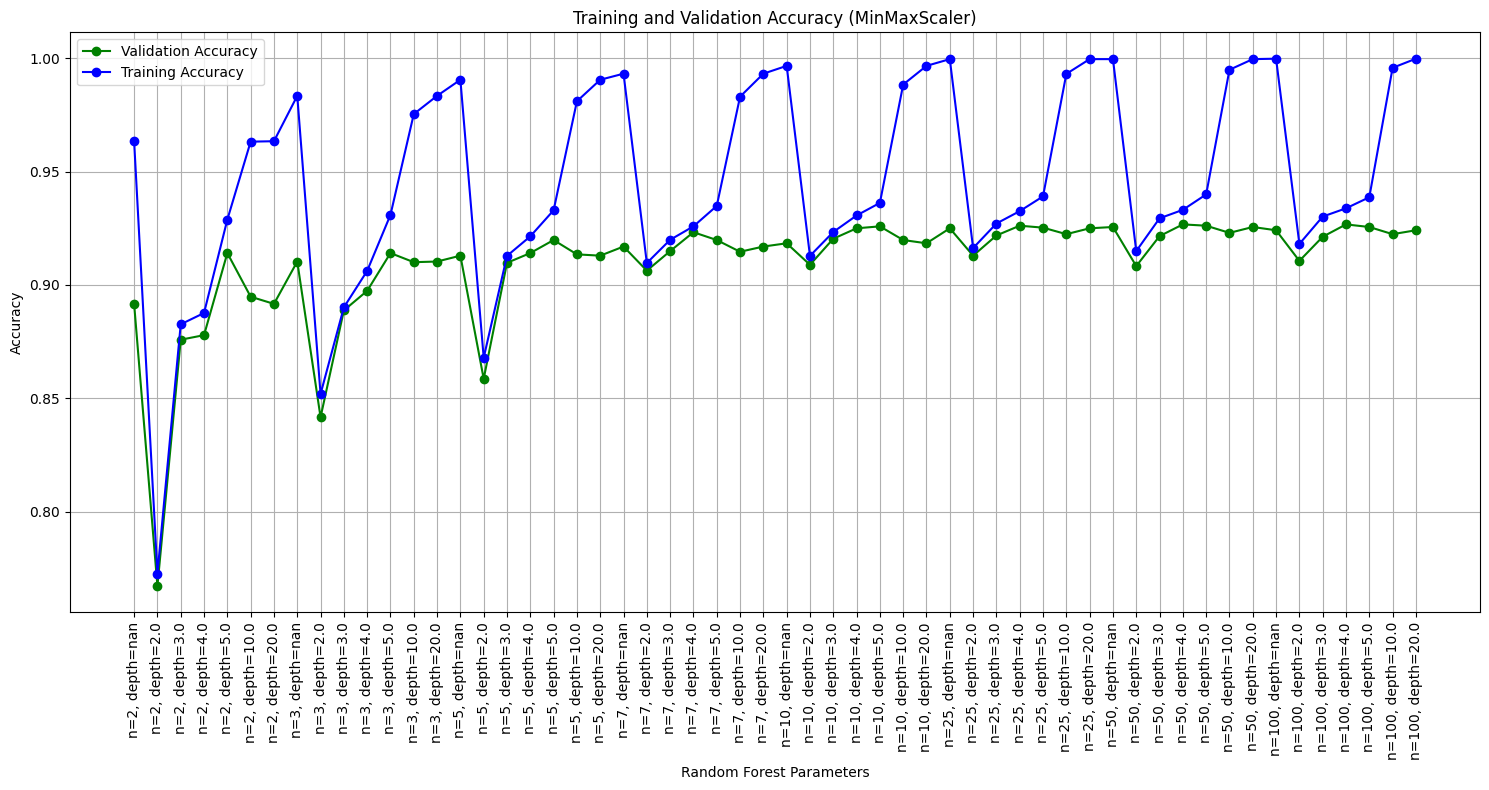

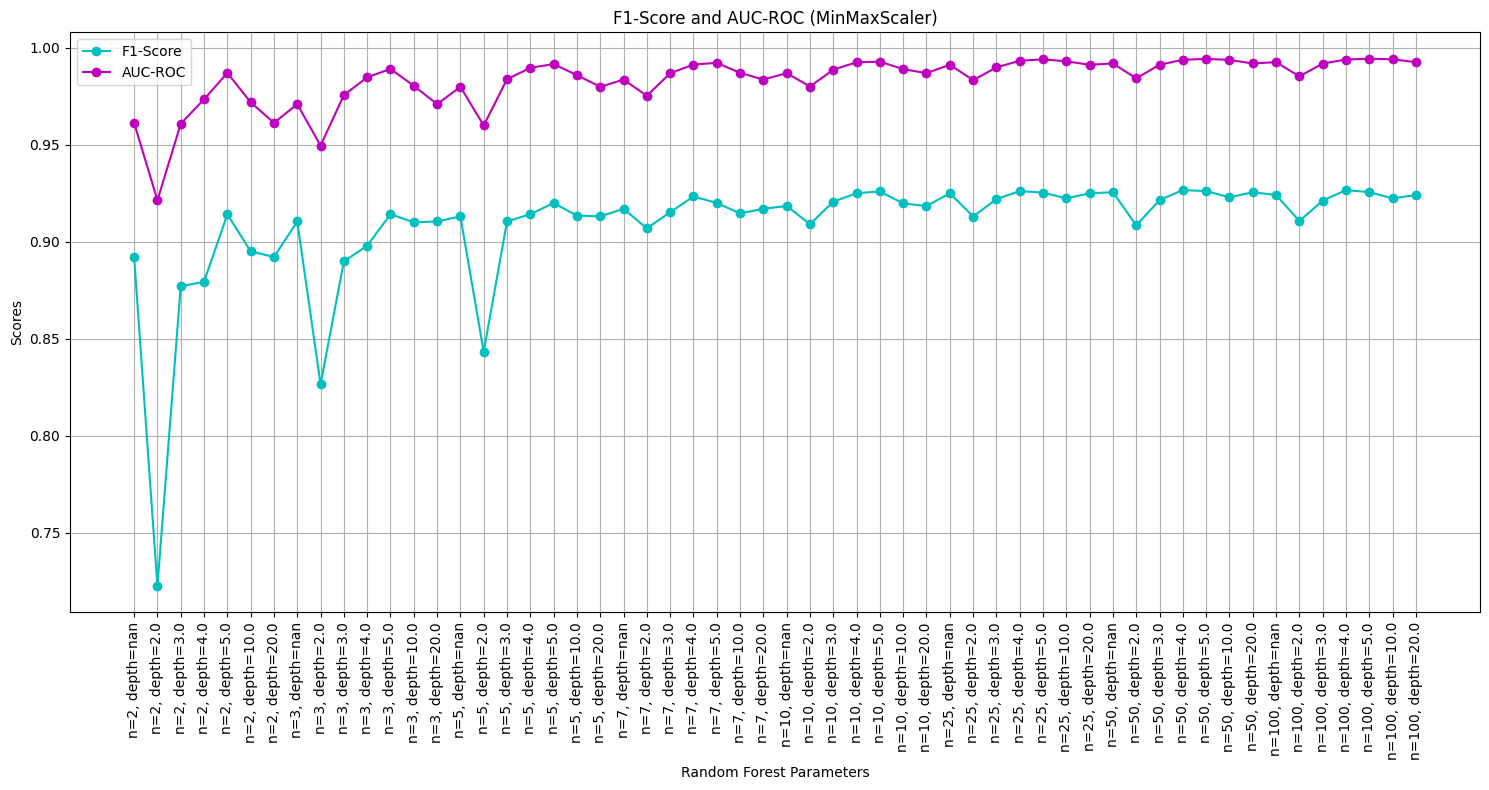

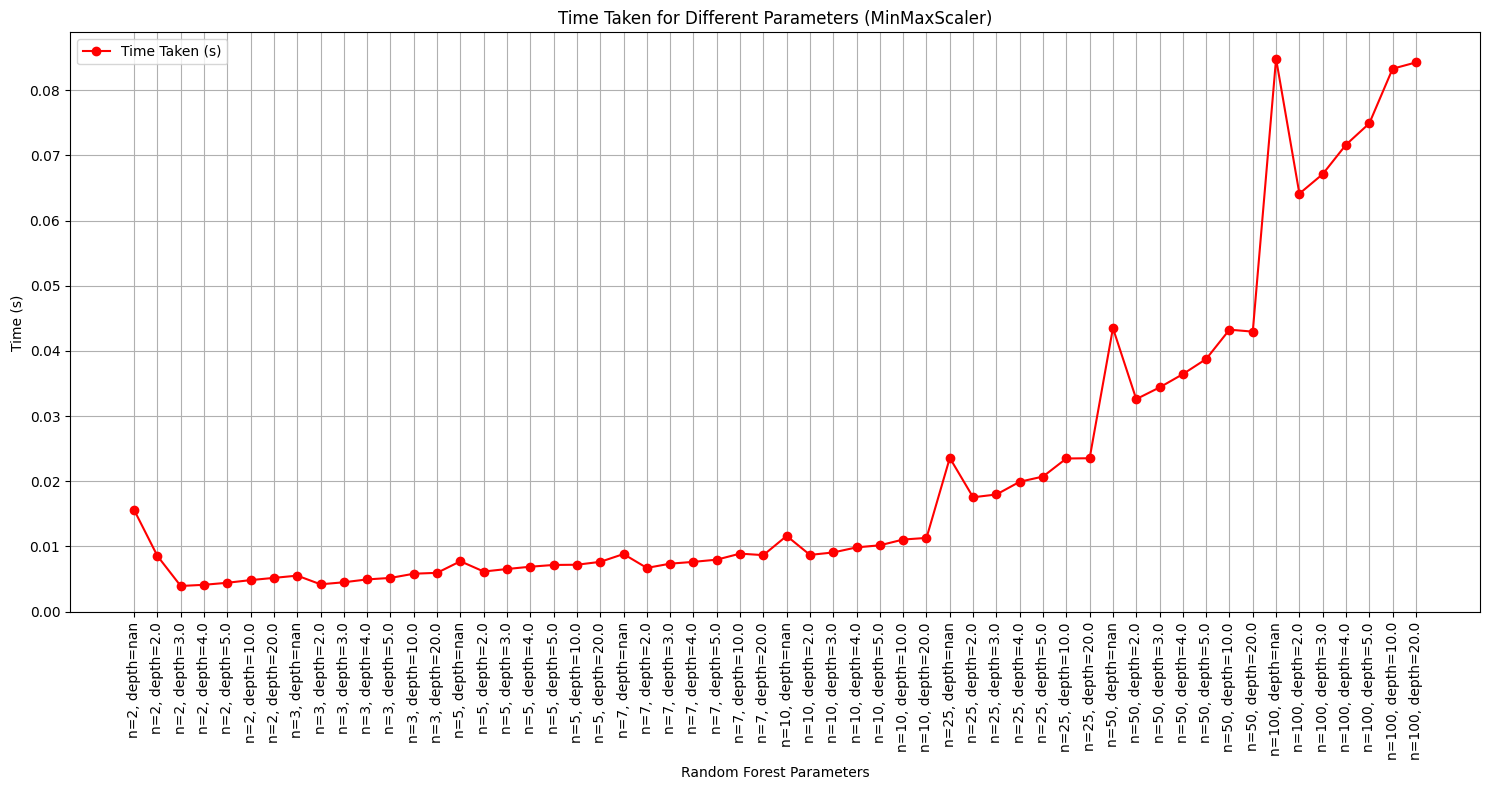

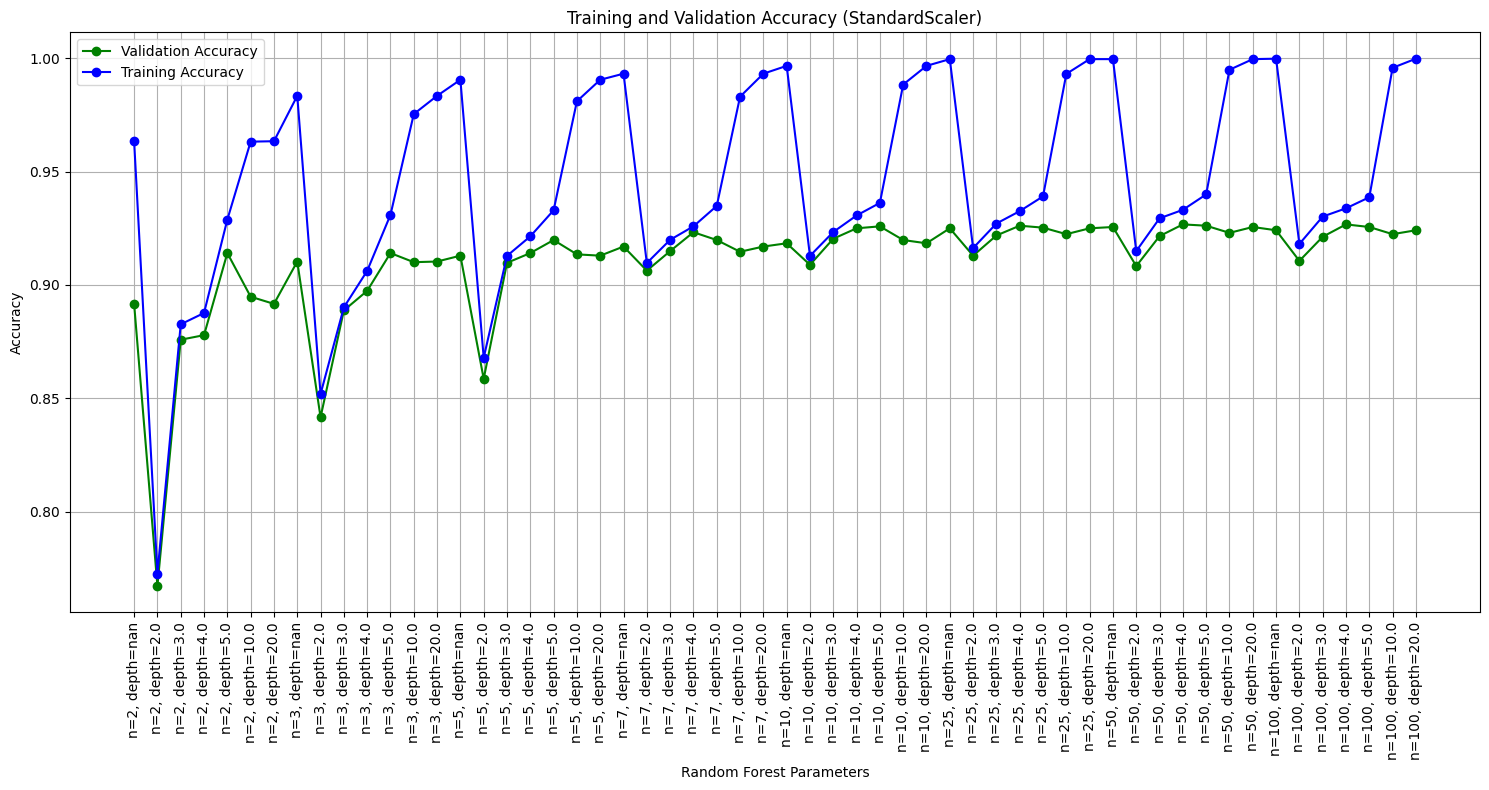

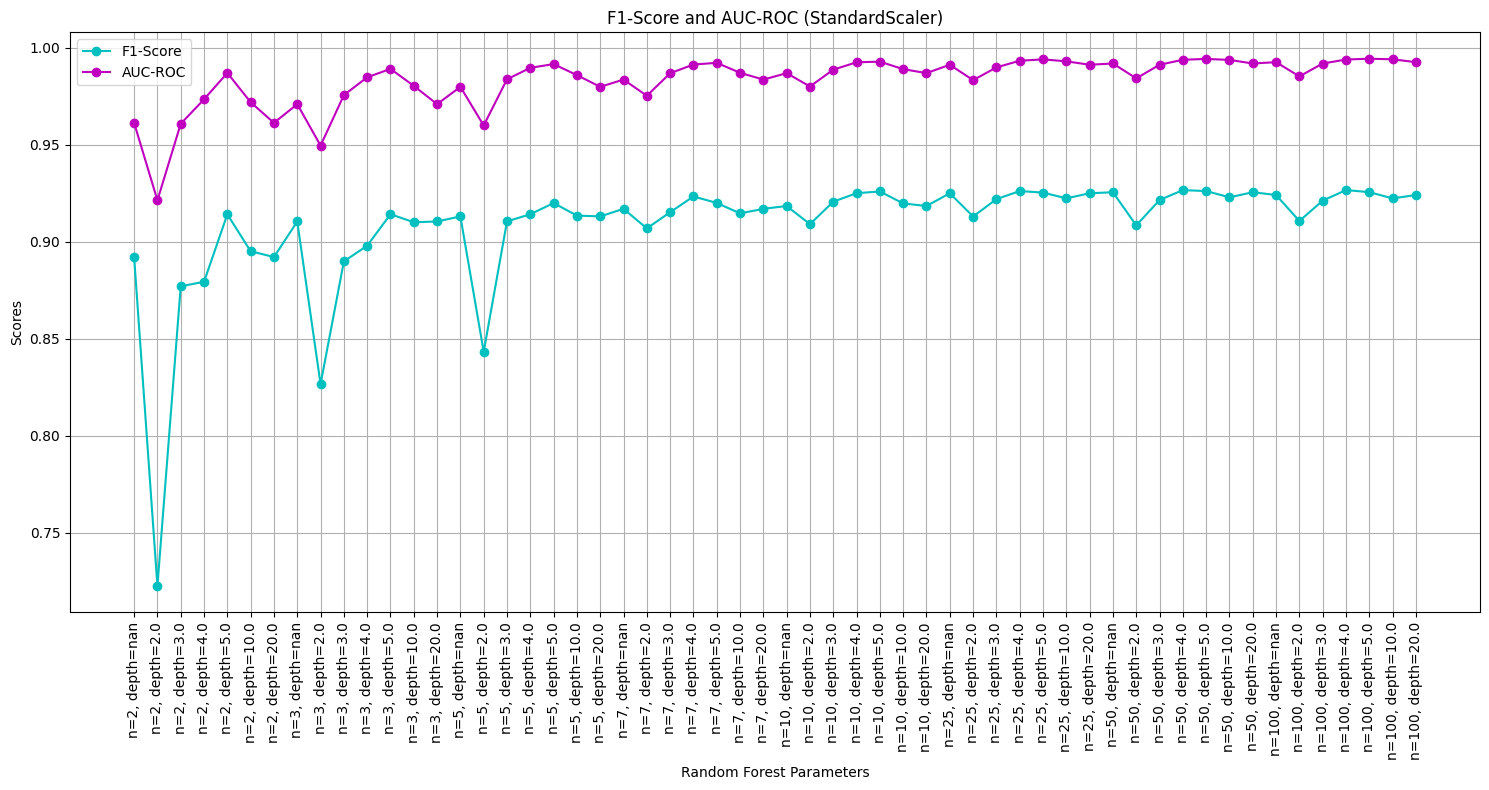

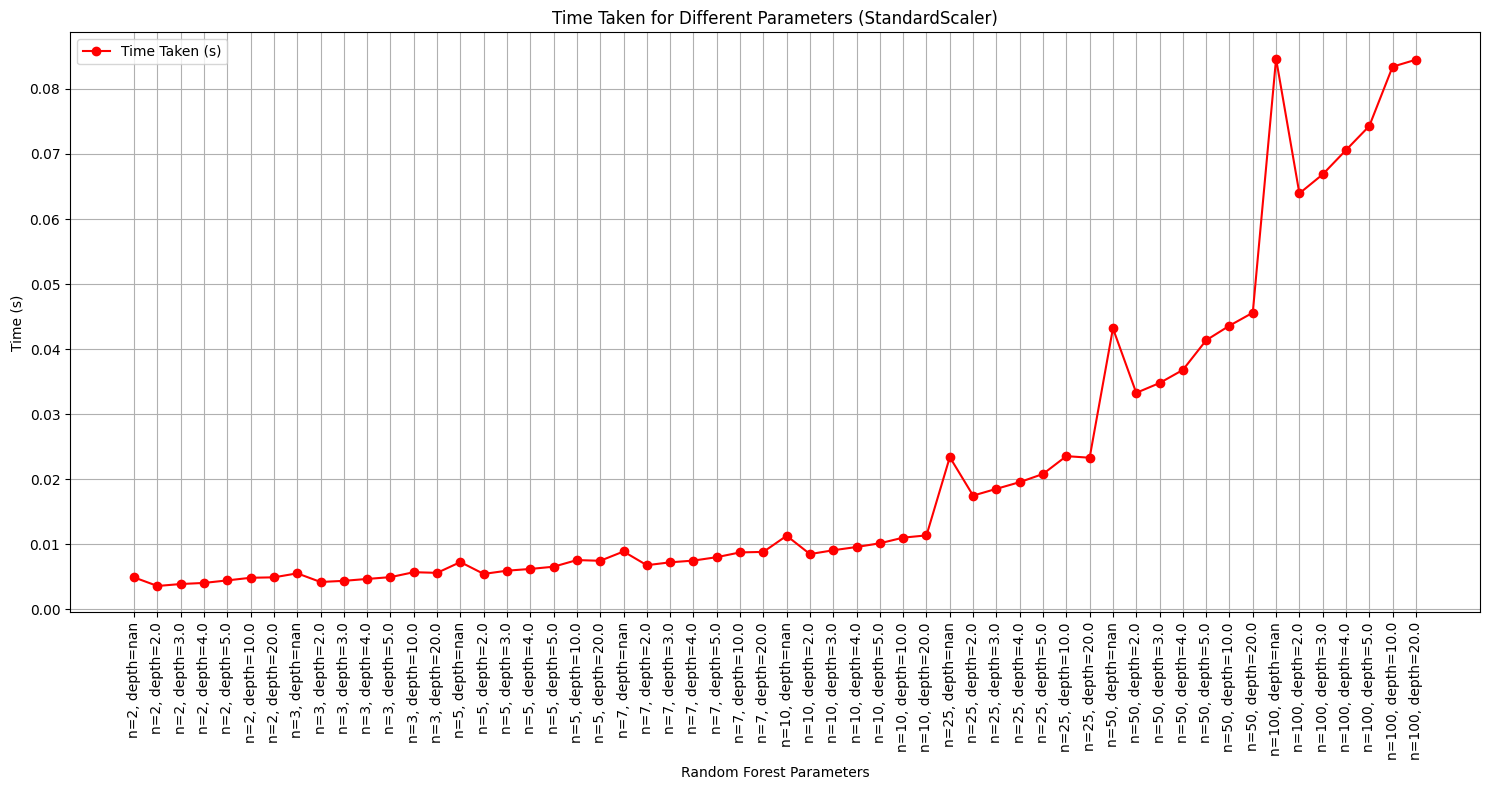

In [131]:

def visualize_rf_results_simple(results, scaler_name):
    
    labels = [
        f"n={row['N_Estimators']}, depth={row['Max_Depth']}"
        for _, row in results.iterrows()
    ]

    
    plt.figure(figsize=(15, 8))
    plt.plot(labels, results['Validation Accuracy'], label='Validation Accuracy', marker='o', color='g')
    plt.plot(labels, results['Train Accuracy'], label='Training Accuracy', marker='o', color='b')
    plt.xticks(rotation=90)
    plt.xlabel('Random Forest Parameters')
    plt.ylabel('Accuracy')
    plt.title(f'Training and Validation Accuracy ({scaler_name})')
    plt.legend()
    plt.tight_layout()
    plt.grid(True)
    plt.show()

    
    plt.figure(figsize=(15, 8))
    plt.plot(labels, results['F1-Score'], label='F1-Score', marker='o', color='c')
    plt.plot(labels, results['AUC-ROC'], label='AUC-ROC', marker='o', color='m')
    plt.xticks(rotation=90)
    plt.xlabel('Random Forest Parameters')
    plt.ylabel('Scores')
    plt.title(f'F1-Score and AUC-ROC ({scaler_name})')
    plt.legend()
    plt.tight_layout()
    plt.grid(True)
    plt.show()

   
    plt.figure(figsize=(15, 8))
    plt.plot(labels, results['Time Taken'], label='Time Taken (s)', marker='o', color='r')
    plt.xticks(rotation=90)
    plt.xlabel('Random Forest Parameters')
    plt.ylabel('Time (s)')
    plt.title(f'Time Taken for Different Parameters ({scaler_name})')
    plt.legend()
    plt.tight_layout()
    plt.grid(True)
    plt.show()


minmax_results = results_df[results_df['Scaler'] == 'MinMaxScaler']
standard_results = results_df[results_df['Scaler'] == 'StandardScaler']


visualize_rf_results_simple(minmax_results, "MinMaxScaler")


visualize_rf_results_simple(standard_results, "StandardScaler")

Numerical Results for N=5, Max_Depth=5, MinMaxScaler:


Train Accuracy  Validation Accuracy  F1-Score   AUC-ROC
18         0.93295             0.919828  0.919889  0.991504

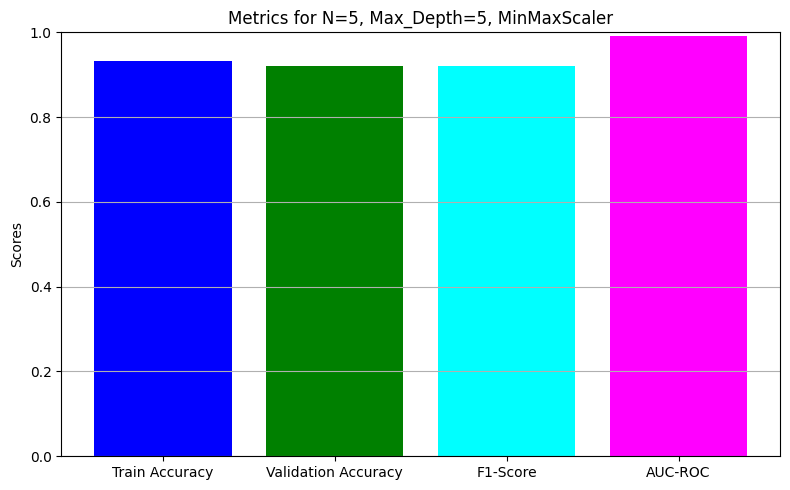

In [133]:

specific_results = results_df[
    (results_df['Scaler'] == 'MinMaxScaler') &
    (results_df['N_Estimators'] == 5) &
    (results_df['Max_Depth'] == 5)
]


if specific_results.empty:
    print("No results found for the specified parameters.")
else:
   
    print("Numerical Results for N=5, Max_Depth=5, MinMaxScaler:")
    display(specific_results[['Train Accuracy', 'Validation Accuracy', 'F1-Score', 'AUC-ROC']])
    

    metrics = ['Train Accuracy', 'Validation Accuracy', 'F1-Score', 'AUC-ROC']
    values = [
        specific_results['Train Accuracy'].values[0],
        specific_results['Validation Accuracy'].values[0],
        specific_results['F1-Score'].values[0],
        specific_results['AUC-ROC'].values[0]
    ]
    
   
    plt.figure(figsize=(8, 5))
    plt.bar(metrics, values, color=['blue', 'green', 'cyan', 'magenta'])
    plt.ylim(0, 1)
    plt.ylabel('Scores')
    plt.title('Metrics for N=5, Max_Depth=5, MinMaxScaler')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()


from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

Adaboost

In [135]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier



n_estimators_values = [5, 10, 25, 50, 100, 200]  
max_depth_values = [1, 3, 5, 7]  
scalers = {
    "MinMaxScaler": MinMaxScaler(),
    "StandardScaler": StandardScaler()
}
kf = KFold(n_splits=4, shuffle=True, random_state=42)


top_features_count = 100
mi_scores = mutual_info_classif(X_train_final, y_train_final, random_state=42)
feature_indices = np.argsort(mi_scores)[-top_features_count:]  # Top 100 features
X_train_reduced = X_train_final[:, feature_indices]
X_test_reduced = X_test_final[:, feature_indices]


pca_components = 4
pca = PCA(n_components=pca_components)
X_train_pca = pca.fit_transform(X_train_reduced)
X_test_pca = pca.transform(X_test_reduced)


results = []


for scaler_name, scaler in scalers.items():
    
    X_train_scaled = scaler.fit_transform(X_train_pca)
    X_test_scaled = scaler.transform(X_test_pca)

    print(f"\nTesting AdaBoost with {scaler_name} scaling (PCA={pca_components}, Features={top_features_count})")

    for n_estimators in n_estimators_values:
        for max_depth in max_depth_values:
            print(f"Testing AdaBoost with n_estimators={n_estimators}, max_depth={max_depth}")

            
            base_estimator = DecisionTreeClassifier(max_depth=max_depth, random_state=42)

            
            ada = AdaBoostClassifier(
                estimator=base_estimator,  
                n_estimators=n_estimators,
                random_state=42
            )

            train_accuracies = []
            val_accuracies = []
            f1_scores = []
            roc_aucs = []
            times_taken = []

            
            for train_index, val_index in kf.split(X_train_scaled):
                X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
                y_train_fold, y_val_fold = y_train_final[train_index], y_train_final[val_index]

                start_time = time.time()
                ada.fit(X_train_fold, y_train_fold)
                time_taken = time.time() - start_time
                times_taken.append(time_taken)

                
                y_train_pred = ada.predict(X_train_fold)
                y_val_pred = ada.predict(X_val_fold)

                
                train_accuracies.append(accuracy_score(y_train_fold, y_train_pred))
                val_accuracies.append(accuracy_score(y_val_fold, y_val_pred))
                f1_scores.append(f1_score(y_val_fold, y_val_pred, average='weighted'))

                
                if len(np.unique(y_train_final)) > 2:
                    y_val_prob = ada.predict_proba(X_val_fold)
                    roc_aucs.append(roc_auc_score(
                        label_binarize(y_val_fold, classes=np.unique(y_train_final)), y_val_prob, multi_class='ovr'
                    ))
                else:
                    roc_aucs.append(roc_auc_score(y_val_fold, ada.decision_function(X_val_fold)))

            
            results.append({
                "Scaler": scaler_name,
                "N_Estimators": n_estimators,
                "Max_Depth": max_depth,
                "Train Accuracy": np.mean(train_accuracies),
                "Validation Accuracy": np.mean(val_accuracies),
                "F1-Score": np.mean(f1_scores),
                "AUC-ROC": np.mean(roc_aucs),
                "Time Taken": np.mean(times_taken)
            })


results_df = pd.DataFrame(results)


results_df.to_csv("adaboost_decision_tree_results.csv", index=False)


print("\nAll AdaBoost Classification Results:")
print(results_df)



Testing AdaBoost with MinMaxScaler scaling (PCA=4, Features=100)
Testing AdaBoost with n_estimators=5, max_depth=1
Testing AdaBoost with n_estimators=5, max_depth=3


/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent

Testing AdaBoost with n_estimators=5, max_depth=5
Testing AdaBoost with n_estimators=5, max_depth=7


/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent

Testing AdaBoost with n_estimators=10, max_depth=1
Testing AdaBoost with n_estimators=10, max_depth=3


/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent

Testing AdaBoost with n_estimators=10, max_depth=5


/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Testing AdaBoost with n_estimators=10, max_depth=7


/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent

Testing AdaBoost with n_estimators=25, max_depth=1


/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Testing AdaBoost with n_estimators=25, max_depth=3


/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent

Testing AdaBoost with n_estimators=25, max_depth=5


/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent

Testing AdaBoost with n_estimators=25, max_depth=7


/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Testing AdaBoost with n_estimators=50, max_depth=1


/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent

Testing AdaBoost with n_estimators=50, max_depth=3


/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent

Testing AdaBoost with n_estimators=50, max_depth=5


/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent

Testing AdaBoost with n_estimators=50, max_depth=7


/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent

Testing AdaBoost with n_estimators=100, max_depth=1


/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent

Testing AdaBoost with n_estimators=100, max_depth=3


/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent

Testing AdaBoost with n_estimators=100, max_depth=5


/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent

Testing AdaBoost with n_estimators=100, max_depth=7


/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent

Testing AdaBoost with n_estimators=200, max_depth=1


/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent

Testing AdaBoost with n_estimators=200, max_depth=3


/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent

Testing AdaBoost with n_estimators=200, max_depth=5


/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent

Testing AdaBoost with n_estimators=200, max_depth=7


/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent


Testing AdaBoost with StandardScaler scaling (PCA=4, Features=100)
Testing AdaBoost with n_estimators=5, max_depth=1
Testing AdaBoost with n_estimators=5, max_depth=3


/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent

Testing AdaBoost with n_estimators=5, max_depth=5
Testing AdaBoost with n_estimators=5, max_depth=7


/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent

Testing AdaBoost with n_estimators=10, max_depth=1
Testing AdaBoost with n_estimators=10, max_depth=3


/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent

Testing AdaBoost with n_estimators=10, max_depth=5


/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Testing AdaBoost with n_estimators=10, max_depth=7


/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Testing AdaBoost with n_estimators=25, max_depth=1


/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Testing AdaBoost with n_estimators=25, max_depth=3


/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent

Testing AdaBoost with n_estimators=25, max_depth=5


/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent

Testing AdaBoost with n_estimators=25, max_depth=7


/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent

Testing AdaBoost with n_estimators=50, max_depth=1


/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent

Testing AdaBoost with n_estimators=50, max_depth=3


/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent

Testing AdaBoost with n_estimators=50, max_depth=5


/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent

Testing AdaBoost with n_estimators=50, max_depth=7


/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent

Testing AdaBoost with n_estimators=100, max_depth=1


/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent

Testing AdaBoost with n_estimators=100, max_depth=3


/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent

Testing AdaBoost with n_estimators=100, max_depth=5


/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent

Testing AdaBoost with n_estimators=100, max_depth=7


/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent

Testing AdaBoost with n_estimators=200, max_depth=1


/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent

Testing AdaBoost with n_estimators=200, max_depth=3


/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent

Testing AdaBoost with n_estimators=200, max_depth=5


/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent

Testing AdaBoost with n_estimators=200, max_depth=7


/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent


All AdaBoost Classification Results:
            Scaler  N_Estimators  Max_Depth  Train Accuracy  \
0     MinMaxScaler             5          1        0.826724   
1     MinMaxScaler             5          3        0.859770   
2     MinMaxScaler             5          5        0.941284   
3     MinMaxScaler             5          7        0.990421   
4     MinMaxScaler            10          1        0.838410   
5     MinMaxScaler            10          3        0.850862   
6     MinMaxScaler            10          5        0.945402   
7     MinMaxScaler            10          7        0.995690   
8     MinMaxScaler            25          1        0.785345   
9     MinMaxScaler            25          3        0.903831   
10    MinMaxScaler            25          5        0.983333   
11    MinMaxScaler            25          7        0.999234   
12    MinMaxScaler            50          1        0.747893   
13    MinMaxScaler            50          3        0.934579   
14    MinMaxScale


Top 10 AdaBoost Results:
            Scaler  N_Estimators  Max_Depth  Train Accuracy  \
23    MinMaxScaler           200          7        1.000000   
15    MinMaxScaler            50          7        0.999904   
39  StandardScaler            50          7        0.999904   
19    MinMaxScaler           100          7        0.999904   
43  StandardScaler           100          7        0.999904   
11    MinMaxScaler            25          7        0.999234   
35  StandardScaler            25          7        0.999234   
46  StandardScaler           200          5        0.990996   
22    MinMaxScaler           200          5        0.990805   
47  StandardScaler           200          7        1.000000   
42  StandardScaler           100          5        0.988123   
18    MinMaxScaler           100          5        0.989464   
10    MinMaxScaler            25          5        0.983333   
38  StandardScaler            50          5        0.986303   
34  StandardScaler           

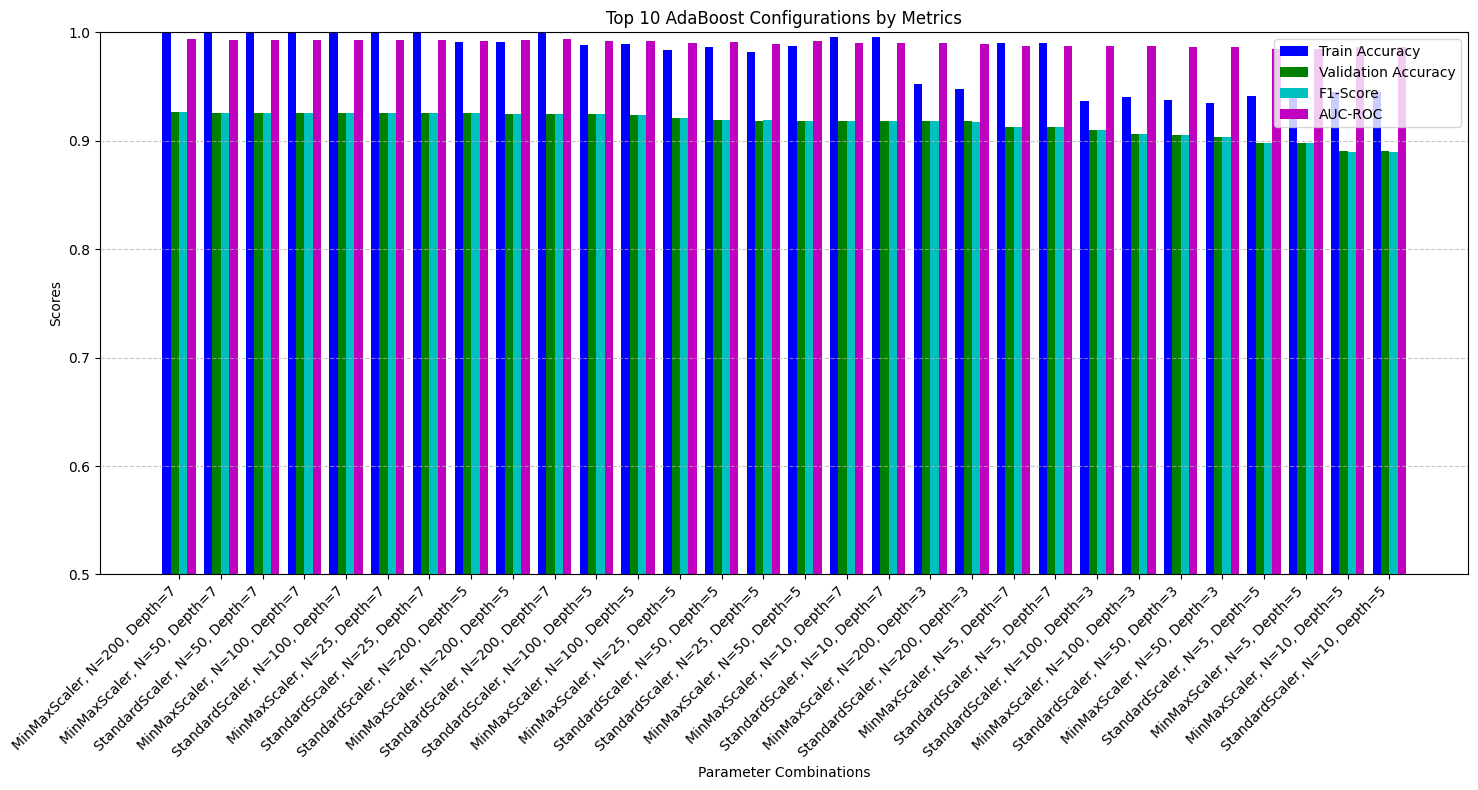

In [139]:

sorted_results = results_df.sort_values(
    by=["Validation Accuracy", "F1-Score", "AUC-ROC", "Train Accuracy"],
    ascending=[False, False, False, False]
)


top_30_results = sorted_results.head(30)


print("\nTop 10 AdaBoost Results:")
print(top_30_results)


labels = [
    f"{row['Scaler']}, N={row['N_Estimators']}, Depth={row['Max_Depth']}"
    for _, row in top_30_results.iterrows()
]


def visualize_top_results_with_params(top_results, labels, title):
    metrics = ["Train Accuracy", "Validation Accuracy", "F1-Score", "AUC-ROC"]
    colors = ['b', 'g', 'c', 'm']  

    
    plt.figure(figsize=(15, 8))
    bar_width = 0.2
    x = range(len(top_results))

    for i, metric in enumerate(metrics):
        plt.bar(
            [pos + i * bar_width for pos in x],
            top_results[metric],
            width=bar_width,
            label=metric,
            color=colors[i]
        )

    
    plt.title(title)
    plt.xlabel("Parameter Combinations")
    plt.ylabel("Scores")
    plt.xticks([pos + 1.5 * bar_width for pos in x], labels, rotation=45, ha='right')
    plt.ylim(0.5, 1.0)  # Adjust based on your data
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()


visualize_top_results_with_params(
    top_30_results,
    labels,
    title="Top 10 AdaBoost Configurations by Metrics"
)

In [140]:
from sklearn.linear_model import LogisticRegression

logistic regression

In [141]:

C_values = [0.01, 0.1, 1, 10, 100]  
penalties = ['l1', 'l2']  
solvers = ['lbfgs', 'newton-cg']  
max_iter_values = [100, 500, 1000]  
scalers = {
    "MinMaxScaler": MinMaxScaler(),
    "StandardScaler": StandardScaler()
}
kf = KFold(n_splits=4, shuffle=True, random_state=42)


top_features_count = 100
mi_scores = mutual_info_classif(X_train_final, y_train_final, random_state=42)
feature_indices = np.argsort(mi_scores)[-top_features_count:]  # Top 100 features
X_train_reduced = X_train_final[:, feature_indices]
X_test_reduced = X_test_final[:, feature_indices]


pca_components = 4
pca = PCA(n_components=pca_components)
X_train_pca = pca.fit_transform(X_train_reduced)
X_test_pca = pca.transform(X_test_reduced)


results = []


for scaler_name, scaler in scalers.items():
    
    X_train_scaled = scaler.fit_transform(X_train_pca)
    X_test_scaled = scaler.transform(X_test_pca)

    print(f"\nTesting Logistic Regression with {scaler_name} scaling (PCA={pca_components}, Features={top_features_count})")

    for C in C_values:
        for penalty in penalties:
            for solver in solvers:
                for max_iter in max_iter_values:
                    
                    if penalty == 'l1' and solver not in ['liblinear', 'saga']:
                        continue

                    print(f"Testing Logistic Regression with C={C}, penalty={penalty}, solver={solver}, max_iter={max_iter}")

                    
                    logreg = LogisticRegression(
                        penalty=penalty,
                        C=C,
                        solver=solver,
                        max_iter=max_iter,
                        random_state=42
                    )

                    train_accuracies = []
                    val_accuracies = []
                    f1_scores = []
                    roc_aucs = []
                    times_taken = []

                   
                    for train_index, val_index in kf.split(X_train_scaled):
                        X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
                        y_train_fold, y_val_fold = y_train_final[train_index], y_train_final[val_index]

                        start_time = time.time()
                        logreg.fit(X_train_fold, y_train_fold)
                        time_taken = time.time() - start_time
                        times_taken.append(time_taken)

                       
                        y_train_pred = logreg.predict(X_train_fold)
                        y_val_pred = logreg.predict(X_val_fold)

                        
                        train_accuracies.append(accuracy_score(y_train_fold, y_train_pred))
                        val_accuracies.append(accuracy_score(y_val_fold, y_val_pred))
                        f1_scores.append(f1_score(y_val_fold, y_val_pred, average='weighted'))

                       
                        if len(np.unique(y_train_final)) > 2:
                            y_val_prob = logreg.predict_proba(X_val_fold)
                            roc_aucs.append(roc_auc_score(
                                label_binarize(y_val_fold, classes=np.unique(y_train_final)), y_val_prob, multi_class='ovr'
                            ))
                        else:
                            roc_aucs.append(roc_auc_score(y_val_fold, logreg.decision_function(X_val_fold)))

                    
                    results.append({
                        "Scaler": scaler_name,
                        "C": C,
                        "Penalty": penalty,
                        "Solver": solver,
                        "Max Iter": max_iter,
                        "Train Accuracy": np.mean(train_accuracies),
                        "Validation Accuracy": np.mean(val_accuracies),
                        "F1-Score": np.mean(f1_scores),
                        "AUC-ROC": np.mean(roc_aucs),
                        "Time Taken": np.mean(times_taken)
                    })


results_df = pd.DataFrame(results)


results_df.to_csv("logistic_regression_lasso_ridge_results.csv", index=False)


print("\nAll Logistic Regression Results (Lasso and Ridge):")
print(results_df)


Testing Logistic Regression with MinMaxScaler scaling (PCA=4, Features=100)
Testing Logistic Regression with C=0.01, penalty=l2, solver=lbfgs, max_iter=100
Testing Logistic Regression with C=0.01, penalty=l2, solver=lbfgs, max_iter=500
Testing Logistic Regression with C=0.01, penalty=l2, solver=lbfgs, max_iter=1000
Testing Logistic Regression with C=0.01, penalty=l2, solver=newton-cg, max_iter=100
Testing Logistic Regression with C=0.01, penalty=l2, solver=newton-cg, max_iter=500
Testing Logistic Regression with C=0.01, penalty=l2, solver=newton-cg, max_iter=1000
Testing Logistic Regression with C=0.1, penalty=l2, solver=lbfgs, max_iter=100
Testing Logistic Regression with C=0.1, penalty=l2, solver=lbfgs, max_iter=500
Testing Logistic Regression with C=0.1, penalty=l2, solver=lbfgs, max_iter=1000
Testing Logistic Regression with C=0.1, penalty=l2, solver=newton-cg, max_iter=100
Testing Logistic Regression with C=0.1, penalty=l2, solver=newton-cg, max_iter=500
Testing Logistic Regressi

In [145]:
print("\nTop 10 Results (Sorted by Validation Accuracy):")
top_results = results_df.sort_values(by="Validation Accuracy", ascending=False).head(10)
print(top_results)


Top 10 Results (Sorted by Validation Accuracy):
            Scaler     C Penalty     Solver  Max Iter  Train Accuracy  \
41  StandardScaler   0.1      l2  newton-cg      1000        0.925383   
40  StandardScaler   0.1      l2  newton-cg       500        0.925383   
39  StandardScaler   0.1      l2  newton-cg       100        0.925383   
42  StandardScaler   1.0      l2      lbfgs       100        0.925958   
43  StandardScaler   1.0      l2      lbfgs       500        0.925958   
44  StandardScaler   1.0      l2      lbfgs      1000        0.925958   
23    MinMaxScaler  10.0      l2  newton-cg      1000        0.925766   
22    MinMaxScaler  10.0      l2  newton-cg       500        0.925766   
21    MinMaxScaler  10.0      l2  newton-cg       100        0.925766   
37  StandardScaler   0.1      l2      lbfgs       500        0.925383   

    Validation Accuracy  F1-Score   AUC-ROC  Time Taken  
41             0.926149  0.926212  0.995413    0.005880  
40             0.926149  0.9262

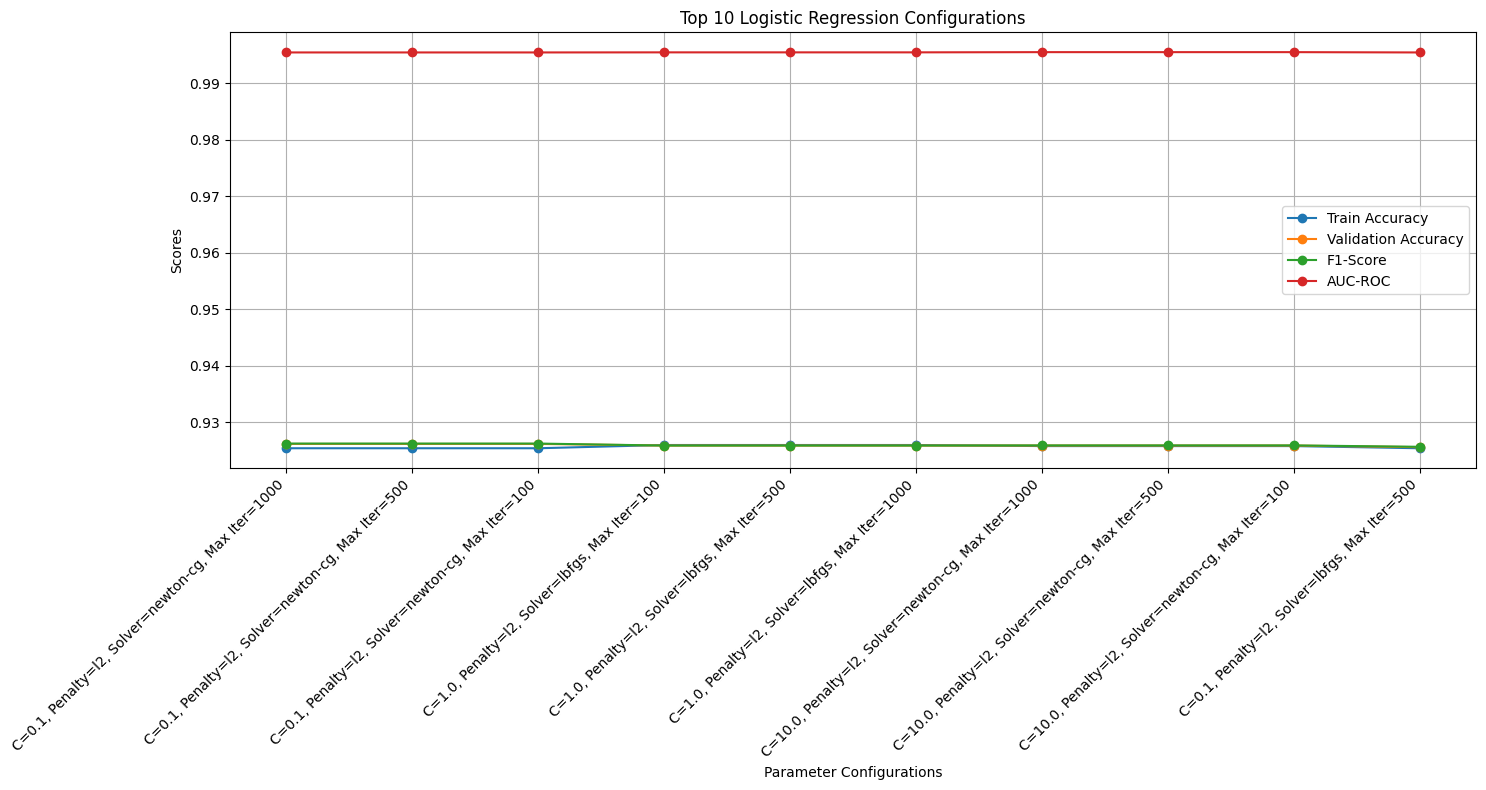

In [151]:

top_results = results_df.sort_values(by="Validation Accuracy", ascending=False).head(10)


labels = [
    f"C={row['C']}, Penalty={row['Penalty']}, Solver={row['Solver']}, Max Iter={row['Max Iter']}"
    for _, row in top_results.iterrows()
]


plt.figure(figsize=(15, 8))


plt.plot(labels, top_results["Train Accuracy"], label="Train Accuracy", marker='o', linestyle='-')


plt.plot(labels, top_results["Validation Accuracy"], label="Validation Accuracy", marker='o', linestyle='-')


plt.plot(labels, top_results["F1-Score"], label="F1-Score", marker='o', linestyle='-')


plt.plot(labels, top_results["AUC-ROC"], label="AUC-ROC", marker='o', linestyle='-')


plt.xticks(rotation=45, ha='right')  
plt.xlabel("Parameter Configurations")
plt.ylabel("Scores")
plt.title("Top 10 Logistic Regression Configurations")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [158]:
from sklearn.pipeline import Pipeline
import joblib
import os

In [162]:
scaler = MinMaxScaler()


top_features_count = 100
mi_scores = mutual_info_classif(X_train_final, y_train_final, random_state=42)
feature_indices = np.argsort(mi_scores)[-top_features_count:]  # Top 100 features
X_train_reduced = X_train_final[:, feature_indices]
X_test_reduced = X_test_final[:, feature_indices]


pca_components = 4
pca = PCA(n_components=pca_components)
X_train_pca = pca.fit_transform(X_train_reduced)
X_test_pca = pca.transform(X_test_reduced)

In [163]:

os.makedirs("pipelines", exist_ok=True)


top_features_count = 100
mi_scores = mutual_info_classif(X_train_final, y_train_final, random_state=42)
feature_indices = np.argsort(mi_scores)[-top_features_count:]  # Top 100 features
X_train_reduced = X_train_final[:, feature_indices]
X_test_reduced = X_test_final[:, feature_indices]


pca_components = 4
pca = PCA(n_components=pca_components)
X_train_pca = pca.fit_transform(X_train_reduced)
X_test_pca = pca.transform(X_test_reduced)


classifiers = {
    "LogisticRegression": LogisticRegression(
        C=1, penalty='l2', solver='newton-cg', max_iter=1000, random_state=42
    ),
    "RandomForest": RandomForestClassifier(
        n_estimators=5, max_depth=5, random_state=42
    ),
    "AdaBoost": AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=3, random_state=42),
        n_estimators=200, random_state=42
    ),
    "SVM": SVC(
        kernel='linear', C=1, gamma='auto', probability=True, random_state=42
    ),
    "KNN": KNeighborsClassifier(
        n_neighbors=7, weights='uniform', metric='manhattan'
    )
}

LogisticRegression pipeline created and saved as pipelines/LogisticRegression_pipeline.pkl
RandomForest pipeline created and saved as pipelines/RandomForest_pipeline.pkl


/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost pipeline created and saved as pipelines/AdaBoost_pipeline.pkl
SVM pipeline created and saved as pipelines/SVM_pipeline.pkl
KNN pipeline created and saved as pipelines/KNN_pipeline.pkl
LogisticRegression Results:
Train Accuracy: 0.9253, Test Accuracy: 0.9241
Train Time: 0.0377s, Test Time: 0.0006s
Train F1-Score: 0.9253, Test F1-Score: 0.9242
Train AUC-ROC: 0.9955, Test AUC-ROC: 0.9965

RandomForest Results:
Train Accuracy: 0.9385, Test Accuracy: 0.9287
Train Time: 0.0371s, Test Time: 0.0010s
Train F1-Score: 0.9385, Test F1-Score: 0.9287
Train AUC-ROC: 0.9960, Test AUC-ROC: 0.9945



/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Results:
Train Accuracy: 0.9365, Test Accuracy: 0.9149
Train Time: 1.2901s, Test Time: 0.0285s
Train F1-Score: 0.9364, Test F1-Score: 0.9148
Train AUC-ROC: 0.9965, Test AUC-ROC: 0.9912

SVM Results:
Train Accuracy: 0.9267, Test Accuracy: 0.9253
Train Time: 0.2402s, Test Time: 0.0056s
Train F1-Score: 0.9268, Test F1-Score: 0.9254
Train AUC-ROC: 0.9956, Test AUC-ROC: 0.9963

KNN Results:
Train Accuracy: 0.9391, Test Accuracy: 0.9230
Train Time: 0.0193s, Test Time: 0.0216s
Train F1-Score: 0.9391, Test F1-Score: 0.9231
Train AUC-ROC: 0.9972, Test AUC-ROC: 0.9897



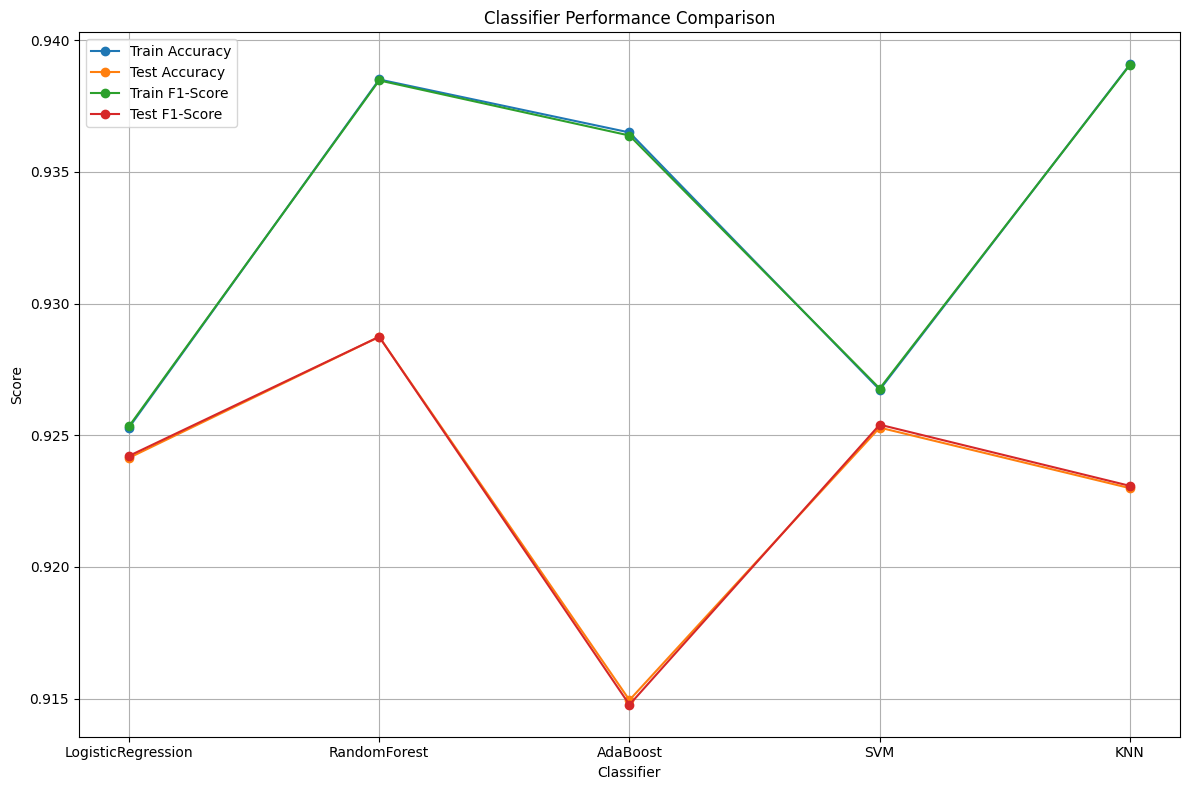

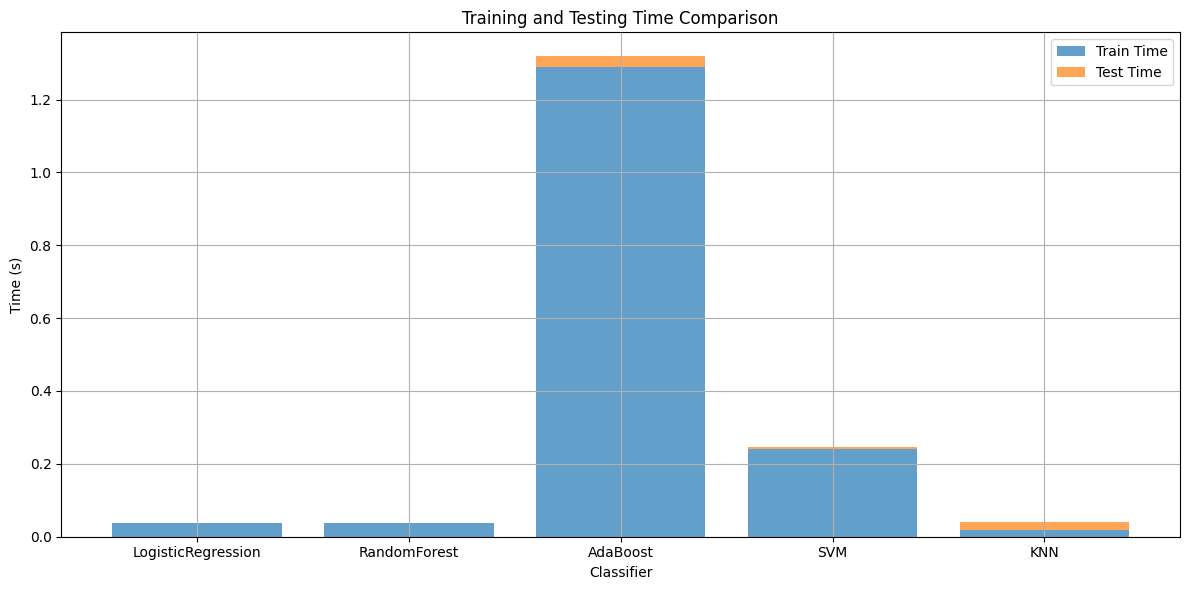

LogisticRegression pipeline created and saved as pipelines/LogisticRegression_pipeline.pkl
RandomForest pipeline created and saved as pipelines/RandomForest_pipeline.pkl


/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost pipeline created and saved as pipelines/AdaBoost_pipeline.pkl
SVM pipeline created and saved as pipelines/SVM_pipeline.pkl
KNN pipeline created and saved as pipelines/KNN_pipeline.pkl
Logistic Regression Test Accuracy: 0.9241


In [165]:

pipelines = {}
for name, clf in classifiers.items():
    
    pipeline = Pipeline([
        ("scaler", MinMaxScaler()),  
        ("pca", PCA(n_components=pca_components)), 
        ("classifier", clf)  
    ])

    
    pipeline.fit(X_train_final, y_train_final)

    
    pipeline_path = f"pipelines/{name}_pipeline.pkl"
    joblib.dump(pipeline, pipeline_path)
    pipelines[name] = pipeline  

    print(f"{name} pipeline created and saved as {pipeline_path}")


evaluation_results = []


for name, pipeline in pipelines.items():
    
    start_time = time.time()
    pipeline.fit(X_train_final, y_train_final)
    train_time = time.time() - start_time

    
    y_train_pred = pipeline.predict(X_train_final)
    y_train_prob = (
        pipeline.predict_proba(X_train_final) if hasattr(pipeline.named_steps['classifier'], 'predict_proba') else None
    )

    
    train_accuracy = accuracy_score(y_train_final, y_train_pred)
    train_f1_score = f1_score(y_train_final, y_train_pred, average='weighted')
    train_auc_roc = (
        roc_auc_score(
            label_binarize(y_train_final, classes=np.unique(y_train_final)),
            y_train_prob,
            multi_class='ovr'
        )
        if y_train_prob is not None else None
    )

    
    start_time = time.time()
    y_test_pred = pipeline.predict(X_test_final)
    test_time = time.time() - start_time

    
    y_test_prob = (
        pipeline.predict_proba(X_test_final) if hasattr(pipeline.named_steps['classifier'], 'predict_proba') else None
    )

    
    test_accuracy = accuracy_score(y_test_final, y_test_pred)
    test_f1_score = f1_score(y_test_final, y_test_pred, average='weighted')
    test_auc_roc = (
        roc_auc_score(
            label_binarize(y_test_final, classes=np.unique(y_test_final)),
            y_test_prob,
            multi_class='ovr'
        )
        if y_test_prob is not None else None
    )

    
    evaluation_results.append({
        "Classifier": name,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Train Time (s)": train_time,
        "Test Time (s)": test_time,
        "Train F1-Score": train_f1_score,
        "Test F1-Score": test_f1_score,
        "Train AUC-ROC": train_auc_roc,
        "Test AUC-ROC": test_auc_roc
    })

    print(f"{name} Results:")
    print(f"Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")
    print(f"Train Time: {train_time:.4f}s, Test Time: {test_time:.4f}s")
    print(f"Train F1-Score: {train_f1_score:.4f}, Test F1-Score: {test_f1_score:.4f}")
    if train_auc_roc is not None and test_auc_roc is not None:
        print(f"Train AUC-ROC: {train_auc_roc:.4f}, Test AUC-ROC: {test_auc_roc:.4f}")
    print()


evaluation_df = pd.DataFrame(evaluation_results)


evaluation_df.to_csv("classifier_detailed_comparison_results.csv", index=False)


metrics = ["Train Accuracy", "Test Accuracy", "Train F1-Score", "Test F1-Score"]

plt.figure(figsize=(12, 8))
for metric in metrics:
    plt.plot(evaluation_df["Classifier"], evaluation_df[metric], marker='o', label=metric)

plt.title("Classifier Performance Comparison")
plt.xlabel("Classifier")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
plt.bar(evaluation_df["Classifier"], evaluation_df["Train Time (s)"], label="Train Time", alpha=0.7)
plt.bar(evaluation_df["Classifier"], evaluation_df["Test Time (s)"], label="Test Time", alpha=0.7, bottom=evaluation_df["Train Time (s)"])
plt.title("Training and Testing Time Comparison")
plt.xlabel("Classifier")
plt.ylabel("Time (s)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
pipelines = {}
for name, clf in classifiers.items():
    
    pipeline = Pipeline([
        ("scaler", MinMaxScaler()),  
        ("pca", PCA(n_components=pca_components)),  
        ("classifier", clf)  
    ])

    
    pipeline.fit(X_train_final, y_train_final)

    
    pipeline_path = f"pipelines/{name}_pipeline.pkl"
    joblib.dump(pipeline, pipeline_path)
    pipelines[name] = pipeline  

    print(f"{name} pipeline created and saved as {pipeline_path}")


example_pipeline = pipelines["LogisticRegression"]
y_test_pred = example_pipeline.predict(X_test_final)
print(f"Logistic Regression Test Accuracy: {accuracy_score(y_test_final, y_test_pred):.4f}")

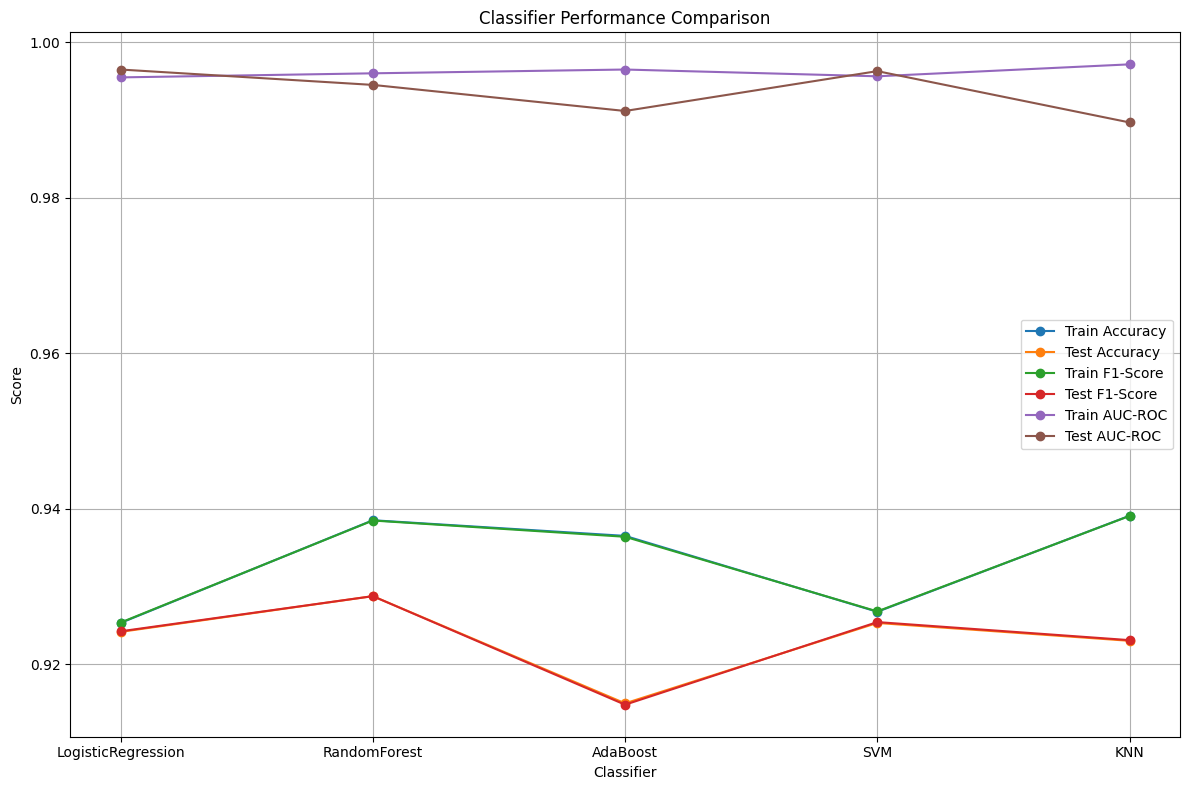

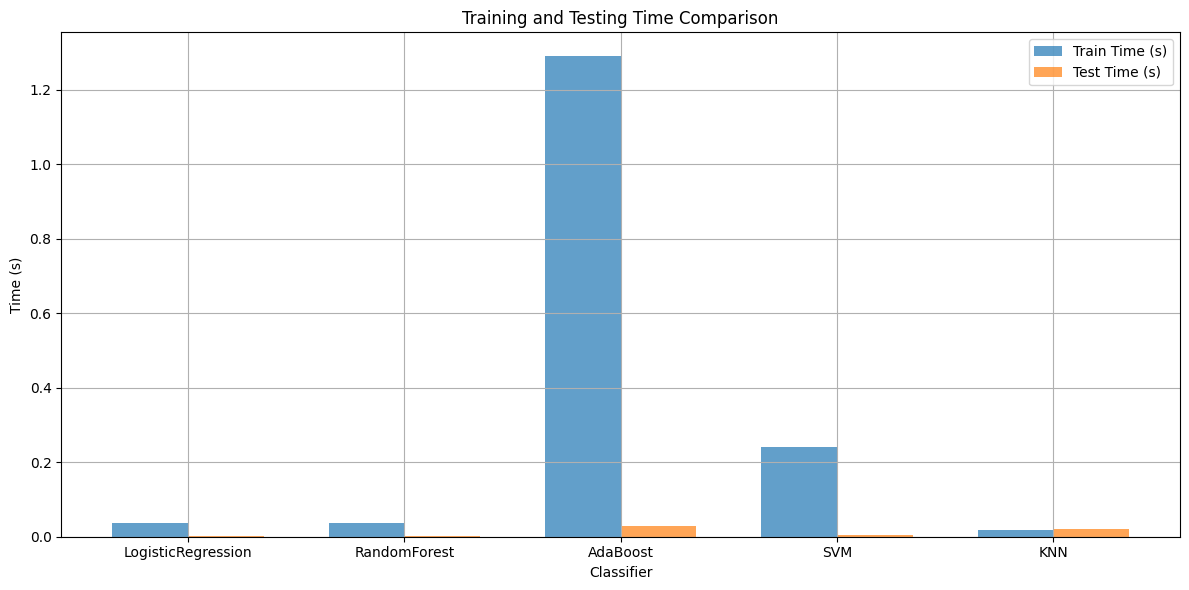

In [166]:
performance_metrics = ["Train Accuracy", "Test Accuracy", "Train F1-Score", "Test F1-Score", "Train AUC-ROC", "Test AUC-ROC"]


plt.figure(figsize=(12, 8))
for metric in performance_metrics:
    plt.plot(evaluation_df["Classifier"], evaluation_df[metric], marker='o', label=metric)

plt.title("Classifier Performance Comparison")
plt.xlabel("Classifier")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
width = 0.35  # Bar width
x = np.arange(len(evaluation_df["Classifier"]))


plt.bar(x - width/2, evaluation_df["Train Time (s)"], width, label="Train Time (s)", alpha=0.7)
plt.bar(x + width/2, evaluation_df["Test Time (s)"], width, label="Test Time (s)", alpha=0.7)

plt.title("Training and Testing Time Comparison")
plt.xlabel("Classifier")
plt.ylabel("Time (s)")
plt.xticks(x, evaluation_df["Classifier"])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

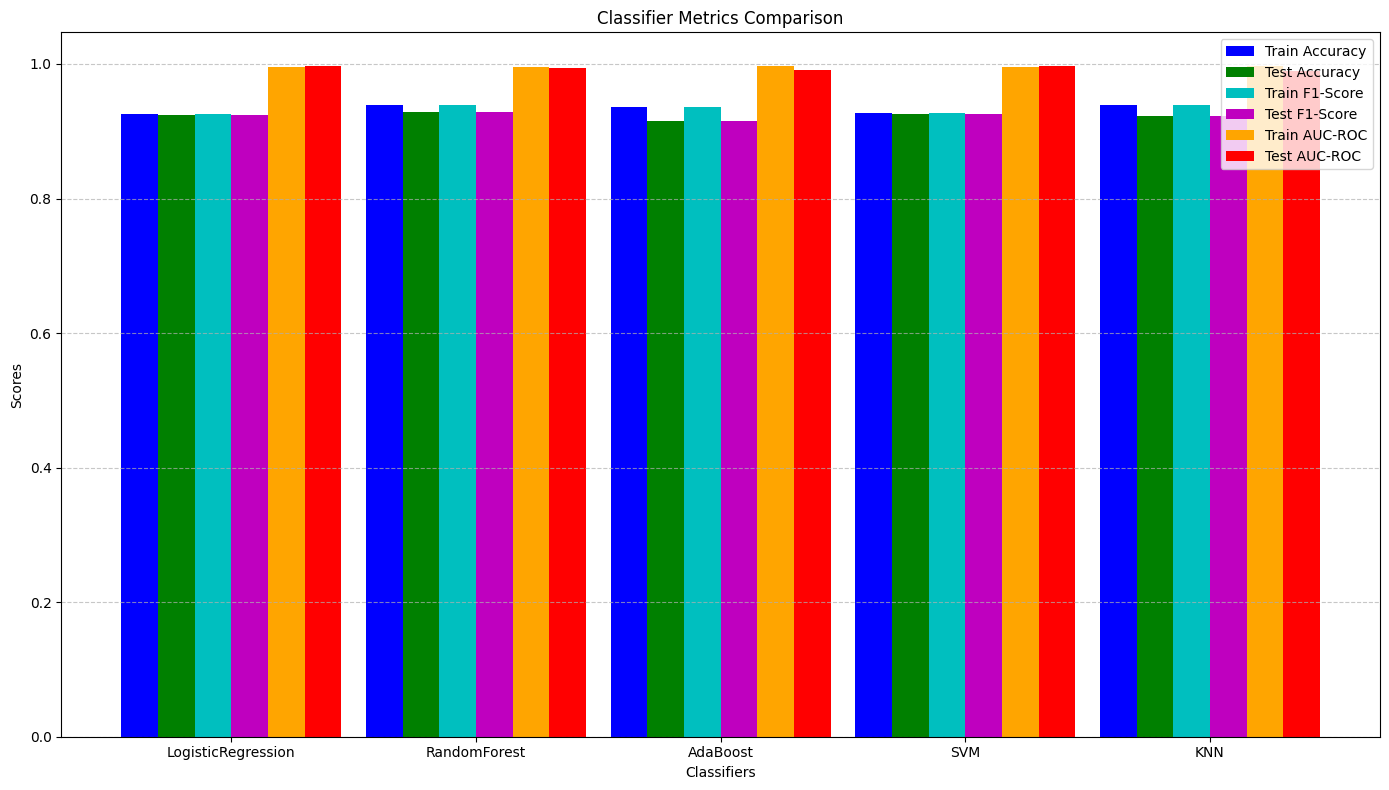

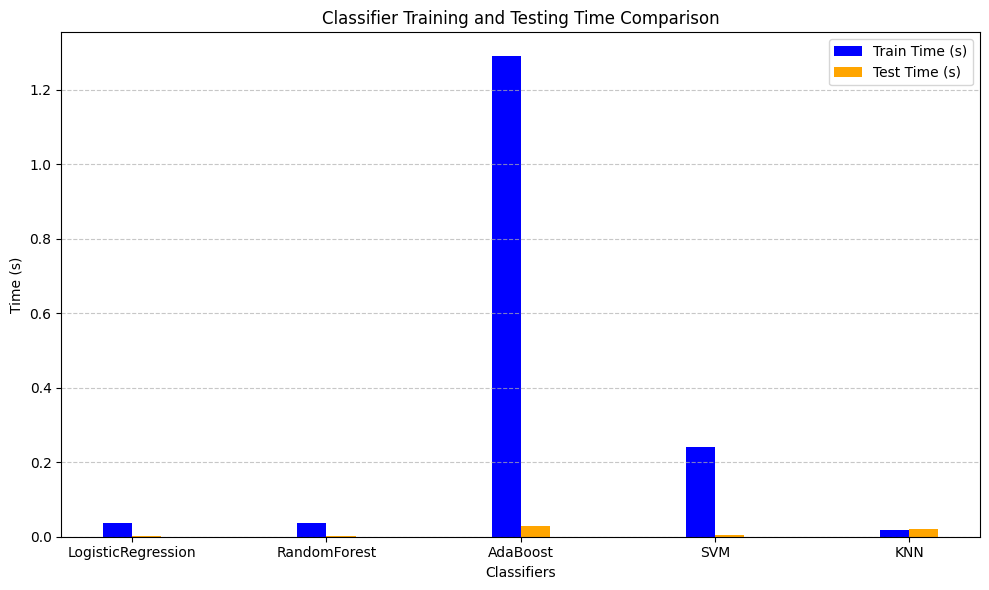

In [167]:
metrics = ["Train Accuracy", "Test Accuracy", "Train F1-Score", "Test F1-Score", "Train AUC-ROC", "Test AUC-ROC"]
colors = ['b', 'g', 'c', 'm', 'orange', 'r']  


num_classifiers = len(evaluation_df["Classifier"])
x = np.arange(num_classifiers) 
bar_width = 0.15  


plt.figure(figsize=(14, 8))


for i, metric in enumerate(metrics):
    plt.bar(x + i * bar_width, evaluation_df[metric], bar_width, label=metric, color=colors[i])


plt.xlabel("Classifiers")
plt.ylabel("Scores")
plt.title("Classifier Metrics Comparison")
plt.xticks(x + bar_width * (len(metrics) / 2 - 0.5), evaluation_df["Classifier"])  # Center ticks
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


plt.show()


plt.figure(figsize=(10, 6))


time_metrics = ["Train Time (s)", "Test Time (s)"]
time_colors = ['blue', 'orange']


for i, time_metric in enumerate(time_metrics):
    plt.bar(x + i * bar_width, evaluation_df[time_metric], bar_width, label=time_metric, color=time_colors[i])


plt.xlabel("Classifiers")
plt.ylabel("Time (s)")
plt.title("Classifier Training and Testing Time Comparison")
plt.xticks(x + bar_width / 2, evaluation_df["Classifier"])  # Center ticks
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

In [169]:
from sklearn.model_selection import GridSearchCV

Starting Grid Search for LogisticRegression...
Fitting 4 folds for each of 48 candidates, totalling 192 fits


/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
96 fits failed out of a total of 192.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
48 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/pipeline.py", l

Best Parameters for LogisticRegression: {'classifier__C': 0.1, 'classifier__max_iter': 100, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
Best Cross-Validation Accuracy for LogisticRegression: 0.9236

Starting Grid Search for RandomForest...
Fitting 4 folds for each of 48 candidates, totalling 192 fits
Best Parameters for RandomForest: {'classifier__max_depth': 5, 'classifier__n_estimators': 7}
Best Cross-Validation Accuracy for RandomForest: 0.9227

Starting Grid Search for AdaBoost...
Fitting 4 folds for each of 24 candidates, totalling 96 fits


/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent

/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent

/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/michael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent

Best Parameters for AdaBoost: {'classifier__estimator__max_depth': 7, 'classifier__n_estimators': 200}
Best Cross-Validation Accuracy for AdaBoost: 0.9230

Starting Grid Search for SVM...
Fitting 4 folds for each of 40 candidates, totalling 160 fits
Best Parameters for SVM: {'classifier__C': 1, 'classifier__gamma': 1, 'classifier__kernel': 'rbf'}
Best Cross-Validation Accuracy for SVM: 0.9267

Starting Grid Search for KNN...
Fitting 4 folds for each of 44 candidates, totalling 176 fits
Best Parameters for KNN: {'classifier__metric': 'euclidean', 'classifier__n_neighbors': 10, 'classifier__weights': 'uniform'}
Best Cross-Validation Accuracy for KNN: 0.9270


Grid Search Results for All Classifiers:
           Classifier                                    Best Parameters  \
0  LogisticRegression  {'classifier__C': 0.1, 'classifier__max_iter':...   
1        RandomForest  {'classifier__max_depth': 5, 'classifier__n_es...   
2            AdaBoost  {'classifier__estimator__max_depth': 7, 'c

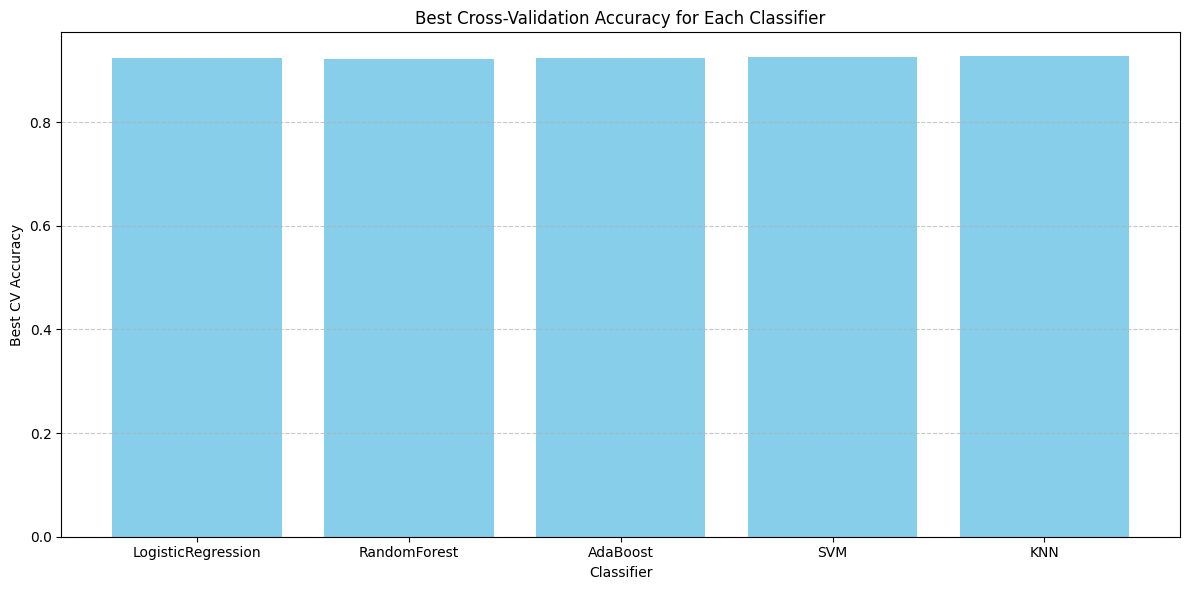

In [170]:

param_grids = {
    "LogisticRegression": {
        "classifier__C": [0.01, 0.1, 1, 10],
        "classifier__penalty": ["l1", "l2"],  
        "classifier__solver": ["lbfgs", "newton-cg"], 
        "classifier__max_iter": [100, 500, 1000] 
    },
    "RandomForest": {
        "classifier__n_estimators": [2, 3, 5, 7, 10, 25, 50, 100],  
        "classifier__max_depth": [2, 3, 4, 5, 10, 20] 
    },
    "AdaBoost": {
        "classifier__n_estimators": [5, 10, 25, 50, 100, 200], 
        "classifier__estimator__max_depth": [1, 3, 5, 7] 
    },
    "SVM": {
        "classifier__C": [0.01, 0.1, 1, 10],  
        "classifier__kernel": ["linear", "rbf"],  
        "classifier__gamma": [0.01, 0.1, 1, 10, "auto"] 
    },
    "KNN": {
        "classifier__n_neighbors": [1, 3, 5, 7, 10, 13, 16, 20, 25, 30, 50], 
        "classifier__weights": ["uniform", "distance"], 
        "classifier__metric": ["euclidean", "manhattan"]  
    }
}



best_results = []


for name, clf in classifiers.items():
    print(f"Starting Grid Search for {name}...")

   
    pipeline = Pipeline([
        ("scaler", MinMaxScaler()),  
        ("pca", PCA(n_components=4)),  
        ("classifier", clf)  
    ])

    
    grid_search = GridSearchCV(
        pipeline,
        param_grids[name],
        scoring="accuracy",
        cv=4,  
        n_jobs=-1,  
        verbose=1  
    )

  
    grid_search.fit(X_train_final, y_train_final)

    
    best_results.append({
        "Classifier": name,
        "Best Parameters": grid_search.best_params_,
        "Best Cross-Validation Accuracy": grid_search.best_score_
    })

    print(f"Best Parameters for {name}: {grid_search.best_params_}")
    print(f"Best Cross-Validation Accuracy for {name}: {grid_search.best_score_:.4f}\n")


best_results_df = pd.DataFrame(best_results)


best_results_df.to_csv("grid_search_best_results.csv", index=False)


print("\nGrid Search Results for All Classifiers:")
print(best_results_df)


plt.figure(figsize=(12, 6))
plt.bar(best_results_df["Classifier"], best_results_df["Best Cross-Validation Accuracy"], color="skyblue")
plt.title("Best Cross-Validation Accuracy for Each Classifier")
plt.xlabel("Classifier")
plt.ylabel("Best CV Accuracy")
plt.grid(True, axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


In [59]:
import numpy as np

In [60]:
data_mapping = {'person': 0, 'sign': 1, 'bike': 2, 'bus': 3, 'car': 4}


In [61]:
y_train_final_mapped = np.array([data_mapping[label] for label in y_train_final])
y_test_final_mapped = np.array([data_mapping[label] for label in y_test_final])

In [62]:
print(f"Unique Training Labels (Mapped): {np.unique(y_train_final_mapped)}")
print(f"Unique Testing Labels (Mapped): {np.unique(y_test_final_mapped)}")


Unique Training Labels (Mapped): [0 1 2 3 4]
Unique Testing Labels (Mapped): [0 1 2 3 4]


In [63]:

X_final_train = np.vstack((X_train_final, X_test_final))
y_final_train = np.hstack((y_train_final_mapped, y_test_final_mapped))

print(f"Final Training Features Shape: {X_final_train.shape}")
print(f"Final Training Labels Shape: {y_final_train.shape}")


Final Training Features Shape: (4350, 256)
Final Training Labels Shape: (4350,)


In [64]:
mi_scores = mutual_info_classif(X_final_train, y_final_train, random_state=42)
top_features_indices = np.argsort(mi_scores)[-100:]  
X_train_selected = X_final_train[:, top_features_indices]
print(f"Reduced Training Features Shape after MI selection: {X_train_selected.shape}")


scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)


pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train_scaled)
print(f"Reduced Training Features Shape after PCA: {X_train_pca.shape}")

Reduced Training Features Shape after MI selection: (4350, 100)
Reduced Training Features Shape after PCA: (4350, 4)


In [65]:
svm_model = SVC(C=1.0, gamma='auto', kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train_pca, y_final_train)
print("Model training completed with PCA and top 100 MI features.")

Model training completed with PCA and top 100 MI features.


In [67]:
test_data = pd.read_csv('test_feature_data.csv')
X_test_features = test_data.values 
X_test_selected = X_test_features[:, top_features_indices]  
X_test_scaled = scaler.transform(X_test_selected)  
X_test_pca = pca.transform(X_test_scaled)  
print(f"Reduced Test Features Shape after MI selection and PCA: {X_test_pca.shape}")

Reduced Test Features Shape after MI selection and PCA: (30, 4)


In [68]:
predictions = svm_model.predict(X_test_pca)

In [69]:
predictions_df = pd.DataFrame(predictions, columns=['prediction'])
predictions_df.to_csv('predictions.csv', index=False)
print("Predictions saved to 'predictions.csv'.")

Predictions saved to 'predictions.csv'.
